## Projeto 1 Fundamentos de Data Science II
### Aluno: Rodrigo P Maruyama

# Subway Data Analysis

## Introduction

O sistema de ônibus e trens de Nova Iorque - o Metro Transit Authority - fornece seus dados para download através de  arquivos csv. Uma das informações disponíveis são os dados das catracas do metrô que contém logs semanais de entradas cumulativas e saídas por catraca por estação de metrô em algum intervalo de tempo.


Neste projeto iremos utilizar apenas os das catraca disponíveis em: http://web.mta.info/developers/turnstile.html.




# Sobre este projeto

Neste projeto você irá aplicar todos os conhecimentos adquiridos neste primeiro mês de curso. Iremos praticar tarefas básicas de aquisição, limpeza de dados e nesse processo iremos descobrir coisas essenciais sobre os dados utilizando o que foi aprendido no curso de estatística. 

O objetivo deste projeto é explorar a relação entre os dados das catracas do metro de Nova Iorque e o clima no dia da coleta. Para isso, além dos dados do metrô, precisaremos os dados de clima da cidade de Nova Iorque. 

Os principais pontos que serão verificados neste trabalho:

- Coleta de dados da internet
- Utilização de estatística para análise de dados
- Manipulação de dados e criação de gráficos simples com o `Pandas`

*Como conseguir ajuda*: Sugerimos que tente os seguintes canais, nas seguintes ordens:

| Tipo de dúvida\Canais         	| Google 	| Fórum 	| Slack 	| Email 	|
|-------------------------------	|--------	|-------	|-------	|-------	|
| Programação Pyhon e Pandas    	| 1      	| 2     	| 3     	|       	|
| Requisitos do projeto         	|        	| 1     	| 2     	| 3     	|
| Partes específicas do Projeto 	|        	| 1     	| 2     	| 3     	|

Os endereços dos canais são:

- Fórum: https://discussions.udacity.com/c/ndfdsi-project
- Slack: [udacity-br.slack.com](https://udacity-br.slack.com/messages/C5MT6E3E1)
- Email: data-suporte@udacity.com

**Espera-se que o estudante entregue este relatório com:**

- Todos os TODO feitos, pois eles são essenciais para que o código rode corretamente
- O arquivo ipynb exportado como html

Para entregar este projeto, vá a [sala de aula](https://coco.udacity.com/nanodegrees/nd111/locale/pt-br/versions/1.0.0/parts/339726/modules/339733/lessons/340886/project) e submeta o seu `.ipynb` e o html, zipados.

# Lembretes

Antes de começarmos, alguns lembretes devem ter em mente ao usar os notebooks iPython:

- Lembre-se de que você pode ver do lado esquerdo de uma célula de código quando foi executado pela última vez se houver um número dentro das chaves.
- Quando você inicia uma nova sessão do notebook, certifique-se de executar todas as células até o ponto em que você deixou a última vez. Mesmo que a saída ainda seja visível a partir de quando você executou as células em sua sessão anterior, o kernel começa em um estado novo, então você precisará recarregar os dados, etc. em uma nova sessão.
- O ponto anterior é útil para ter em mente se suas respostas não correspondem ao que é esperado nos questionários da aula. Tente recarregar os dados e execute todas as etapas de processamento um a um para garantir que você esteja trabalhando com as mesmas variáveis e dados que estão em cada fase do questionário.

## Seção 1 - Coleta de Dados

### *Exercicio 1.1*

Mãos a obra!! Agora é sua vez de coletar os dados. Escreva abaixo um código python que acesse o link http://web.mta.info/developers/turnstile.html e baixe os arquivos do mês de junho de 2017. O arquivo deverá ser salvo com o nome turnstile_100617.txt onde 10/06/17 é a data do arquivo.

Abaixo seguem alguns comandos que poderão te ajudar:

Utilize a biblioteca **urllib** para abrir e resgatar uma página da web. Utilize o comando abaixo onde **url** será o caminho da página da web onde se encontra o arquivo:

```python
u = urllib.urlopen(url)
html = u.read()
```

Utilize a biblioteca **BeautifulSoup** para procurar na página pelo link do arquivo que deseja baixar. Utilize o comando abaixo para criar o seu objeto *soup* e procurar por todas as tags 'a'no documento:
 
 
```python
soup = BeautifulSoup(html, "html.parser")
links = soup.find_all('a')
```

Uma dica para baixar apenas os arquivos do mês de junho é verificar a data no nome do arquivo. Por exemplo, para baixar o arquivo do dia 17/06/2017 verifique se o link termina com *"turnstile_170610.txt"*. Se não fizer isso você baixará todos os arquivos da página. Para fazer isso utilize o comando conforme abaixo:

```python
if '1706' in link.get('href'):
```

E a dica final é utilizar o comando abaixo para fazer o download do arquivo txt:

```python
urllib.urlretrieve(link_do_arquivo, filename)
```

Lembre-se, primeiro, carregue todos os pacotes e funções que você estará usando em sua análise.

In [2]:
import urllib
from bs4 import BeautifulSoup

u = urllib.urlopen('http://web.mta.info/developers/turnstile.html')
html = u.read()
soup = BeautifulSoup(html, 'html.parser')
links = soup.find_all('a')

filenames = []

for link in links:
    try:
        if '1706' in link['href']:
            href_data = 'http://web.mta.info/developers/{}' .format(link['href'])
            filename = href_data[-20:]
            urllib.urlretrieve(href_data, filename)
            filenames.append(filename)
    except:
        print 'sem href'

sem href


### *Exercicio 1.2*

Escreva uma função que pegue a lista de nomes dos arquivos que você baixou no exercicio 1.1 e consolide-os em um único arquivo. Deve existir apenas uma linha de cabeçalho no arquivo de saida. 

Por exemplo, se o arquivo_1 tiver:
linha 1...
linha 2...

e o outro arquivo, arquivo_2 tiver:
linha 3...
linha 4...
linha 5...

Devemos combinar o arquivo_1 com arquivo_2 em um arquivo mestre conforme abaixo:

'C/A, UNIT, SCP, DATEn, TIMEn, DESCn, ENTRIESn, EXITSn'
linha 1...
linha 2...
linha 3...
linha 4...
linha 5...


In [3]:
def create_master_turnstile_file(filenames, output_file):
    with open(output_file, 'w') as master_file:
        master_file.write('C/A,UNIT,SCP,STATION, LINENAME, DIVISION, DATEn,TIMEn,DESCn,ENTRIESn,EXITSn\n')
        for fname in filenames:
            with open(fname) as infile:
                for line in infile:
                    if not 'C/A' in line:
                        master_file.write(line)

In [4]:
create_master_turnstile_file(filenames, 'turnstile.txt')

### *Exercicio 1.3*

Neste exercício, escreva um função que leia o master_file criado no exercicio anterior e carregue-o em um pandas dataframe. Esta função deve filtrar para que o dataframe possua apenas linhas onde a coluna "DESCn" possua o valor "Regular".

Por exemplo, se o data frame do pandas estiver conforme abaixo:
    
    ,C/A,UNIT,SCP,DATEn,TIMEn,DESCn,ENTRIESn,EXITSn
    0,A002,R051,02-00-00,05-01-11,00:00:00,REGULAR,3144312,1088151
    1,A002,R051,02-00-00,05-01-11,04:00:00,DOOR,3144335,1088159
    2,A002,R051,02-00-00,05-01-11,08:00:00,REGULAR,3144353,1088177
    3,A002,R051,02-00-00,05-01-11,12:00:00,DOOR,3144424,1088231

O dataframe deverá ficar conforme abaixo depois de filtrar apenas as linhas onde a coluna DESCn possua o valor REGULAR:

    0,A002,R051,02-00-00,05-01-11,00:00:00,REGULAR,3144312,1088151
    2,A002,R051,02-00-00,05-01-11,08:00:00,REGULAR,3144353,1088177


In [5]:
import pandas as pd

def filter_by_regular(filename):
    
    turnstile_data = pd.read_csv(filename) 
    turnstile_data = turnstile_data.loc[turnstile_data['DESCn'] == 'REGULAR']
    return turnstile_data

df = filter_by_regular('turnstile.txt')

In [6]:
df.head()

C/A  UNIT       SCP STATION  LINENAME  DIVISION       DATEn     TIMEn  \
0  A002  R051  02-00-00   59 ST   NQR456W       BMT  06/17/2017  00:00:00   
1  A002  R051  02-00-00   59 ST   NQR456W       BMT  06/17/2017  04:00:00   
2  A002  R051  02-00-00   59 ST   NQR456W       BMT  06/17/2017  08:00:00   
3  A002  R051  02-00-00   59 ST   NQR456W       BMT  06/17/2017  12:00:00   
4  A002  R051  02-00-00   59 ST   NQR456W       BMT  06/17/2017  16:00:00   

     DESCn  ENTRIESn   EXITSn  
0  REGULAR   6224816  2107317  
1  REGULAR   6224850  2107322  
2  REGULAR   6224885  2107352  
3  REGULAR   6225005  2107452  
4  REGULAR   6225248  2107513

### *Exercicio 1.4*


Os dados do metrô de NY possui dados cumulativos de entradas e saidas por linha. Assuma que você possui um dataframe chamado df que contém apenas linhas para uma catraca em particular (unico SCP, C/A, e UNIT). A função abaixo deve alterar essas entradas cumulativas para a contagem de entradas desde a última leitura (entradas desde a última linha do dataframe).

Mais especificamente, você deverá fazer duas coisas:

1 - Criar uma nova coluna chamada ENTRIESn_hourly

2 - Inserir nessa coluna a diferença enre ENTRIESn da coluna atual e a da coluna anterior. Se a linha possuir alguma NAN, preencha/substitua por 1.

Dica: as funções do pandas shift() e fillna() pode ser úteis nesse exercicio.

Abaixo tem um exemplo de como seu dataframe deve ficar ao final desse exercicio:

        C/A  UNIT       SCP     DATEn     TIMEn    DESCn  ENTRIESn    EXITSn  ENTRIESn_hourly
    0     A002  R051  02-00-00  05-01-11  00:00:00  REGULAR   3144312   1088151                1
    1     A002  R051  02-00-00  05-01-11  04:00:00  REGULAR   3144335   1088159               23
    2     A002  R051  02-00-00  05-01-11  08:00:00  REGULAR   3144353   1088177               18
    3     A002  R051  02-00-00  05-01-11  12:00:00  REGULAR   3144424   1088231               71
    4     A002  R051  02-00-00  05-01-11  16:00:00  REGULAR   3144594   1088275              170
    5     A002  R051  02-00-00  05-01-11  20:00:00  REGULAR   3144808   1088317              214
    6     A002  R051  02-00-00  05-02-11  00:00:00  REGULAR   3144895   1088328               87
    7     A002  R051  02-00-00  05-02-11  04:00:00  REGULAR   3144905   1088331               10
    8     A002  R051  02-00-00  05-02-11  08:00:00  REGULAR   3144941   1088420               36
    9     A002  R051  02-00-00  05-02-11  12:00:00  REGULAR   3145094   1088753              153
    10    A002  R051  02-00-00  05-02-11  16:00:00  REGULAR   3145337   1088823              243

In [7]:
import pandas

def get_hourly_entries(df):
    df['ENTRIESn_hourly'] = (df['ENTRIESn']-df['ENTRIESn'].shift(1)).fillna(1)
    return df

### *Exercicio 1.5*

Faça o mesmo do exercicio anterior mas agora considerando as saidas, coluna EXITSn.
Para isso crie uma coluna chamada de EXITSn_hourly e insira a diferença entre a coluna EXITSn da linha atual versus a linha anterior. Se tiver algum NaN, preencha/substitua por 0.



In [10]:
import pandas

def get_hourly_exits(df):
    df['EXITSn_hourly'] = (df['EXITSn']-df['EXITSn'].shift(1)).fillna(1)
    return df
df_hourly_exits = get_hourly_exits(df)
df_hourly_exits.head()

C/A  UNIT       SCP STATION  LINENAME  DIVISION       DATEn     TIMEn  \
0  A002  R051  02-00-00   59 ST   NQR456W       BMT  06/17/2017  00:00:00   
1  A002  R051  02-00-00   59 ST   NQR456W       BMT  06/17/2017  04:00:00   
2  A002  R051  02-00-00   59 ST   NQR456W       BMT  06/17/2017  08:00:00   
3  A002  R051  02-00-00   59 ST   NQR456W       BMT  06/17/2017  12:00:00   
4  A002  R051  02-00-00   59 ST   NQR456W       BMT  06/17/2017  16:00:00   

     DESCn  ENTRIESn   EXITSn  EXITSn_hourly  
0  REGULAR   6224816  2107317            1.0  
1  REGULAR   6224850  2107322            5.0  
2  REGULAR   6224885  2107352           30.0  
3  REGULAR   6225005  2107452          100.0  
4  REGULAR   6225248  2107513           61.0

### *Exercicio 1.6*

Dado uma variável de entrada que representa o tempo no formato de:
     "00:00:00" (hora: minutos: segundos)
    
Escreva uma função para extrair a parte da hora do tempo variável de entrada
E devolva-o como um número inteiro. Por exemplo:
         
         1) se a hora for 00, seu código deve retornar 0
         2) se a hora for 01, seu código deve retornar 1
         3) se a hora for 21, seu código deve retornar 21
        
Por favor, devolva a hora como um número inteiro.


In [11]:
def time_to_hour(time):
    hour = int(time.slit(':')[1])
    return hour

## Exercicio 2 - Análise dos dados

### *Exercicio 2.1*

Para verificar a relação entre o movimento do metrô e o clima, precisaremos complementar os dados do arquivo já baixado com os dados do clima.
Nós complementamos para você este arquivo com os dados de clima de Nova Iorque  e disponibilizamos na área de materiais do projeto. Você pode acessa-lo pelo link: https://s3.amazonaws.com/content.udacity-data.com/courses/ud359/turnstile_data_master_with_weather.csv

Agora que temos nossos dados em um arquivo csv, escreva um código python que leia este arquivo e salve-o em um data frame do pandas. 

Dica: 

Utilize o comando abaixo para ler o arquivo:

```python
pd.read_csv('output_list.txt', sep=",")
```



In [12]:
import pandas as pd

filename = "turnstile-data-master-with-weather.csv"


df_weather = pd.read_csv(filename)
df_weather.head()

Unnamed: 0  UNIT       DATEn     TIMEn  Hour    DESCn  ENTRIESn_hourly  \
0           0  R001  2011-05-01  01:00:00     1  REGULAR              0.0   
1           1  R001  2011-05-01  05:00:00     5  REGULAR            217.0   
2           2  R001  2011-05-01  09:00:00     9  REGULAR            890.0   
3           3  R001  2011-05-01  13:00:00    13  REGULAR           2451.0   
4           4  R001  2011-05-01  17:00:00    17  REGULAR           4400.0   

   EXITSn_hourly  maxpressurei  maxdewpti   ...     meandewpti  meanpressurei  \
0            0.0         30.31       42.0   ...           39.0          30.27   
1          553.0         30.31       42.0   ...           39.0          30.27   
2         1262.0         30.31       42.0   ...           39.0          30.27   
3         3708.0         30.31       42.0   ...           39.0          30.27   
4         2501.0         30.31       42.0   ...           39.0          30.27   

   fog  rain  meanwindspdi  mintempi  meantempi  maxtempi  precipi  thunder  
0  0.0   0.0           5.0      50.0       60.0      69.0      0.0      0.0  
1  0.0   0.0           5.0      50.0       60.0      69.0      0.0      0.0  
2  0.0   0.0           5.0      50.0       60.0      69.0      0.0      0.0  
3  0.0   0.0           5.0      50.0       60.0      69.0      0.0      0.0  
4  0.0   0.0           5.0      50.0       60.0      69.0      0.0      0.0  

[5 rows x 22 columns]

### *Exercicio 2.2*

Agora crie uma função que calcule a quantidade de dias chuvosos, para isso retorne a contagem do numero de dias onde a coluna *"rain"* é igual a 1.

Dica: Você também pode achar que a interpretação de números como números inteiros ou float pode não
     funcionar inicialmente. Para contornar esta questão, pode ser útil converter
     esses números para números inteiros. Isso pode ser feito escrevendo cast (coluna como inteiro).
     Então, por exemplo, se queríamos lançar a coluna maxtempi como um número inteiro, nós devemos
     escrever algo como cast (maxtempi as integer) = 76, em oposição a simplesmente
     onde maxtempi = 76.

In [13]:
def num_rainy_days(df):
    df_rain = df.loc[df['rain'] == 1]
    return len(df_rain.groupby('DATEn'))
    
num_rainy_days(df_weather)

10

### *Exercicio 2.3*

Calcule se estava nebuloso ou não (0 ou 1) e a temperatura máxima para fog (isto é, a temperatura máxima 
     para dias nebulosos).

In [14]:
def max_temp_aggregate_by_fog(df):
    df_fog = df.loc[df['fog'] == 1]
    df_maxtempi = df_fog.maxtempi.max()
    return df_maxtempi

max_temp_aggregate_by_fog(df_weather)

81.0

### *Exercicio 2.4

Calcule agora a média de 'meantempi' nos dias que são sábado ou domingo (finais de semana):

In [15]:
import datetime
def avg_weekend_temperature(filename):
    df = pd.read_csv(filename)
    temp = []
    for index, row in df.iterrows():
        date = row['DATEn']
        y, m, d = date.split('-')
        w = datetime.datetime(int(y),int(m),int(d)).weekday()
        if (w == 5) or (w == 6):
            temp.append(row['meantempi'])
    mean_temp_weekends = sum(temp)/len(temp)
    return mean_temp_weekends

avg_weekend_temperature('turnstile-data-master-with-weather.csv')

65.10066685403307

### *Exercicio 2.5

Calcule a média da temperatura mínima 'mintempi' nos dias chuvosos onde da temperatura mínima foi maior que do 55 graus:

In [16]:
def avg_min_temperature(filename):
    df = pd.read_csv(filename)
    df_rain = df.loc[df['rain'] == 1]
    df_mintempi = df_rain.loc[df['mintempi'] > 55]
    avg_min_temp_rainy = df_mintempi.mintempi.mean()
    return avg_min_temp_rainy

avg_min_temperature('turnstile-data-master-with-weather.csv')

61.238860398860396

### *Exercicio 2.6

Antes de realizar qualquer análise, pode ser útil olhar para os dados que esperamos analisar. Mais especificamente, vamos examinR as entradas por hora em nossos dados do metrô de Nova York para determinar a distribuição dos dados. Estes dados são armazenados na coluna ['ENTRIESn_hourly'].
    
Trace dois histogramas nos mesmos eixos para mostrar as entradas quando esta chovendo vs quando não está chovendo. 
Abaixo está um exemplo sobre como traçar histogramas com pandas e matplotlib:
     
```python
Turnstile_weather ['column_to_graph']. Hist ()
```   
    

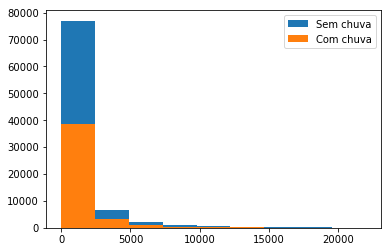

<module 'matplotlib.pyplot' from '/home/maru/anaconda3/envs/semana3/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

In [17]:
import numpy as np
import pandas
import matplotlib.pyplot as plt

def entries_histogram(turnstile_weather):
    rain_0 = turnstile_weather[turnstile_weather['rain'] == 0].ENTRIESn_hourly
    rain_1 = turnstile_weather[turnstile_weather['rain'] == 1].ENTRIESn_hourly
    bins = np.linspace(0, 22000, 10)
    plt.hist(rain_0, bins, label = 'Sem chuva', stacked=True)
    plt.hist(rain_1, bins, label = 'Com chuva', stacked=True)
    plt.legend(loc='upper right')
    plt.show()
    return plt

entries_histogram(df_weather)


### *Exercicio 2.7

Os dados que acabou de plotar que tipo de ditribuição? Existe diferença na distribuição entre dias chuvosos e não chuvosos?

** Resposta **: É uma distribuição assimétrica positiva. Existe uma diferença no volume, mas a distribuição é a mesma.

### *Exercicio 2.8

Construa uma função que que retorne:

1. A média das entradas com chuva
2. A média das entradas sem chuva




In [18]:
import numpy as np
import pandas

def means(turnstile_weather):
    without_rain_mean = turnstile_weather[turnstile_weather['rain'] == 0].ENTRIESn_hourly.mean()
    with_rain_mean = turnstile_weather[turnstile_weather['rain'] == 1].ENTRIESn_hourly.mean()
    return with_rain_mean, without_rain_mean
means(df_weather)

(1105.4463767458733, 1090.278780151855)

Responda as perguntas abaixo de acordo com a saida das suas funções:

1. Qual a média das entradas com chuva? 
2. Qual a média das entradas sem chuva? 

** Resposta **: 

### Média sem chuva: 1105.446

### Média com chuva: 1090.278

## Exercicio 3 - Map Reduce

### *Exercicio 3.1*

A entrada para esse exercício e o mesmo arquivo da seção anterior (Exercicio 2). Você pode baixar o arquivo neste link:

 https://s3.amazonaws.com/content.udacity-data.com/courses/ud359/turnstile_data_master_with_weather.csv

Varmos criar um mapeador agora. Para cada linha de entrada, a saída do mapeador deve IMPRIMIR (não retornar) a UNIT como uma chave e o número de ENTRIESn_hourly como o valor. Separe a chave e o valor por uma guia. Por exemplo: 'R002 \ t105105.0'

Exporte seu mapeador em um arquivo chamado mapper_result.txt e envie esse arquivo juntamente com a sua submissão. O código para exportar seu mapeador já está escrito no código abaixo.




In [19]:
def mapper():
    f_in = open('turnstile-data-master-with-weather.csv')
    f_out = open('mapper_result.txt', 'w')
    for line in f_in:
        data = line.strip().split(',')
        if len(data) == 22:
            print '{0}\t{1}' .format(data[1], data[7])
            f_out.write('{0}\t{1}\n' .format(data[1], data[7]))
    f_in.close()
    f_out.close()
        
mapper()

UNIT	EXITSn_hourly
R001	0.0
R001	553.0
R001	1262.0
R001	3708.0
R001	2501.0
R001	2122.0
R002	0.0
R002	66.0
R002	125.0
R002	716.0
R002	968.0
R002	566.0
R003	0.0
R003	0.0
R003	0.0
R003	0.0
R003	0.0
R004	0.0
R004	0.0
R004	0.0
R004	0.0
R004	0.0
R004	0.0
R005	0.0
R005	2.0
R005	2.0
R005	7.0
R005	0.0
R006	0.0
R006	1.0
R006	1.0
R006	7.0
R006	3.0
R006	3.0
R007	0.0
R007	0.0
R007	0.0
R007	1.0
R008	0.0
R008	0.0
R008	0.0
R008	3.0
R008	0.0
R009	0.0
R009	4.0
R009	20.0
R009	17.0
R009	13.0
R010	0.0
R010	517.0
R010	899.0
R010	2349.0
R010	3457.0
R010	2510.0
R011	0.0
R011	1036.0
R011	455.0
R011	5693.0
R011	6794.0
R011	7869.0
R012	0.0
R012	0.0
R012	1289.0
R012	1083.0
R012	6018.0
R012	9457.0
R012	8016.0
R013	0.0
R013	122.0
R013	168.0
R013	1229.0
R013	2219.0
R013	1496.0
R014	0.0
R014	48.0
R014	211.0
R014	615.0
R014	714.0
R014	390.0
R015	0.0
R015	45.0
R015	585.0
R015	1802.0
R015	1364.0
R015	513.0
R016	0.0
R016	100.0
R016	592.0
R016	620.0
R016	570.0
R017	0.0
R017	342.0
R017	398.0
R017	1855.0
R017	2025.0
R017	19

R290	1033.0
R290	849.0
R291	0.0
R291	99.0
R291	32.0
R291	669.0
R291	523.0
R291	415.0
R292	0.0
R292	41.0
R292	19.0
R292	34.0
R292	62.0
R292	103.0
R293	0.0
R293	436.0
R293	2246.0
R293	5350.0
R293	6657.0
R293	3701.0
R294	0.0
R294	353.0
R294	107.0
R294	226.0
R294	404.0
R294	544.0
R295	0.0
R295	299.0
R295	346.0
R295	396.0
R295	655.0
R296	0.0
R296	239.0
R296	100.0
R296	167.0
R296	330.0
R296	471.0
R297	0.0
R297	4.0
R297	676.0
R297	987.0
R297	1154.0
R298	0.0
R298	145.0
R298	174.0
R298	379.0
R298	710.0
R298	754.0
R299	0.0
R299	83.0
R299	218.0
R299	316.0
R299	506.0
R299	536.0
R300	0.0
R300	687.0
R300	223.0
R300	2205.0
R300	3101.0
R300	3627.0
R301	0.0
R301	111.0
R301	203.0
R301	699.0
R301	1012.0
R301	778.0
R302	0.0
R302	152.0
R302	735.0
R302	2132.0
R302	2205.0
R302	912.0
R303	0.0
R303	352.0
R303	927.0
R303	790.0
R303	1456.0
R304	0.0
R304	93.0
R304	24.0
R304	251.0
R304	392.0
R304	397.0
R306	0.0
R306	57.0
R306	27.0
R306	71.0
R306	102.0
R306	128.0
R307	0.0
R307	132.0
R307	377.0
R307	244.0
R307	304.0

R541	0.0
R541	7.0
R541	0.0
R541	0.0
R541	8.0
R541	0.0
R541	3.0
R541	0.0
R541	7.0
R541	0.0
R541	20.0
R541	0.0
R541	1.0
R541	0.0
R541	2.0
R541	1.0
R541	0.0
R541	1.0
R541	131.0
R541	2.0
R541	0.0
R541	10.0
R541	4.0
R541	6.0
R541	1.0
R541	2.0
R541	145.0
R541	4.0
R541	0.0
R541	0.0
R541	5.0
R541	16.0
R541	1.0
R541	0.0
R541	274.0
R541	1.0
R541	0.0
R541	29.0
R541	1.0
R541	25.0
R541	0.0
R541	4.0
R541	2.0
R541	0.0
R541	19.0
R541	1.0
R541	20.0
R541	2.0
R541	24.0
R541	2.0
R541	4.0
R541	58.0
R541	13.0
R541	331.0
R541	13.0
R541	3.0
R541	2.0
R541	283.0
R541	28.0
R541	49.0
R541	0.0
R541	0.0
R541	271.0
R541	34.0
R541	0.0
R541	2.0
R541	394.0
R541	465.0
R541	3.0
R541	0.0
R541	178.0
R541	1.0
R541	1.0
R541	554.0
R541	1.0
R541	771.0
R541	1.0
R541	32.0
R541	13.0
R541	373.0
R541	0.0
R541	2.0
R541	1256.0
R541	13.0
R541	143.0
R541	3.0
R541	0.0
R541	279.0
R541	32.0
R541	0.0
R541	53.0
R541	0.0
R541	766.0
R541	32.0
R541	104.0
R541	0.0
R541	0.0
R541	45.0
R541	61.0
R541	0.0
R541	1.0
R541	343.0
R541	552.0
R541	2.0
R54

R079	2059.0
R079	1216.0
R080	493.0
R080	1537.0
R080	1347.0
R080	7420.0
R080	2795.0
R080	2791.0
R081	1087.0
R081	468.0
R081	20.0
R081	2648.0
R081	6977.0
R081	3787.0
R081	6958.0
R082	505.0
R082	66.0
R082	497.0
R082	5995.0
R082	2634.0
R082	2801.0
R083	371.0
R083	37.0
R083	1014.0
R083	5947.0
R083	2491.0
R083	2465.0
R084	2273.0
R084	484.0
R084	5887.0
R084	20457.0
R084	39.0
R084	10961.0
R084	12195.0
R084	236.0
R085	833.0
R085	114.0
R085	263.0
R085	3931.0
R085	2461.0
R085	3963.0
R086	1945.0
R086	58.0
R086	489.0
R086	4915.0
R086	4091.0
R086	4382.0
R087	41.0
R087	20.0
R087	469.0
R087	2335.0
R087	1088.0
R087	791.0
R088	45.0
R088	43.0
R088	1337.0
R088	848.0
R088	355.0
R088	313.0
R089	49.0
R089	10.0
R089	81.0
R089	1660.0
R089	651.0
R089	507.0
R090	311.0
R090	77.0
R090	246.0
R090	288.0
R090	664.0
R091	961.0
R091	300.0
R091	395.0
R091	1363.0
R091	208.0
R091	2329.0
R092	3022.0
R092	526.0
R092	564.0
R092	1705.0
R092	1902.0
R092	4431.0
R093	1594.0
R093	483.0
R093	323.0
R093	377.0
R093	1340.0
R093	3178.

R378	246.0
R378	733.0
R378	976.0
R378	1918.0
R378	2661.0
R379	418.0
R379	96.0
R379	418.0
R379	383.0
R379	741.0
R379	989.0
R380	303.0
R380	60.0
R380	340.0
R380	311.0
R380	746.0
R380	928.0
R381	361.0
R381	66.0
R381	242.0
R381	230.0
R381	693.0
R381	1015.0
R382	1118.0
R382	182.0
R382	112.0
R382	676.0
R382	1237.0
R382	2543.0
R383	1032.0
R383	72.0
R383	134.0
R383	209.0
R383	800.0
R383	1499.0
R384	235.0
R384	36.0
R384	177.0
R384	196.0
R384	651.0
R384	1343.0
R385	291.0
R385	68.0
R385	590.0
R385	177.0
R385	1455.0
R385	1730.0
R386	515.0
R386	111.0
R386	1139.0
R386	1032.0
R386	1925.0
R386	2045.0
R387	459.0
R387	112.0
R387	1082.0
R387	1046.0
R387	1618.0
R387	1666.0
R388	2631.0
R388	638.0
R388	817.0
R388	758.0
R388	1417.0
R388	1880.0
R389	3.0
R389	3.0
R389	228.0
R389	119.0
R389	368.0
R389	350.0
R390	333.0
R390	53.0
R390	1305.0
R390	2261.0
R390	3526.0
R390	3275.0
R391	290.0
R391	32.0
R391	489.0
R391	388.0
R391	959.0
R391	1318.0
R392	58.0
R392	11.0
R392	327.0
R392	596.0
R392	1344.0
R392	2156.0
R393	1

R550	3.0
R550	56.0
R550	3.0
R550	3.0
R550	6.0
R550	1.0
R550	0.0
R550	0.0
R550	0.0
R550	0.0
R550	4.0
R550	5.0
R550	0.0
R550	2.0
R550	5.0
R550	2.0
R550	0.0
R550	4.0
R550	0.0
R550	17.0
R550	1.0
R550	4.0
R550	0.0
R550	2.0
R550	0.0
R550	0.0
R550	5.0
R550	5.0
R550	2.0
R550	4.0
R550	0.0
R550	10.0
R550	32.0
R550	12.0
R550	8.0
R550	10.0
R550	16.0
R550	38.0
R550	4.0
R550	16.0
R550	12.0
R550	10.0
R550	5.0
R550	11.0
R550	487.0
R550	1.0
R550	1.0
R550	28.0
R550	343.0
R550	26.0
R550	15.0
R550	2.0
R550	33.0
R550	24.0
R550	31.0
R550	6.0
R550	26.0
R550	22.0
R550	5.0
R550	7.0
R550	36.0
R550	43.0
R550	73.0
R550	74.0
R550	9.0
R550	5.0
R550	57.0
R550	1.0
R550	30.0
R550	2.0
R550	39.0
R550	5.0
R550	3.0
R550	8.0
R550	26.0
R550	2.0
R550	15.0
R550	2.0
R550	16.0
R550	181.0
R550	44.0
R550	31.0
R550	46.0
R550	13.0
R550	32.0
R550	20.0
R550	6.0
R550	22.0
R550	687.0
R550	5.0
R550	2.0
R550	15.0
R550	267.0
R550	8.0
R550	4.0
R550	2.0
R550	13.0
R550	76.0
R550	8.0
R550	5.0
R550	25.0
R550	13.0
R550	6.0
R550	1.0
R550	14.0
R5

R195	2919.0
R195	2267.0
R195	3652.0
R196	1674.0
R196	383.0
R196	225.0
R196	851.0
R196	1685.0
R196	2973.0
R197	1064.0
R197	239.0
R197	1953.0
R197	1495.0
R197	2126.0
R197	2448.0
R198	2088.0
R198	337.0
R198	216.0
R198	1534.0
R198	1509.0
R198	5413.0
R199	982.0
R199	313.0
R199	302.0
R199	785.0
R199	871.0
R199	1648.0
R200	2169.0
R200	515.0
R200	109.0
R200	1168.0
R200	766.0
R200	1157.0
R201	1796.0
R201	208.0
R201	1281.0
R201	2677.0
R201	5197.0
R201	6067.0
R202	1369.0
R202	153.0
R202	67.0
R202	1710.0
R202	1692.0
R202	3258.0
R203	532.0
R203	66.0
R203	137.0
R203	6036.0
R203	2434.0
R203	2331.0
R204	1524.0
R204	349.0
R204	469.0
R204	929.0
R204	1736.0
R204	3168.0
R205	3.0
R205	3434.0
R205	1.0
R205	4000.0
R205	2186.0
R205	2342.0
R206	449.0
R206	116.0
R206	263.0
R206	1017.0
R206	1408.0
R206	1348.0
R206	1446.0
R207	2242.0
R207	1172.0
R207	733.0
R207	1434.0
R207	1279.0
R207	2024.0
R208	3334.0
R208	1051.0
R208	675.0
R208	1337.0
R208	1727.0
R208	5590.0
R209	782.0
R209	106.0
R209	724.0
R209	784.0
R209	159

R445	140.0
R445	964.0
R445	944.0
R445	1581.0
R445	1777.0
R446	735.0
R446	127.0
R446	922.0
R446	828.0
R446	460.0
R446	2637.0
R447	239.0
R447	76.0
R447	359.0
R447	1725.0
R447	501.0
R448	47.0
R448	13.0
R448	289.0
R448	295.0
R448	28.0
R448	163.0
R448	54.0
R449	665.0
R449	102.0
R449	810.0
R449	498.0
R449	676.0
R449	1598.0
R450	381.0
R450	97.0
R450	742.0
R450	529.0
R450	738.0
R450	757.0
R451	157.0
R451	26.0
R451	543.0
R451	382.0
R451	482.0
R451	540.0
R452	2850.0
R452	212.0
R452	5310.0
R452	7651.0
R452	6398.0
R452	9885.0
R453	765.0
R453	82.0
R453	959.0
R453	5439.0
R453	3008.0
R453	4300.0
R454	903.0
R454	153.0
R454	163.0
R454	845.0
R454	625.0
R454	1776.0
R455	535.0
R455	149.0
R455	321.0
R455	417.0
R455	406.0
R455	933.0
R456	171.0
R456	18.0
R456	122.0
R456	2402.0
R456	988.0
R456	816.0
R460	720.0
R460	127.0
R460	883.0
R460	806.0
R460	1498.0
R460	2043.0
R461	799.0
R461	118.0
R461	4260.0
R461	6338.0
R461	3965.0
R461	8052.0
R462	328.0
R462	64.0
R462	2115.0
R462	4182.0
R462	2801.0
R462	1988.0
R463	7

R024	759.0
R024	4938.0
R024	3958.0
R024	7179.0
R025	5757.0
R025	1109.0
R025	1158.0
R025	8415.0
R025	248.0
R025	6765.0
R025	13452.0
R027	1049.0
R027	278.0
R027	3165.0
R027	16259.0
R027	2903.0
R027	2607.0
R028	314.0
R028	972.0
R028	106.0
R028	10278.0
R028	2624.0
R028	2871.0
R028	1630.0
R029	1444.0
R029	1315.0
R029	675.0
R029	4797.0
R029	13322.0
R029	4743.0
R029	5123.0
R030	1119.0
R030	132.0
R030	2592.0
R030	9100.0
R030	3885.0
R030	4484.0
R031	2507.0
R031	204.0
R031	1463.0
R031	6380.0
R031	5805.0
R031	15877.0
R032	2863.0
R032	367.0
R032	2842.0
R032	20045.0
R032	8122.0
R032	10366.0
R033	3641.0
R033	579.0
R033	2047.0
R033	16555.0
R033	8860.0
R033	10004.0
R034	1369.0
R034	387.0
R034	2130.0
R034	1493.0
R034	2351.0
R035	1985.0
R035	319.0
R035	507.0
R035	7873.0
R035	3465.0
R035	3413.0
R036	253.0
R036	36.0
R036	115.0
R036	348.0
R036	381.0
R036	481.0
R037	960.0
R037	233.0
R037	376.0
R037	757.0
R037	1080.0
R037	1610.0
R038	158.0
R038	57.0
R038	23.0
R038	270.0
R038	253.0
R038	294.0
R039	222.0
R039	

R252	144.0
R252	202.0
R252	2410.0
R252	1087.0
R252	2342.0
R253	521.0
R253	171.0
R253	79.0
R253	802.0
R253	602.0
R253	1212.0
R254	1556.0
R254	232.0
R254	157.0
R254	410.0
R254	813.0
R254	3348.0
R255	656.0
R255	12.0
R255	264.0
R255	357.0
R255	379.0
R255	1184.0
R256	848.0
R256	113.0
R256	149.0
R256	589.0
R256	837.0
R256	1143.0
R256	1990.0
R257	1035.0
R257	171.0
R257	292.0
R257	2305.0
R257	1600.0
R257	2100.0
R258	1652.0
R258	292.0
R258	706.0
R258	2447.0
R258	1693.0
R258	3406.0
R259	1137.0
R259	137.0
R259	0.0
R259	1335.0
R259	957.0
R259	2016.0
R260	1987.0
R260	448.0
R260	2764.0
R260	2853.0
R260	3727.0
R261	2194.0
R261	426.0
R261	171.0
R261	2383.0
R261	1582.0
R261	3547.0
R262	777.0
R262	119.0
R262	60.0
R262	368.0
R262	616.0
R262	1453.0
R263	409.0
R263	41.0
R263	104.0
R263	75.0
R263	57.0
R263	8.0
R263	4.0
R263	73.0
R263	85.0
R264	407.0
R264	65.0
R264	83.0
R264	616.0
R264	531.0
R264	985.0
R265	1289.0
R265	276.0
R265	230.0
R265	1196.0
R265	827.0
R265	1818.0
R266	954.0
R266	78.0
R266	460.0
R266	4

R543	0.0
R543	10.0
R543	11.0
R543	2.0
R543	2.0
R543	0.0
R543	11.0
R543	11.0
R543	1.0
R543	1.0
R543	0.0
R543	27.0
R543	0.0
R543	28.0
R543	13.0
R543	13.0
R543	3.0
R543	2.0
R543	2.0
R543	0.0
R543	9.0
R543	17.0
R543	0.0
R543	6.0
R543	1.0
R543	2.0
R543	22.0
R543	21.0
R543	5.0
R543	35.0
R543	2.0
R543	572.0
R543	343.0
R543	3.0
R543	65.0
R543	123.0
R543	737.0
R543	12.0
R543	182.0
R543	887.0
R543	564.0
R543	450.0
R543	779.0
R543	40.0
R543	36.0
R543	582.0
R543	1190.0
R543	305.0
R543	28.0
R543	27.0
R543	11.0
R543	236.0
R543	101.0
R543	8.0
R543	77.0
R543	0.0
R543	742.0
R543	389.0
R543	1.0
R543	93.0
R543	92.0
R543	394.0
R543	13.0
R543	135.0
R543	429.0
R543	238.0
R543	140.0
R543	141.0
R543	9.0
R543	13.0
R543	84.0
R543	212.0
R543	24.0
R543	10.0
R543	8.0
R543	5.0
R543	23.0
R543	5.0
R543	8.0
R543	7.0
R543	0.0
R543	124.0
R543	51.0
R543	1.0
R543	93.0
R543	110.0
R543	96.0
R543	58.0
R543	221.0
R543	237.0
R543	42.0
R543	103.0
R543	8.0
R543	28.0
R543	189.0
R543	30.0
R543	20.0
R543	12.0
R543	9.0
R543	22.0
R54

R103	3815.0
R104	795.0
R104	249.0
R104	50.0
R104	1059.0
R104	934.0
R104	1691.0
R105	1542.0
R105	228.0
R105	493.0
R105	4786.0
R105	3143.0
R105	4790.0
R106	729.0
R106	267.0
R106	795.0
R106	902.0
R106	1954.0
R107	725.0
R107	173.0
R107	2398.0
R107	1316.0
R107	1749.0
R108	1938.0
R108	598.0
R108	2165.0
R108	10960.0
R108	5908.0
R108	6797.0
R109	248.0
R109	49.0
R109	307.0
R109	381.0
R109	672.0
R109	879.0
R110	1305.0
R110	256.0
R110	1337.0
R110	2371.0
R110	3723.0
R110	5367.0
R111	1494.0
R111	148.0
R111	1518.0
R111	5525.0
R111	2604.0
R111	4659.0
R112	877.0
R112	342.0
R112	224.0
R112	1124.0
R112	1169.0
R112	2348.0
R113	556.0
R113	106.0
R113	6181.0
R113	5420.0
R113	2679.0
R113	2698.0
R114	1172.0
R114	303.0
R114	482.0
R114	1457.0
R114	1104.0
R114	2470.0
R115	1353.0
R115	235.0
R115	214.0
R115	1731.0
R115	1430.0
R115	3280.0
R116	1423.0
R116	172.0
R116	2250.0
R116	406.0
R116	460.0
R116	12182.0
R116	4149.0
R116	6300.0
R117	181.0
R117	1747.0
R117	137.0
R117	499.0
R117	719.0
R117	1283.0
R118	200.0
R118	4

R397	287.0
R398	569.0
R398	87.0
R398	900.0
R398	205.0
R398	2185.0
R398	1660.0
R399	191.0
R399	45.0
R399	237.0
R399	323.0
R399	482.0
R399	449.0
R400	156.0
R400	24.0
R400	511.0
R400	606.0
R400	324.0
R400	372.0
R401	478.0
R401	80.0
R401	243.0
R401	259.0
R401	708.0
R401	990.0
R402	412.0
R402	61.0
R402	137.0
R402	254.0
R402	651.0
R402	979.0
R403	469.0
R403	107.0
R403	237.0
R403	245.0
R403	938.0
R403	1509.0
R404	341.0
R404	89.0
R404	104.0
R404	234.0
R404	688.0
R404	949.0
R405	99.0
R405	26.0
R405	199.0
R405	130.0
R405	238.0
R405	310.0
R406	159.0
R406	27.0
R406	362.0
R406	351.0
R406	502.0
R406	590.0
R407	324.0
R407	80.0
R407	712.0
R407	378.0
R407	754.0
R407	827.0
R408	156.0
R408	12.0
R408	257.0
R408	326.0
R408	831.0
R408	778.0
R409	950.0
R409	78.0
R409	1271.0
R409	363.0
R409	914.0
R409	1325.0
R411	301.0
R411	35.0
R411	477.0
R411	319.0
R411	557.0
R411	794.0
R412	207.0
R412	35.0
R412	717.0
R412	540.0
R412	557.0
R412	630.0
R413	274.0
R413	73.0
R413	350.0
R413	418.0
R413	656.0
R413	859.0
R414	73.0

R549	8.0
R549	13.0
R549	0.0
R549	0.0
R549	49.0
R549	10.0
R549	82.0
R549	1.0
R549	0.0
R549	8.0
R549	0.0
R549	5.0
R549	1.0
R549	3.0
R549	44.0
R549	10.0
R549	2.0
R549	1.0
R549	2.0
R549	8.0
R549	0.0
R549	2.0
R549	0.0
R549	11.0
R549	113.0
R549	659.0
R549	223.0
R549	5.0
R549	4.0
R549	0.0
R549	257.0
R549	0.0
R549	45.0
R549	131.0
R549	0.0
R549	1.0
R549	0.0
R549	6.0
R549	84.0
R549	1.0
R549	3.0
R549	2.0
R549	165.0
R549	17.0
R549	114.0
R549	4.0
R549	4.0
R549	1.0
R549	61.0
R549	3.0
R549	4.0
R549	5.0
R549	1.0
R549	5.0
R549	140.0
R549	7.0
R549	0.0
R549	0.0
R549	129.0
R549	198.0
R549	135.0
R549	7.0
R549	0.0
R549	372.0
R549	2.0
R549	122.0
R549	0.0
R549	578.0
R549	5.0
R549	206.0
R549	59.0
R549	158.0
R549	3.0
R549	240.0
R549	1.0
R549	0.0
R549	192.0
R549	7.0
R549	284.0
R549	4.0
R549	0.0
R549	2.0
R549	0.0
R549	2.0
R549	0.0
R549	1.0
R549	206.0
R549	1.0
R549	4.0
R549	0.0
R549	0.0
R549	8.0
R549	2.0
R549	0.0
R549	0.0
R549	25.0
R549	462.0
R549	1645.0
R549	825.0
R549	1.0
R549	1.0
R549	0.0
R549	878.0
R549	0.0
R5

R173	92.0
R173	1745.0
R173	153.0
R174	1687.0
R174	251.0
R174	633.0
R174	933.0
R174	2102.0
R174	3185.0
R175	197.0
R175	23.0
R175	1729.0
R175	2053.0
R175	6239.0
R175	9601.0
R175	7603.0
R175	8439.0
R176	2030.0
R176	238.0
R176	6720.0
R176	7605.0
R176	5846.0
R176	7305.0
R177	1356.0
R177	217.0
R177	8241.0
R177	6591.0
R177	4292.0
R177	3387.0
R178	2553.0
R178	328.0
R178	8579.0
R178	8583.0
R178	7757.0
R178	9051.0
R179	7786.0
R179	867.0
R179	5760.0
R179	14612.0
R179	13295.0
R179	21337.0
R180	1710.0
R180	310.0
R180	3292.0
R180	2704.0
R180	3607.0
R180	3838.0
R181	1785.0
R181	548.0
R181	646.0
R181	2398.0
R181	2230.0
R181	3287.0
R182	1192.0
R182	357.0
R182	2095.0
R182	1538.0
R182	1662.0
R182	1427.0
R183	971.0
R183	236.0
R183	272.0
R183	1863.0
R183	1300.0
R183	1807.0
R184	592.0
R184	224.0
R184	708.0
R184	981.0
R184	856.0
R185	14.0
R185	13.0
R185	25.0
R185	23.0
R185	37.0
R185	51.0
R186	574.0
R186	90.0
R186	36.0
R186	5.0
R186	332.0
R186	2027.0
R186	1221.0
R186	333.0
R186	1638.0
R187	678.0
R187	59.0
R18

R353	468.0
R353	65.0
R353	521.0
R353	362.0
R353	696.0
R353	990.0
R354	344.0
R354	65.0
R354	249.0
R354	260.0
R354	721.0
R355	246.0
R355	50.0
R355	108.0
R355	170.0
R355	487.0
R355	975.0
R356	1244.0
R356	289.0
R356	925.0
R356	1347.0
R356	2920.0
R357	70.0
R357	34.0
R357	70.0
R357	58.0
R357	181.0
R357	318.0
R358	473.0
R358	131.0
R358	469.0
R358	339.0
R358	728.0
R359	353.0
R359	110.0
R359	3845.0
R359	41.0
R359	232.0
R359	674.0
R360	82.0
R360	43.0
R360	545.0
R360	245.0
R360	155.0
R360	40.0
R360	203.0
R361	417.0
R361	128.0
R361	530.0
R361	632.0
R361	1005.0
R361	1314.0
R362	229.0
R362	53.0
R362	293.0
R362	345.0
R362	555.0
R362	759.0
R363	146.0
R363	40.0
R363	124.0
R363	126.0
R363	327.0
R363	522.0
R364	951.0
R364	186.0
R364	1615.0
R364	863.0
R364	2103.0
R364	2439.0
R365	438.0
R365	45.0
R365	317.0
R365	173.0
R365	420.0
R365	190.0
R366	297.0
R366	60.0
R366	224.0
R366	223.0
R366	543.0
R366	702.0
R367	208.0
R367	32.0
R367	187.0
R367	191.0
R367	415.0
R367	572.0
R368	1166.0
R368	205.0
R368	476.0
R368	

R549	2.0
R549	11.0
R549	1.0
R549	0.0
R549	11.0
R549	5.0
R549	17.0
R549	0.0
R549	0.0
R549	3.0
R549	0.0
R549	0.0
R549	1.0
R549	0.0
R549	12.0
R549	3.0
R549	0.0
R549	0.0
R549	0.0
R549	3.0
R549	0.0
R549	0.0
R549	1.0
R549	5.0
R549	25.0
R549	193.0
R549	88.0
R549	2.0
R549	0.0
R549	0.0
R549	88.0
R549	3.0
R549	38.0
R549	28.0
R549	2.0
R549	2.0
R549	1.0
R549	0.0
R549	81.0
R549	3.0
R549	2.0
R549	3.0
R549	103.0
R549	7.0
R549	88.0
R549	0.0
R549	1.0
R549	0.0
R549	0.0
R549	50.0
R549	0.0
R549	1.0
R549	0.0
R549	0.0
R549	2.0
R549	129.0
R549	3.0
R549	1.0
R549	110.0
R549	27.0
R549	7.0
R549	1.0
R549	120.0
R549	85.0
R549	67.0
R549	88.0
R549	141.0
R549	86.0
R549	10.0
R549	1.0
R549	89.0
R549	133.0
R549	1.0
R549	0.0
R549	4.0
R549	3.0
R549	74.0
R549	3.0
R549	0.0
R549	1.0
R549	39.0
R549	184.0
R549	951.0
R549	470.0
R549	2.0
R549	448.0
R549	4.0
R549	86.0
R549	78.0
R549	0.0
R549	3.0
R549	206.0
R549	1.0
R549	206.0
R549	15.0
R549	156.0
R549	1.0
R549	6.0
R549	73.0
R549	3.0
R549	3.0
R549	1.0
R549	1.0
R549	5.0
R549	114.0


R084	1041.0
R084	1588.0
R084	24.0
R084	24.0
R084	8200.0
R084	10314.0
R084	228.0
R084	8536.0
R084	231.0
R084	12.0
R085	2149.0
R085	303.0
R085	199.0
R085	1887.0
R085	2830.0
R085	2942.0
R086	1388.0
R086	187.0
R086	77.0
R086	3786.0
R086	6218.0
R086	4961.0
R087	225.0
R087	40.0
R087	543.0
R087	593.0
R087	418.0
R088	60.0
R088	22.0
R088	128.0
R088	211.0
R088	246.0
R088	184.0
R089	97.0
R089	23.0
R089	26.0
R089	305.0
R089	315.0
R089	228.0
R090	446.0
R090	150.0
R090	61.0
R090	481.0
R090	374.0
R090	433.0
R091	1545.0
R091	624.0
R091	80.0
R091	952.0
R091	1299.0
R091	1664.0
R092	2695.0
R092	1121.0
R092	1537.0
R092	1925.0
R092	2385.0
R093	3029.0
R093	1070.0
R093	1447.0
R093	1808.0
R093	2487.0
R093	39.0
R094	2362.0
R094	937.0
R094	156.0
R094	963.0
R094	1607.0
R094	1909.0
R095	3554.0
R095	1134.0
R095	432.0
R095	1213.0
R095	2146.0
R095	3045.0
R096	3117.0
R096	1055.0
R096	159.0
R096	2911.0
R096	657.0
R096	546.0
R096	2719.0
R096	3952.0
R097	3762.0
R097	1420.0
R097	2878.0
R097	3214.0
R097	4651.0
R098	2979.0

R540	103.0
R540	4.0
R540	91.0
R540	528.0
R540	189.0
R540	66.0
R540	197.0
R540	173.0
R540	109.0
R540	146.0
R540	203.0
R540	5.0
R540	436.0
R540	22.0
R540	0.0
R540	376.0
R540	174.0
R540	31.0
R540	3.0
R540	245.0
R540	390.0
R540	418.0
R540	25.0
R540	0.0
R540	56.0
R540	326.0
R540	271.0
R540	64.0
R540	12.0
R540	72.0
R540	339.0
R540	378.0
R540	70.0
R540	293.0
R540	103.0
R540	59.0
R540	51.0
R540	52.0
R540	2.0
R540	315.0
R540	313.0
R540	9.0
R540	0.0
R540	99.0
R540	23.0
R540	4.0
R540	203.0
R540	258.0
R540	310.0
R540	17.0
R540	305.0
R540	1.0
R540	29.0
R540	210.0
R540	198.0
R540	28.0
R540	1.0
R540	26.0
R540	247.0
R540	244.0
R540	15.0
R540	224.0
R540	67.0
R540	21.0
R540	31.0
R540	64.0
R540	1.0
R541	409.0
R541	72.0
R541	0.0
R541	0.0
R541	157.0
R541	216.0
R541	7.0
R541	42.0
R541	153.0
R541	0.0
R541	179.0
R541	26.0
R541	5.0
R541	5.0
R541	1.0
R541	0.0
R541	7.0
R541	0.0
R541	182.0
R541	1.0
R541	5.0
R541	37.0
R541	175.0
R541	5.0
R541	1.0
R541	1.0
R541	14.0
R541	17.0
R541	0.0
R541	0.0
R541	23.0
R541	0.0
R5

R030	1881.0
R031	2192.0
R031	348.0
R031	359.0
R031	2796.0
R031	4142.0
R031	3406.0
R032	3707.0
R032	744.0
R032	575.0
R032	3237.0
R032	5887.0
R032	5283.0
R033	5593.0
R033	1193.0
R033	556.0
R033	4454.0
R033	7992.0
R033	6584.0
R034	1176.0
R034	496.0
R034	764.0
R034	965.0
R034	1358.0
R035	3270.0
R035	1451.0
R035	345.0
R035	19.0
R035	2027.0
R035	2879.0
R035	3812.0
R036	3.0
R036	2.0
R036	0.0
R036	1.0
R036	0.0
R036	0.0
R037	10.0
R037	4.0
R037	1.0
R037	15.0
R037	13.0
R037	3.0
R038	7.0
R038	7.0
R038	4.0
R038	12.0
R038	16.0
R039	0.0
R039	0.0
R039	0.0
R039	0.0
R039	0.0
R040	1.0
R040	4.0
R040	0.0
R040	5.0
R040	2.0
R040	4.0
R041	429.0
R041	119.0
R041	150.0
R041	732.0
R041	745.0
R041	692.0
R042	709.0
R042	264.0
R042	38.0
R042	1657.0
R042	1688.0
R042	1092.0
R043	110.0
R043	35.0
R043	23.0
R043	16.0
R043	8.0
R043	2.0
R043	22.0
R043	38.0
R043	66.0
R043	82.0
R043	103.0
R043	137.0
R043	147.0
R043	164.0
R043	149.0
R043	170.0
R043	166.0
R043	138.0
R043	201.0
R043	149.0
R043	101.0
R043	88.0
R043	114.0
R043	89

R271	98.0
R271	48.0
R271	132.0
R271	203.0
R271	291.0
R272	673.0
R272	155.0
R272	240.0
R272	738.0
R272	787.0
R272	687.0
R273	1267.0
R273	787.0
R273	224.0
R273	514.0
R273	954.0
R273	1481.0
R274	1.0
R274	0.0
R274	1.0
R274	1.0
R274	0.0
R275	590.0
R275	105.0
R275	21.0
R275	418.0
R275	410.0
R275	774.0
R276	1025.0
R276	338.0
R276	81.0
R276	663.0
R276	1019.0
R276	1307.0
R277	418.0
R277	383.0
R277	206.0
R277	685.0
R278	112.0
R278	19.0
R278	197.0
R278	169.0
R278	139.0
R279	581.0
R279	325.0
R279	309.0
R279	437.0
R279	636.0
R280	481.0
R280	153.0
R280	377.0
R280	696.0
R280	472.0
R281	577.0
R281	50.0
R281	1293.0
R281	1803.0
R281	1249.0
R282	278.0
R282	74.0
R282	2.0
R282	348.0
R282	500.0
R282	388.0
R283	390.0
R283	124.0
R283	115.0
R283	322.0
R283	512.0
R283	466.0
R284	803.0
R284	354.0
R284	31.0
R284	405.0
R284	485.0
R284	638.0
R285	80.0
R285	480.0
R285	82.0
R285	224.0
R285	380.0
R285	846.0
R286	343.0
R286	242.0
R286	105.0
R286	156.0
R286	326.0
R286	452.0
R287	745.0
R287	306.0
R287	278.0
R287	425.0
R2

R546	235.0
R546	733.0
R546	82.0
R546	906.0
R546	38.0
R547	142.0
R547	267.0
R547	41.0
R547	14.0
R547	65.0
R547	19.0
R547	44.0
R547	5.0
R547	6.0
R547	27.0
R547	2.0
R547	43.0
R547	64.0
R547	26.0
R547	112.0
R547	42.0
R547	187.0
R547	113.0
R547	48.0
R547	201.0
R547	80.0
R547	248.0
R547	87.0
R547	22.0
R547	150.0
R547	61.0
R547	138.0
R547	38.0
R548	157.0
R548	55.0
R548	18.0
R548	129.0
R548	35.0
R548	14.0
R548	7.0
R548	20.0
R548	53.0
R548	54.0
R548	7.0
R548	140.0
R548	198.0
R548	100.0
R548	25.0
R548	278.0
R548	68.0
R548	23.0
R548	306.0
R548	34.0
R549	8.0
R549	56.0
R549	64.0
R549	45.0
R549	1.0
R549	0.0
R549	58.0
R549	1.0
R549	0.0
R549	5.0
R549	0.0
R549	64.0
R549	5.0
R549	96.0
R549	88.0
R549	0.0
R549	6.0
R549	0.0
R549	0.0
R549	55.0
R549	0.0
R549	29.0
R549	46.0
R549	0.0
R549	0.0
R549	0.0
R549	1.0
R549	2.0
R549	1.0
R549	0.0
R549	1.0
R549	3.0
R549	222.0
R549	0.0
R549	0.0
R549	0.0
R549	180.0
R549	1.0
R549	55.0
R549	46.0
R549	101.0
R549	630.0
R549	1.0
R549	6.0
R549	0.0
R549	0.0
R549	83.0
R549	0.0
R54

R147	208.0
R147	1364.0
R148	652.0
R148	112.0
R148	51.0
R148	375.0
R148	699.0
R148	1466.0
R148	2324.0
R149	812.0
R149	135.0
R149	635.0
R149	753.0
R149	1286.0
R150	139.0
R150	20.0
R150	240.0
R150	314.0
R150	688.0
R150	1089.0
R151	1156.0
R151	326.0
R151	2068.0
R151	2229.0
R151	3920.0
R151	3922.0
R152	223.0
R152	64.0
R152	280.0
R152	426.0
R152	824.0
R152	1281.0
R153	1151.0
R153	240.0
R153	1453.0
R153	1336.0
R153	2900.0
R153	4050.0
R154	842.0
R154	178.0
R154	952.0
R154	732.0
R154	542.0
R154	3779.0
R155	723.0
R155	196.0
R155	729.0
R155	674.0
R155	1436.0
R155	2207.0
R156	425.0
R156	118.0
R156	218.0
R156	358.0
R156	483.0
R156	151.0
R156	129.0
R156	687.0
R156	1589.0
R157	762.0
R157	158.0
R157	648.0
R157	647.0
R157	1681.0
R157	2412.0
R158	375.0
R158	669.0
R158	3573.0
R158	2768.0
R158	8381.0
R158	6574.0
R159	313.0
R159	45.0
R159	1764.0
R159	2463.0
R159	1794.0
R159	1300.0
R160	639.0
R160	84.0
R160	2408.0
R160	4231.0
R160	3835.0
R160	5879.0
R161	689.0
R161	169.0
R161	1141.0
R161	1696.0
R161	1819.0


R381	252.0
R381	695.0
R381	1042.0
R382	733.0
R382	211.0
R382	875.0
R382	1108.0
R382	2697.0
R383	328.0
R383	66.0
R383	148.0
R383	185.0
R383	834.0
R383	1489.0
R384	193.0
R384	42.0
R384	155.0
R384	194.0
R384	656.0
R384	1345.0
R385	357.0
R385	66.0
R385	597.0
R385	543.0
R385	1065.0
R385	2249.0
R386	642.0
R386	124.0
R386	1198.0
R386	1013.0
R386	1941.0
R386	2086.0
R387	651.0
R387	146.0
R387	1090.0
R387	1218.0
R387	1760.0
R387	1834.0
R388	559.0
R388	120.0
R388	729.0
R388	711.0
R388	1306.0
R388	1906.0
R389	98.0
R389	37.0
R389	237.0
R389	162.0
R389	367.0
R389	378.0
R390	2069.0
R390	38.0
R390	1275.0
R390	2246.0
R390	3351.0
R390	3550.0
R391	316.0
R391	32.0
R391	457.0
R391	369.0
R391	927.0
R391	1395.0
R392	83.0
R392	14.0
R392	307.0
R392	504.0
R392	1228.0
R392	2176.0
R393	282.0
R393	17.0
R393	780.0
R393	406.0
R393	747.0
R393	1499.0
R394	397.0
R394	26.0
R394	550.0
R394	635.0
R394	1435.0
R394	2511.0
R395	267.0
R395	43.0
R395	379.0
R395	386.0
R395	913.0
R395	1665.0
R396	75.0
R396	18.0
R396	452.0
R396	3

R550	0.0
R550	4.0
R550	3.0
R550	20.0
R550	0.0
R550	0.0
R550	0.0
R550	29.0
R550	0.0
R550	3.0
R550	3.0
R550	6.0
R550	2.0
R550	7.0
R550	2.0
R550	0.0
R550	1.0
R550	7.0
R550	29.0
R550	5.0
R550	5.0
R550	449.0
R550	9.0
R550	29.0
R550	0.0
R550	9.0
R550	0.0
R550	62.0
R550	12.0
R550	129.0
R550	28.0
R550	55.0
R550	16.0
R550	23.0
R550	3.0
R550	35.0
R550	40.0
R550	29.0
R550	10.0
R550	2.0
R550	35.0
R550	15.0
R550	8.0
R550	6.0
R550	357.0
R550	3.0
R550	7.0
R550	6.0
R550	26.0
R550	31.0
R550	46.0
R550	3.0
R550	7.0
R550	215.0
R550	24.0
R550	70.0
R550	17.0
R550	612.0
R550	0.0
R550	34.0
R550	25.0
R550	8.0
R550	0.0
R550	49.0
R550	14.0
R550	110.0
R550	36.0
R550	35.0
R550	46.0
R550	27.0
R550	4.0
R550	61.0
R550	35.0
R550	10.0
R550	11.0
R550	8.0
R550	7.0
R550	27.0
R550	7.0
R550	16.0
R550	8.0
R550	314.0
R550	1.0
R550	6.0
R550	5.0
R550	14.0
R550	10.0
R550	98.0
R550	24.0
R550	0.0
R550	4.0
R550	17.0
R550	241.0
R550	45.0
R550	70.0
R550	105.0
R550	707.0
R550	39.0
R550	153.0
R550	6.0
R550	2.0
R550	270.0
R550	128.0
R55

R238	3768.0
R239	1621.0
R239	843.0
R239	18.0
R239	0.0
R239	2.0
R239	1075.0
R239	1158.0
R239	42.0
R239	1592.0
R239	37.0
R240	1504.0
R240	230.0
R240	1881.0
R240	7185.0
R240	2483.0
R240	5644.0
R241	634.0
R241	83.0
R241	182.0
R241	200.0
R241	852.0
R241	1572.0
R242	1625.0
R242	114.0
R242	162.0
R242	898.0
R242	178.0
R242	565.0
R242	1088.0
R243	1119.0
R243	272.0
R243	293.0
R243	884.0
R243	383.0
R243	1416.0
R243	2428.0
R244	1307.0
R244	387.0
R244	180.0
R244	1601.0
R244	1633.0
R244	2118.0
R246	101.0
R246	20.0
R246	166.0
R246	454.0
R246	261.0
R246	295.0
R247	244.0
R247	37.0
R247	203.0
R247	471.0
R247	365.0
R247	726.0
R248	7265.0
R248	360.0
R248	2081.0
R248	7596.0
R248	4106.0
R248	6569.0
R249	1543.0
R249	287.0
R249	380.0
R249	1125.0
R249	544.0
R249	594.0
R249	2435.0
R250	908.0
R250	234.0
R250	695.0
R250	2576.0
R250	1189.0
R250	2071.0
R251	933.0
R251	36.0
R251	167.0
R251	2941.0
R251	1814.0
R251	3346.0
R252	918.0
R252	105.0
R252	340.0
R252	2582.0
R252	1392.0
R252	2242.0
R253	846.0
R253	167.0
R253	1

R543	173.0
R543	63.0
R543	114.0
R543	367.0
R543	9.0
R543	326.0
R543	902.0
R543	503.0
R543	238.0
R543	18.0
R543	14.0
R543	7.0
R543	88.0
R543	70.0
R543	0.0
R543	1.0
R543	1059.0
R543	146.0
R543	9.0
R543	0.0
R543	580.0
R543	615.0
R543	116.0
R543	428.0
R543	968.0
R543	20.0
R543	21.0
R543	400.0
R543	552.0
R543	371.0
R543	132.0
R543	9.0
R543	4.0
R543	5.0
R543	247.0
R543	1.0
R543	7.0
R543	6.0
R543	0.0
R543	0.0
R543	144.0
R543	977.0
R543	45.0
R543	1.0
R543	0.0
R543	49.0
R543	104.0
R543	60.0
R543	42.0
R543	188.0
R543	3.0
R543	21.0
R543	89.0
R543	260.0
R543	64.0
R543	33.0
R543	11.0
R543	11.0
R543	7.0
R543	27.0
R543	5.0
R543	11.0
R543	12.0
R543	1.0
R543	1.0
R543	205.0
R543	317.0
R543	274.0
R543	21.0
R543	0.0
R543	131.0
R543	603.0
R543	242.0
R543	45.0
R543	473.0
R543	11.0
R543	62.0
R543	373.0
R543	642.0
R543	101.0
R543	51.0
R543	7.0
R543	6.0
R543	2.0
R543	26.0
R543	0.0
R543	15.0
R543	7.0
R544	3.0
R544	7.0
R544	2.0
R544	6.0
R544	1.0
R544	1.0
R544	33.0
R544	71.0
R544	118.0
R544	7.0
R544	48.0
R544	5.0

R013	60.0
R013	2729.0
R013	5669.0
R013	5676.0
R013	13219.0
R014	862.0
R014	147.0
R014	162.0
R014	9130.0
R014	6643.0
R014	4004.0
R014	3484.0
R015	470.0
R015	351.0
R015	66.0
R015	5271.0
R015	6343.0
R015	3985.0
R015	2547.0
R015	3085.0
R015	1118.0
R016	356.0
R016	57.0
R016	286.0
R016	6016.0
R016	1632.0
R016	1513.0
R017	1478.0
R017	132.0
R017	2431.0
R017	20766.0
R017	12.0
R017	49.0
R017	4397.0
R017	5591.0
R018	8541.0
R018	1702.0
R018	525.0
R018	6348.0
R018	3425.0
R018	9567.0
R019	2212.0
R019	456.0
R019	389.0
R019	1526.0
R019	1803.0
R019	5314.0
R020	1555.0
R020	201.0
R020	7.0
R020	5126.0
R020	38782.0
R020	9064.0
R020	6482.0
R021	7701.0
R021	214.0
R021	3213.0
R021	225.0
R021	466.0
R021	338.0
R021	135.0
R021	14190.0
R021	579.0
R021	6033.0
R021	7573.0
R022	9945.0
R022	6821.0
R022	2693.0
R022	24515.0
R022	12905.0
R022	13596.0
R023	4261.0
R023	392.0
R023	2445.0
R023	19834.0
R023	9394.0
R023	17384.0
R024	2864.0
R024	1432.0
R024	1429.0
R024	3996.0
R024	3752.0
R024	7595.0
R025	14537.0
R025	8271.0
R0

R332	1138.0
R333	830.0
R333	68.0
R333	986.0
R333	312.0
R333	4126.0
R334	891.0
R334	68.0
R334	924.0
R334	695.0
R334	1290.0
R334	1877.0
R335	511.0
R335	119.0
R335	71.0
R335	337.0
R335	461.0
R335	958.0
R336	472.0
R336	109.0
R336	318.0
R336	436.0
R336	872.0
R337	198.0
R337	41.0
R337	153.0
R337	153.0
R337	353.0
R338	174.0
R338	53.0
R338	54.0
R338	107.0
R338	165.0
R338	306.0
R339	124.0
R339	28.0
R339	1290.0
R339	1015.0
R339	692.0
R339	363.0
R340	515.0
R340	56.0
R340	238.0
R340	262.0
R340	723.0
R340	1190.0
R341	44.0
R341	12.0
R341	3.0
R341	67.0
R341	32.0
R341	117.0
R342	701.0
R342	95.0
R342	798.0
R342	661.0
R342	1322.0
R342	1849.0
R343	151.0
R343	22.0
R343	780.0
R343	1103.0
R343	546.0
R343	837.0
R344	18.0
R344	37.0
R344	16.0
R344	22.0
R344	60.0
R344	40.0
R345	474.0
R345	45.0
R345	877.0
R345	98.0
R345	296.0
R346	766.0
R346	215.0
R346	435.0
R346	3824.0
R346	1374.0
R346	2154.0
R347	860.0
R347	113.0
R347	518.0
R347	445.0
R347	895.0
R347	1684.0
R348	67.0
R348	18.0
R348	74.0
R348	195.0
R348	84.0
R3

R549	5.0
R549	89.0
R549	111.0
R549	2.0
R549	4.0
R549	13.0
R549	64.0
R549	3.0
R549	108.0
R549	8.0
R549	0.0
R549	2.0
R549	0.0
R549	0.0
R549	63.0
R549	4.0
R549	1.0
R549	2.0
R549	25.0
R549	1.0
R549	347.0
R549	0.0
R549	3.0
R549	1.0
R549	57.0
R549	110.0
R549	1.0
R549	747.0
R549	2.0
R549	0.0
R549	3.0
R549	263.0
R549	101.0
R549	42.0
R549	1.0
R549	1.0
R549	0.0
R549	114.0
R549	139.0
R549	6.0
R549	12.0
R549	11.0
R549	13.0
R549	6.0
R549	0.0
R549	60.0
R549	1.0
R549	6.0
R549	7.0
R549	1.0
R549	94.0
R549	4.0
R549	3.0
R549	77.0
R549	61.0
R549	1.0
R549	2.0
R549	0.0
R549	147.0
R549	71.0
R549	78.0
R549	0.0
R549	4.0
R549	1.0
R549	112.0
R549	9.0
R549	0.0
R549	55.0
R549	4.0
R549	136.0
R549	24.0
R549	0.0
R549	11.0
R549	2.0
R549	102.0
R549	0.0
R549	4.0
R549	181.0
R549	6.0
R549	0.0
R549	0.0
R549	0.0
R549	9.0
R549	109.0
R549	7.0
R549	4.0
R549	0.0
R549	125.0
R549	8.0
R549	1.0
R549	16.0
R549	436.0
R549	0.0
R549	0.0
R549	3.0
R549	2.0
R549	273.0
R549	0.0
R549	1157.0
R549	1.0
R549	1.0
R549	1.0
R549	593.0
R549	533.0
R

R128	336.0
R128	431.0
R128	365.0
R128	0.0
R128	929.0
R129	3381.0
R129	122.0
R129	1032.0
R129	12.0
R129	959.0
R129	1333.0
R129	3117.0
R130	421.0
R130	64.0
R130	605.0
R130	541.0
R130	981.0
R130	1464.0
R131	1070.0
R131	148.0
R131	156.0
R131	6110.0
R131	8857.0
R131	6704.0
R131	6846.0
R132	2577.0
R132	578.0
R132	5580.0
R132	5263.0
R132	6736.0
R132	6148.0
R133	385.0
R133	69.0
R133	849.0
R133	559.0
R133	971.0
R133	935.0
R134	222.0
R134	134.0
R134	1713.0
R134	654.0
R134	595.0
R134	2118.0
R135	605.0
R135	170.0
R135	48.0
R135	845.0
R135	1449.0
R135	1951.0
R136	1196.0
R136	142.0
R136	2130.0
R136	1798.0
R136	3201.0
R136	5868.0
R137	2508.0
R137	956.0
R137	260.0
R137	2047.0
R137	2737.0
R137	5931.0
R138	3349.0
R138	449.0
R138	6114.0
R138	7403.0
R138	6967.0
R138	15634.0
R139	680.0
R139	139.0
R139	1043.0
R139	6845.0
R139	996.0
R139	44.0
R139	1738.0
R139	2340.0
R140	437.0
R140	123.0
R140	3745.0
R140	2776.0
R140	1803.0
R140	1367.0
R141	1908.0
R141	162.0
R141	1541.0
R141	2383.0
R141	3545.0
R141	6381.0
R14

R439	286.0
R439	840.0
R439	1133.0
R440	212.0
R440	69.0
R440	494.0
R440	396.0
R440	502.0
R440	444.0
R441	394.0
R441	72.0
R441	260.0
R441	348.0
R441	800.0
R441	1105.0
R442	343.0
R442	96.0
R442	313.0
R442	285.0
R442	703.0
R442	877.0
R443	442.0
R443	120.0
R443	634.0
R443	562.0
R443	885.0
R443	1287.0
R444	115.0
R444	31.0
R444	213.0
R444	204.0
R444	363.0
R444	474.0
R445	812.0
R445	181.0
R445	977.0
R445	848.0
R445	1515.0
R445	1888.0
R446	817.0
R446	179.0
R446	91.0
R446	747.0
R446	917.0
R446	26.0
R446	1410.0
R446	1581.0
R447	238.0
R447	75.0
R447	1044.0
R447	404.0
R447	595.0
R447	585.0
R448	41.0
R448	18.0
R448	370.0
R448	246.0
R448	42.0
R448	150.0
R448	230.0
R449	570.0
R449	127.0
R449	792.0
R449	361.0
R449	1049.0
R449	1120.0
R451	166.0
R451	24.0
R451	491.0
R451	379.0
R451	443.0
R451	535.0
R452	3120.0
R452	239.0
R452	694.0
R452	5281.0
R452	4506.0
R452	3649.0
R452	16876.0
R453	858.0
R453	95.0
R453	989.0
R453	5403.0
R453	3061.0
R453	4451.0
R454	952.0
R454	233.0
R454	1035.0
R454	638.0
R454	1833.0
R

R549	146.0
R549	28.0
R549	0.0
R549	5.0
R549	0.0
R549	653.0
R549	0.0
R549	0.0
R549	0.0
R549	0.0
R549	352.0
R549	251.0
R549	3.0
R549	1189.0
R549	0.0
R549	200.0
R549	1.0
R549	1.0
R549	405.0
R549	1.0
R549	386.0
R549	210.0
R549	1.0
R549	0.0
R549	3.0
R549	0.0
R549	189.0
R549	213.0
R549	5.0
R549	2.0
R549	2.0
R549	3.0
R550	61.0
R550	132.0
R550	54.0
R550	59.0
R550	85.0
R550	5.0
R550	31.0
R550	111.0
R550	39.0
R550	76.0
R550	13.0
R550	20.0
R550	7.0
R550	20.0
R550	19.0
R550	13.0
R550	5.0
R550	420.0
R550	7.0
R550	3.0
R550	3.0
R550	103.0
R550	69.0
R550	117.0
R550	0.0
R550	17.0
R550	3.0
R550	11.0
R550	83.0
R550	264.0
R550	6.0
R550	85.0
R550	26.0
R550	324.0
R550	0.0
R550	22.0
R550	1.0
R550	0.0
R550	19.0
R550	8.0
R550	8.0
R550	31.0
R550	5.0
R550	0.0
R550	11.0
R550	4.0
R550	4.0
R550	12.0
R550	8.0
R550	0.0
R550	1.0
R550	2.0
R550	0.0
R550	2.0
R550	2.0
R550	1.0
R550	0.0
R550	53.0
R550	0.0
R550	3.0
R550	0.0
R550	9.0
R550	5.0
R550	3.0
R550	0.0
R550	4.0
R550	1.0
R550	2.0
R550	3.0
R550	29.0
R550	5.0
R550	15.0


R143	5681.0
R143	3031.0
R143	4587.0
R144	784.0
R144	105.0
R144	1818.0
R144	1914.0
R144	1796.0
R144	1704.0
R145	863.0
R145	162.0
R145	811.0
R145	666.0
R145	1286.0
R145	1490.0
R146	839.0
R146	280.0
R146	1339.0
R146	1180.0
R146	2271.0
R146	2182.0
R147	2800.0
R147	376.0
R147	1617.0
R147	1827.0
R147	4810.0
R147	6556.0
R148	1022.0
R148	184.0
R148	466.0
R148	735.0
R148	1643.0
R148	2187.0
R149	1477.0
R149	221.0
R149	676.0
R149	977.0
R149	2398.0
R149	3214.0
R150	220.0
R150	31.0
R150	235.0
R150	307.0
R150	729.0
R150	945.0
R151	1393.0
R151	297.0
R151	2100.0
R151	2325.0
R151	4020.0
R151	4025.0
R152	498.0
R152	102.0
R152	286.0
R152	487.0
R152	859.0
R152	1328.0
R153	1645.0
R153	266.0
R153	1380.0
R153	1398.0
R153	3055.0
R153	3931.0
R154	1584.0
R154	281.0
R154	994.0
R154	800.0
R154	1925.0
R154	2450.0
R155	851.0
R155	296.0
R155	667.0
R155	654.0
R155	1400.0
R155	2050.0
R156	609.0
R156	142.0
R156	551.0
R156	455.0
R156	1009.0
R156	1508.0
R157	1159.0
R157	275.0
R157	669.0
R157	712.0
R157	1492.0
R157	2437.0

R404	94.0
R404	117.0
R404	221.0
R404	627.0
R404	766.0
R405	127.0
R405	34.0
R405	187.0
R405	98.0
R405	186.0
R405	304.0
R406	173.0
R406	28.0
R406	295.0
R406	312.0
R406	536.0
R406	587.0
R407	368.0
R407	85.0
R407	670.0
R407	302.0
R407	690.0
R407	732.0
R408	213.0
R408	34.0
R408	244.0
R408	363.0
R408	804.0
R408	668.0
R409	591.0
R409	132.0
R409	476.0
R409	280.0
R409	839.0
R409	1134.0
R411	335.0
R411	32.0
R411	480.0
R411	376.0
R411	582.0
R411	749.0
R412	226.0
R412	50.0
R412	652.0
R412	482.0
R412	512.0
R412	667.0
R413	381.0
R413	55.0
R413	374.0
R413	415.0
R413	784.0
R413	801.0
R414	62.0
R414	28.0
R414	91.0
R414	79.0
R414	220.0
R414	333.0
R415	7.0
R415	3.0
R415	10.0
R415	25.0
R415	35.0
R415	29.0
R416	142.0
R416	42.0
R416	98.0
R416	147.0
R416	147.0
R416	101.0
R416	509.0
R417	67.0
R417	24.0
R417	230.0
R417	66.0
R417	117.0
R417	226.0
R418	22.0
R418	7.0
R418	70.0
R418	32.0
R418	19.0
R418	7.0
R418	21.0
R418	124.0
R419	125.0
R419	46.0
R419	125.0
R419	139.0
R419	276.0
R419	358.0
R420	593.0
R420	103.0
R

R549	450.0
R549	3.0
R549	1.0
R549	1.0
R549	5.0
R549	1.0
R549	91.0
R549	168.0
R549	965.0
R549	0.0
R549	114.0
R549	0.0
R549	201.0
R549	2.0
R549	384.0
R549	0.0
R549	4.0
R549	67.0
R549	2.0
R549	5.0
R549	217.0
R549	2.0
R549	1.0
R549	74.0
R549	1.0
R549	3.0
R549	5.0
R549	3.0
R549	6.0
R549	92.0
R549	4.0
R549	60.0
R549	34.0
R549	0.0
R549	4.0
R549	0.0
R549	87.0
R549	44.0
R549	39.0
R549	2.0
R549	2.0
R549	2.0
R549	72.0
R549	10.0
R549	0.0
R549	122.0
R549	1.0
R549	29.0
R549	0.0
R549	9.0
R549	56.0
R549	0.0
R549	1.0
R549	96.0
R549	10.0
R549	0.0
R549	0.0
R549	57.0
R549	3.0
R549	5.0
R549	37.0
R549	2.0
R549	1.0
R549	6.0
R549	0.0
R549	294.0
R549	3.0
R549	0.0
R549	9.0
R549	0.0
R549	0.0
R549	0.0
R549	67.0
R549	133.0
R549	781.0
R549	1.0
R549	91.0
R549	2.0
R549	172.0
R549	2.0
R549	0.0
R549	4.0
R549	347.0
R549	1.0
R549	0.0
R549	3.0
R549	126.0
R549	1.0
R549	327.0
R549	9.0
R549	279.0
R549	7.0
R549	15.0
R549	7.0
R549	2.0
R549	150.0
R549	4.0
R549	5.0
R549	5.0
R549	6.0
R549	4.0
R549	371.0
R549	5.0
R549	296.0
R549	4

R220	300.0
R220	88.0
R220	704.0
R220	926.0
R220	1105.0
R221	1709.0
R221	526.0
R221	1129.0
R221	1431.0
R221	1772.0
R222	2603.0
R222	715.0
R222	752.0
R222	1379.0
R222	2397.0
R222	2598.0
R223	2625.0
R223	828.0
R223	530.0
R223	1194.0
R223	1945.0
R223	2535.0
R224	946.0
R224	265.0
R224	777.0
R224	1174.0
R224	1184.0
R225	165.0
R225	60.0
R225	24.0
R225	272.0
R225	36.0
R225	384.0
R225	374.0
R226	389.0
R226	62.0
R226	163.0
R226	172.0
R226	252.0
R227	176.0
R227	48.0
R227	88.0
R227	382.0
R227	542.0
R227	414.0
R228	10202.0
R228	218.0
R228	239.0
R228	382.0
R228	707.0
R228	928.0
R229	577.0
R229	149.0
R229	62.0
R229	274.0
R229	393.0
R229	492.0
R230	239.0
R230	41.0
R230	146.0
R230	176.0
R230	216.0
R231	1300.0
R231	367.0
R231	966.0
R231	1082.0
R231	1365.0
R232	1073.0
R232	292.0
R232	852.0
R232	1103.0
R232	1315.0
R233	669.0
R233	287.0
R233	789.0
R233	790.0
R233	993.0
R234	332.0
R234	80.0
R234	257.0
R234	255.0
R234	368.0
R235	6248.0
R235	1825.0
R235	291.0
R235	2219.0
R235	4563.0
R235	5838.0
R236	1122.0
R2

R540	18.0
R540	12.0
R540	147.0
R540	28.0
R540	179.0
R540	0.0
R540	12.0
R540	9.0
R540	22.0
R540	67.0
R540	29.0
R540	19.0
R540	1.0
R540	8.0
R540	96.0
R540	0.0
R540	1.0
R540	71.0
R540	4.0
R540	0.0
R540	2.0
R540	5.0
R540	0.0
R540	101.0
R540	0.0
R540	90.0
R540	3.0
R540	7.0
R540	1.0
R540	38.0
R540	3.0
R540	43.0
R540	0.0
R540	2.0
R540	4.0
R540	1.0
R540	22.0
R540	22.0
R540	2.0
R540	0.0
R540	6.0
R540	77.0
R540	0.0
R540	0.0
R540	143.0
R540	10.0
R540	0.0
R540	4.0
R540	22.0
R540	0.0
R540	173.0
R540	0.0
R540	248.0
R540	74.0
R540	8.0
R540	5.0
R540	272.0
R540	53.0
R540	359.0
R540	0.0
R540	7.0
R540	3.0
R540	35.0
R540	281.0
R540	202.0
R540	9.0
R540	0.0
R540	12.0
R540	434.0
R540	0.0
R540	1.0
R540	542.0
R540	34.0
R540	3.0
R540	9.0
R540	60.0
R540	13.0
R540	652.0
R540	0.0
R540	709.0
R540	10.0
R540	12.0
R540	703.0
R540	125.0
R540	3.0
R540	11.0
R540	12.0
R540	40.0
R540	318.0
R540	244.0
R540	20.0
R540	1.0
R540	27.0
R540	498.0
R540	0.0
R540	11.0
R540	518.0
R540	36.0
R540	6.0
R540	16.0
R540	65.0
R540	4.0
R540	6

R036	224.0
R037	757.0
R037	341.0
R037	27.0
R037	519.0
R037	678.0
R037	997.0
R038	144.0
R038	50.0
R038	12.0
R038	71.0
R038	128.0
R038	185.0
R039	166.0
R039	57.0
R039	114.0
R039	186.0
R039	249.0
R040	220.0
R040	101.0
R040	9.0
R040	165.0
R040	217.0
R040	299.0
R041	27.0
R041	6.0
R041	0.0
R041	18.0
R041	6.0
R041	8.0
R042	1.0
R042	0.0
R042	1.0
R042	7.0
R042	1.0
R042	4.0
R043	2.0
R043	1.0
R043	0.0
R043	0.0
R043	0.0
R043	0.0
R043	1.0
R043	0.0
R043	0.0
R043	0.0
R043	1.0
R043	0.0
R043	0.0
R043	0.0
R043	4.0
R043	0.0
R043	0.0
R043	3.0
R043	0.0
R043	0.0
R043	0.0
R043	0.0
R043	2.0
R043	2.0
R044	2456.0
R044	700.0
R044	465.0
R044	3367.0
R044	4739.0
R044	4211.0
R045	1195.0
R045	4.0
R045	432.0
R045	1430.0
R045	2074.0
R045	1773.0
R046	3995.0
R046	1024.0
R046	453.0
R046	3994.0
R046	5754.0
R046	5198.0
R047	1583.0
R047	271.0
R047	968.0
R047	2341.0
R047	3262.0
R047	2290.0
R048	288.0
R048	52.0
R048	286.0
R048	525.0
R048	538.0
R048	383.0
R049	1871.0
R049	454.0
R049	607.0
R049	2076.0
R049	2844.0
R049	2335.0
R05

R228	782.0
R228	989.0
R229	418.0
R229	144.0
R229	343.0
R229	450.0
R229	642.0
R230	162.0
R230	37.0
R230	2.0
R230	74.0
R230	121.0
R230	192.0
R231	1011.0
R231	382.0
R231	73.0
R231	689.0
R231	1097.0
R231	1011.0
R232	810.0
R232	280.0
R232	693.0
R232	883.0
R232	1207.0
R233	718.0
R233	285.0
R233	585.0
R233	649.0
R233	890.0
R234	231.0
R234	137.0
R234	300.0
R234	279.0
R234	350.0
R235	4856.0
R235	1071.0
R235	1099.0
R235	1664.0
R235	4040.0
R235	4759.0
R236	856.0
R236	395.0
R236	43.0
R236	523.0
R236	718.0
R236	1102.0
R237	380.0
R237	120.0
R237	151.0
R237	199.0
R237	253.0
R237	451.0
R238	1574.0
R238	447.0
R238	39.0
R238	839.0
R238	1352.0
R238	2068.0
R239	699.0
R239	188.0
R239	9.0
R239	446.0
R239	531.0
R239	698.0
R240	1822.0
R240	520.0
R240	248.0
R240	4561.0
R240	4087.0
R240	2580.0
R241	487.0
R241	211.0
R241	60.0
R241	206.0
R241	387.0
R241	493.0
R242	439.0
R242	144.0
R242	461.0
R242	430.0
R242	634.0
R243	1011.0
R243	425.0
R243	100.0
R243	630.0
R243	890.0
R243	1045.0
R244	1490.0
R244	553.0
R244	613.0

R540	2.0
R540	1.0
R540	254.0
R540	289.0
R540	19.0
R540	3.0
R540	1.0
R540	233.0
R540	7.0
R540	46.0
R540	0.0
R540	0.0
R540	2.0
R540	5.0
R540	7.0
R540	10.0
R540	4.0
R540	2.0
R540	0.0
R540	38.0
R540	0.0
R540	0.0
R540	42.0
R540	1.0
R540	0.0
R540	0.0
R540	1.0
R540	1.0
R540	0.0
R540	24.0
R540	45.0
R540	2.0
R540	0.0
R540	0.0
R540	43.0
R540	1.0
R540	46.0
R540	0.0
R540	3.0
R540	0.0
R540	3.0
R540	19.0
R540	14.0
R540	0.0
R540	2.0
R540	0.0
R540	91.0
R540	0.0
R540	0.0
R540	103.0
R540	7.0
R540	0.0
R540	1.0
R540	14.0
R540	0.0
R540	226.0
R540	240.0
R540	61.0
R540	1.0
R540	1.0
R540	273.0
R540	0.0
R540	2.0
R540	1.0
R540	53.0
R540	11.0
R540	208.0
R540	175.0
R540	3.0
R540	9.0
R540	0.0
R540	380.0
R540	0.0
R540	2.0
R540	454.0
R540	13.0
R540	1.0
R540	0.0
R540	31.0
R540	0.0
R540	2.0
R540	453.0
R540	560.0
R540	103.0
R540	11.0
R540	6.0
R540	536.0
R540	0.0
R540	5.0
R540	6.0
R540	17.0
R540	191.0
R540	143.0
R540	5.0
R540	11.0
R540	0.0
R540	324.0
R540	1.0
R540	337.0
R540	3.0
R540	1.0
R540	3.0
R540	8.0
R540	2.0
R540	

R015	11953.0
R015	1846.0
R015	737.0
R015	1458.0
R015	3825.0
R016	232.0
R016	41.0
R016	1125.0
R016	5441.0
R016	1551.0
R016	1521.0
R017	1067.0
R017	201.0
R017	5056.0
R017	18377.0
R017	4530.0
R017	5333.0
R018	5625.0
R018	1683.0
R018	650.0
R018	6262.0
R018	391.0
R018	6750.0
R018	952.0
R018	271.0
R018	14321.0
R019	849.0
R019	307.0
R019	677.0
R019	1255.0
R019	1830.0
R019	5255.0
R020	1090.0
R020	405.0
R020	1641.0
R020	1264.0
R020	6028.0
R020	36433.0
R020	1835.0
R020	2020.0
R020	4672.0
R020	5505.0
R021	1104.0
R021	599.0
R021	3293.0
R021	19588.0
R021	5725.0
R021	5411.0
R022	3009.0
R022	865.0
R022	3683.0
R022	22098.0
R022	12570.0
R022	14799.0
R023	2257.0
R023	707.0
R023	2482.0
R023	18659.0
R023	8931.0
R023	18543.0
R024	2137.0
R024	1193.0
R024	1713.0
R024	0.0
R024	4142.0
R024	3790.0
R024	5949.0
R025	1966.0
R025	3144.0
R025	1789.0
R025	7586.0
R025	7116.0
R025	13165.0
R027	958.0
R027	158.0
R027	3750.0
R027	13191.0
R027	3483.0
R027	3946.0
R028	307.0
R028	927.0
R028	9501.0
R028	2972.0
R028	3235.0
R02

R282	449.0
R282	1.0
R282	227.0
R282	228.0
R282	814.0
R283	938.0
R283	61.0
R283	387.0
R283	270.0
R283	413.0
R283	539.0
R284	613.0
R284	183.0
R284	180.0
R284	790.0
R284	655.0
R284	1566.0
R285	0.0
R285	0.0
R285	1436.0
R285	895.0
R285	1727.0
R286	425.0
R286	80.0
R286	243.0
R286	275.0
R286	544.0
R286	1000.0
R287	632.0
R287	189.0
R287	814.0
R287	657.0
R287	1670.0
R288	291.0
R288	50.0
R288	148.0
R288	329.0
R288	601.0
R288	1146.0
R289	115.0
R289	19.0
R289	101.0
R289	96.0
R289	312.0
R289	700.0
R290	349.0
R290	95.0
R290	3041.0
R290	3543.0
R290	1949.0
R290	1796.0
R291	236.0
R291	104.0
R291	222.0
R291	37.0
R291	1333.0
R291	7226.0
R291	2178.0
R291	2106.0
R292	70.0
R292	25.0
R292	83.0
R292	103.0
R292	19.0
R292	20.0
R293	1166.0
R293	584.0
R293	6921.0
R293	6710.0
R293	14740.0
R293	8564.0
R294	542.0
R294	170.0
R294	328.0
R294	60.0
R294	560.0
R294	498.0
R294	1015.0
R295	7979.0
R295	372.0
R295	698.0
R295	1278.0
R296	345.0
R296	100.0
R296	191.0
R296	307.0
R296	665.0
R296	816.0
R297	721.0
R297	183.0
R297	9

R549	3.0
R549	0.0
R549	0.0
R549	0.0
R549	36.0
R549	0.0
R549	0.0
R549	2.0
R549	18.0
R549	3.0
R549	1.0
R549	0.0
R549	110.0
R549	2.0
R549	0.0
R549	0.0
R549	0.0
R549	0.0
R549	18.0
R549	45.0
R549	211.0
R549	0.0
R549	21.0
R549	0.0
R549	1.0
R549	44.0
R549	0.0
R549	1.0
R549	0.0
R549	87.0
R549	0.0
R549	0.0
R549	1.0
R549	18.0
R549	25.0
R549	41.0
R549	5.0
R549	0.0
R549	0.0
R549	1.0
R549	1.0
R549	2.0
R549	0.0
R549	13.0
R549	2.0
R549	0.0
R549	4.0
R549	1.0
R549	1.0
R549	21.0
R549	1.0
R549	11.0
R549	9.0
R549	3.0
R549	33.0
R549	7.0
R549	3.0
R549	0.0
R549	10.0
R549	5.0
R549	0.0
R549	4.0
R549	9.0
R549	2.0
R549	0.0
R549	49.0
R549	0.0
R549	3.0
R549	3.0
R549	0.0
R549	4.0
R549	0.0
R549	0.0
R549	13.0
R549	0.0
R549	0.0
R549	0.0
R549	0.0
R549	17.0
R549	1.0
R549	6.0
R549	0.0
R549	10.0
R549	1.0
R549	1.0
R549	3.0
R549	1.0
R549	0.0
R549	6.0
R549	3.0
R549	5.0
R549	16.0
R549	9.0
R549	95.0
R549	0.0
R549	9.0
R549	2.0
R549	2.0
R549	58.0
R549	4.0
R549	0.0
R549	2.0
R549	1.0
R549	3.0
R549	83.0
R549	0.0
R549	25.0
R549	47.0

R146	981.0
R146	1842.0
R146	1626.0
R147	2391.0
R147	279.0
R147	1316.0
R147	1855.0
R147	4345.0
R147	6889.0
R148	677.0
R148	114.0
R148	1414.0
R148	773.0
R148	1395.0
R148	2148.0
R149	1214.0
R149	167.0
R149	594.0
R149	953.0
R149	2352.0
R149	3544.0
R150	182.0
R150	28.0
R150	224.0
R150	852.0
R150	972.0
R150	1084.0
R151	1180.0
R151	245.0
R151	1907.0
R151	2081.0
R151	3298.0
R151	3829.0
R152	486.0
R152	114.0
R152	326.0
R152	457.0
R152	807.0
R152	1260.0
R153	1361.0
R153	227.0
R153	1398.0
R153	889.0
R153	3235.0
R153	4041.0
R154	997.0
R154	244.0
R154	801.0
R154	893.0
R154	1669.0
R154	2342.0
R155	764.0
R155	215.0
R155	596.0
R155	696.0
R155	1443.0
R155	2046.0
R156	489.0
R156	118.0
R156	489.0
R156	496.0
R156	931.0
R156	1563.0
R157	1009.0
R157	212.0
R157	553.0
R157	644.0
R157	1518.0
R157	2398.0
R158	992.0
R158	356.0
R158	3157.0
R158	1607.0
R158	9066.0
R158	6649.0
R159	513.0
R159	62.0
R159	151.0
R159	1772.0
R159	2600.0
R159	1674.0
R159	1086.0
R160	1106.0
R160	130.0
R160	2505.0
R160	3969.0
R160	4362.0
R

R376	368.0
R376	125.0
R376	621.0
R376	436.0
R376	715.0
R376	1306.0
R377	297.0
R377	82.0
R377	833.0
R377	370.0
R377	1307.0
R377	907.0
R378	1227.0
R378	288.0
R378	682.0
R378	150.0
R378	1901.0
R378	3336.0
R379	431.0
R379	128.0
R379	345.0
R379	353.0
R379	370.0
R379	1343.0
R380	382.0
R380	68.0
R380	341.0
R380	298.0
R380	709.0
R380	937.0
R381	373.0
R381	69.0
R381	205.0
R381	269.0
R381	654.0
R381	964.0
R382	1028.0
R382	258.0
R382	78.0
R382	751.0
R382	1164.0
R382	2558.0
R383	485.0
R383	102.0
R383	132.0
R383	0.0
R383	573.0
R383	1144.0
R384	332.0
R384	48.0
R384	153.0
R384	158.0
R384	629.0
R384	1320.0
R385	520.0
R385	75.0
R385	543.0
R385	527.0
R385	1046.0
R385	1904.0
R386	793.0
R386	135.0
R386	1080.0
R386	975.0
R386	1973.0
R386	2222.0
R387	713.0
R387	158.0
R387	1046.0
R387	1000.0
R387	1573.0
R387	1608.0
R388	3922.0
R388	160.0
R388	131.0
R388	528.0
R388	705.0
R388	1448.0
R388	1871.0
R389	95.0
R389	33.0
R389	212.0
R389	128.0
R389	308.0
R389	358.0
R390	5633.0
R390	88.0
R390	2122.0
R390	2038.0
R390	3

R550	16.0
R550	67.0
R550	8.0
R550	100.0
R550	80.0
R550	13.0
R550	20.0
R550	9.0
R550	24.0
R550	52.0
R550	20.0
R550	13.0
R550	5.0
R550	10.0
R550	385.0
R550	24.0
R550	30.0
R550	61.0
R550	23.0
R550	35.0
R550	8.0
R550	40.0
R550	305.0
R550	28.0
R550	201.0
R550	41.0
R550	300.0
R550	1238.0
R550	132.0
R550	434.0
R550	28.0
R550	24.0
R550	672.0
R550	545.0
R550	336.0
R550	748.0
R550	10.0
R550	435.0
R550	739.0
R550	267.0
R550	299.0
R550	542.0
R550	593.0
R550	477.0
R550	719.0
R550	95.0
R550	230.0
R550	20.0
R550	165.0
R550	184.0
R550	85.0
R550	52.0
R550	22.0
R550	14.0
R550	1579.0
R550	818.0
R550	559.0
R550	143.0
R550	302.0
R550	702.0
R550	15.0
R550	72.0
R550	1340.0
R550	32.0
R550	914.0
R550	27.0
R550	677.0
R550	1727.0
R550	85.0
R550	564.0
R550	11.0
R550	9.0
R550	129.0
R550	116.0
R550	111.0
R550	558.0
R550	8.0
R550	112.0
R550	87.0
R550	69.0
R550	139.0
R550	156.0
R550	31.0
R550	184.0
R550	120.0
R551	54.0
R551	291.0
R551	227.0
R551	238.0
R551	177.0
R551	132.0
R551	173.0
R551	99.0
R551	83.0
R551	144.0
R5

R247	252.0
R247	40.0
R247	673.0
R247	323.0
R247	616.0
R248	3852.0
R248	397.0
R248	797.0
R248	8510.0
R248	4803.0
R248	7784.0
R249	1630.0
R249	330.0
R249	273.0
R249	1240.0
R249	1167.0
R249	2229.0
R250	1066.0
R250	263.0
R250	704.0
R250	2617.0
R250	1280.0
R250	2015.0
R251	959.0
R251	58.0
R251	39.0
R251	2981.0
R251	1793.0
R251	2677.0
R252	986.0
R252	159.0
R252	229.0
R252	2646.0
R252	1532.0
R252	2274.0
R253	474.0
R253	153.0
R253	257.0
R253	0.0
R253	611.0
R253	613.0
R253	963.0
R254	1469.0
R254	107.0
R254	380.0
R254	656.0
R254	1260.0
R254	2646.0
R255	1377.0
R255	104.0
R255	135.0
R255	398.0
R255	420.0
R255	1199.0
R256	838.0
R256	150.0
R256	514.0
R256	999.0
R256	1113.0
R256	2151.0
R257	1040.0
R257	75.0
R257	294.0
R257	2453.0
R257	1814.0
R257	1959.0
R258	1862.0
R258	296.0
R258	555.0
R258	2585.0
R258	1753.0
R258	3170.0
R259	1186.0
R259	136.0
R259	369.0
R259	950.0
R259	1114.0
R259	2076.0
R260	1804.0
R260	361.0
R260	423.0
R260	2326.0
R260	2834.0
R260	3752.0
R261	2148.0
R261	388.0
R261	2594.0
R261	16

R542	2.0
R542	3.0
R543	1.0
R543	163.0
R543	36.0
R543	0.0
R543	75.0
R543	3.0
R543	50.0
R543	34.0
R543	55.0
R543	53.0
R543	13.0
R543	31.0
R543	6.0
R543	4.0
R543	95.0
R543	123.0
R543	40.0
R543	24.0
R543	2.0
R543	8.0
R543	0.0
R543	3.0
R543	0.0
R543	3.0
R543	0.0
R543	9.0
R543	4.0
R543	0.0
R543	9.0
R543	0.0
R543	1.0
R543	5.0
R543	11.0
R543	2.0
R543	223.0
R543	0.0
R543	15.0
R543	1.0
R543	3.0
R543	11.0
R543	16.0
R543	7.0
R543	6.0
R543	5.0
R543	5.0
R543	4.0
R543	37.0
R543	0.0
R543	39.0
R543	0.0
R543	742.0
R543	759.0
R543	187.0
R543	0.0
R543	637.0
R543	9.0
R543	144.0
R543	485.0
R543	441.0
R543	102.0
R543	45.0
R543	360.0
R543	23.0
R543	74.0
R543	1080.0
R543	1289.0
R543	917.0
R543	352.0
R543	23.0
R543	14.0
R543	8.0
R543	230.0
R543	2.0
R543	97.0
R543	0.0
R543	582.0
R543	473.0
R543	113.0
R543	1.0
R543	165.0
R543	6.0
R543	57.0
R543	107.0
R543	136.0
R543	58.0
R543	25.0
R543	115.0
R543	15.0
R543	8.0
R543	227.0
R543	238.0
R543	110.0
R543	12.0
R543	8.0
R543	9.0
R543	2.0
R543	25.0
R543	2.0
R543	10.0
R543	

R101	4227.0
R101	7381.0
R102	3004.0
R102	788.0
R102	190.0
R102	352.0
R102	1615.0
R102	655.0
R102	502.0
R102	3722.0
R102	8.0
R102	5.0
R102	48.0
R102	659.0
R102	6792.0
R103	1460.0
R103	305.0
R103	56.0
R103	2550.0
R103	28.0
R103	49.0
R104	720.0
R104	216.0
R104	33.0
R104	1032.0
R104	889.0
R104	1603.0
R105	1556.0
R105	238.0
R105	998.0
R105	4073.0
R105	3098.0
R105	4413.0
R106	784.0
R106	285.0
R106	804.0
R106	910.0
R106	1880.0
R107	190.0
R107	2846.0
R107	958.0
R107	742.0
R107	610.0
R107	369.0
R107	575.0
R108	2108.0
R108	227.0
R108	1891.0
R108	11029.0
R108	5746.0
R108	6863.0
R109	279.0
R109	66.0
R109	300.0
R109	370.0
R109	693.0
R109	761.0
R110	1552.0
R110	290.0
R110	1197.0
R110	2047.0
R110	3723.0
R110	5416.0
R111	1795.0
R111	132.0
R111	1353.0
R111	5635.0
R111	3578.0
R111	5856.0
R112	786.0
R112	326.0
R112	108.0
R112	1199.0
R112	101.0
R112	50.0
R112	80.0
R112	88.0
R112	370.0
R112	717.0
R113	672.0
R113	124.0
R113	6132.0
R113	5606.0
R113	2969.0
R113	2707.0
R114	1161.0
R114	381.0
R114	10.0
R114	195

R311	952.0
R311	46.0
R311	206.0
R311	1105.0
R311	618.0
R311	693.0
R312	61.0
R312	16.0
R312	546.0
R312	485.0
R312	492.0
R312	405.0
R313	241.0
R313	83.0
R313	28.0
R313	212.0
R313	238.0
R313	464.0
R314	511.0
R314	70.0
R314	537.0
R314	573.0
R314	1105.0
R314	1506.0
R315	241.0
R315	51.0
R315	238.0
R315	281.0
R315	528.0
R315	640.0
R316	236.0
R316	45.0
R316	447.0
R316	231.0
R316	372.0
R316	509.0
R317	174.0
R317	22.0
R317	53.0
R317	92.0
R317	167.0
R317	282.0
R318	1068.0
R318	76.0
R318	242.0
R318	1003.0
R318	0.0
R318	1.0
R318	969.0
R318	1010.0
R319	1145.0
R319	201.0
R319	0.0
R319	9620.0
R319	3440.0
R319	3321.0
R320	268.0
R320	25.0
R320	1512.0
R320	2177.0
R320	1576.0
R320	1499.0
R321	325.0
R321	55.0
R321	313.0
R321	1858.0
R321	1025.0
R321	1436.0
R322	2660.0
R322	2540.0
R322	223.0
R322	4890.0
R322	3428.0
R322	4539.0
R323	771.0
R323	230.0
R323	48.0
R323	186.0
R323	233.0
R323	550.0
R323	228.0
R323	243.0
R323	1110.0
R323	1512.0
R324	583.0
R324	100.0
R324	792.0
R324	662.0
R324	1183.0
R324	1543.0
R325	

R542	10.0
R542	1657.0
R542	1309.0
R542	1.0
R542	2004.0
R542	16.0
R542	182.0
R542	1.0
R542	1913.0
R542	354.0
R542	4.0
R542	13.0
R542	12.0
R542	866.0
R542	267.0
R542	4.0
R542	444.0
R542	504.0
R542	0.0
R542	5.0
R542	22.0
R542	52.0
R542	231.0
R542	60.0
R542	4.0
R542	88.0
R543	5.0
R543	31.0
R543	0.0
R543	15.0
R543	0.0
R543	72.0
R543	13.0
R543	1.0
R543	45.0
R543	29.0
R543	25.0
R543	13.0
R543	59.0
R543	34.0
R543	9.0
R543	25.0
R543	11.0
R543	4.0
R543	1.0
R543	48.0
R543	46.0
R543	12.0
R543	6.0
R543	2.0
R543	5.0
R543	0.0
R543	1.0
R543	1.0
R543	4.0
R543	0.0
R543	18.0
R543	3.0
R543	0.0
R543	9.0
R543	0.0
R543	4.0
R543	5.0
R543	25.0
R543	17.0
R543	3.0
R543	15.0
R543	10.0
R543	1.0
R543	52.0
R543	84.0
R543	37.0
R543	31.0
R543	2.0
R543	8.0
R543	10.0
R543	102.0
R543	4.0
R543	76.0
R543	0.0
R543	1153.0
R543	274.0
R543	0.0
R543	737.0
R543	174.0
R543	405.0
R543	1179.0
R543	147.0
R543	27.0
R543	532.0
R543	589.0
R543	26.0
R543	71.0
R543	1206.0
R543	1387.0
R543	804.0
R543	275.0
R543	10.0
R543	3.0
R543	8.0
R543

R012	903.0
R012	2351.0
R012	11939.0
R012	10439.0
R012	17204.0
R013	2470.0
R013	147.0
R013	111.0
R013	1408.0
R013	8654.0
R013	7000.0
R013	12696.0
R014	1371.0
R014	141.0
R014	8420.0
R014	5651.0
R014	4526.0
R014	3540.0
R015	229.0
R015	244.0
R015	9398.0
R015	6958.0
R015	4166.0
R015	1203.0
R016	511.0
R016	76.0
R016	639.0
R016	5291.0
R016	1841.0
R016	1515.0
R017	1918.0
R017	295.0
R017	985.0
R017	17496.0
R017	8881.0
R017	5501.0
R018	8639.0
R018	2480.0
R018	206.0
R018	6760.0
R018	5052.0
R018	4417.0
R018	15591.0
R019	2060.0
R019	516.0
R019	407.0
R019	1581.0
R019	163.0
R019	1788.0
R019	4792.0
R020	2376.0
R020	265.0
R020	5078.0
R020	37148.0
R020	10334.0
R020	6660.0
R021	1634.0
R021	377.0
R021	2570.0
R021	20431.0
R021	6618.0
R021	6427.0
R022	7284.0
R022	1082.0
R022	3602.0
R022	23097.0
R022	15014.0
R022	16225.0
R023	4110.0
R023	533.0
R023	3774.0
R023	18058.0
R023	11469.0
R023	17628.0
R024	2879.0
R024	699.0
R024	647.0
R024	4395.0
R024	3718.0
R024	5888.0
R025	5722.0
R025	1422.0
R025	1383.0
R025	7430.

R340	1149.0
R341	37.0
R341	13.0
R341	18.0
R341	79.0
R341	100.0
R341	99.0
R342	606.0
R342	156.0
R342	764.0
R342	717.0
R342	1269.0
R342	1659.0
R343	183.0
R343	22.0
R343	719.0
R343	1048.0
R343	738.0
R343	669.0
R344	5.0
R344	34.0
R345	607.0
R345	137.0
R345	203.0
R345	673.0
R345	681.0
R345	1038.0
R346	598.0
R346	1086.0
R346	971.0
R346	2995.0
R346	1384.0
R346	1962.0
R347	843.0
R347	198.0
R347	538.0
R347	595.0
R347	1186.0
R347	1837.0
R348	51.0
R348	5.0
R348	71.0
R348	176.0
R348	92.0
R348	124.0
R349	563.0
R349	121.0
R349	578.0
R349	611.0
R349	1071.0
R349	1186.0
R350	306.0
R350	53.0
R350	455.0
R350	379.0
R350	731.0
R350	766.0
R353	473.0
R353	83.0
R353	474.0
R353	394.0
R353	628.0
R353	957.0
R354	323.0
R354	71.0
R354	55.0
R354	169.0
R354	255.0
R354	755.0
R355	186.0
R355	42.0
R355	129.0
R355	191.0
R355	25.0
R355	485.0
R355	894.0
R356	1039.0
R356	259.0
R356	20.0
R356	968.0
R356	1196.0
R356	2823.0
R357	148.0
R357	28.0
R357	80.0
R357	74.0
R357	183.0
R357	264.0
R358	471.0
R358	112.0
R358	492.0
R358	31

R546	121.0
R546	133.0
R546	23.0
R546	79.0
R546	9.0
R546	48.0
R546	4.0
R546	7.0
R546	93.0
R546	29.0
R546	16.0
R546	76.0
R546	60.0
R546	25.0
R546	114.0
R546	147.0
R546	388.0
R546	230.0
R546	306.0
R546	579.0
R546	276.0
R546	678.0
R546	891.0
R546	923.0
R546	172.0
R546	238.0
R546	386.0
R546	548.0
R546	90.0
R546	37.0
R546	225.0
R546	60.0
R546	272.0
R546	503.0
R546	399.0
R546	187.0
R546	426.0
R546	316.0
R546	390.0
R546	85.0
R546	134.0
R546	387.0
R546	193.0
R546	831.0
R546	1167.0
R546	1180.0
R546	558.0
R546	1241.0
R546	422.0
R546	733.0
R546	246.0
R546	119.0
R546	351.0
R546	132.0
R546	413.0
R547	30.0
R547	8.0
R547	54.0
R547	69.0
R547	8.0
R547	5.0
R547	7.0
R547	63.0
R547	127.0
R547	21.0
R547	465.0
R547	738.0
R547	180.0
R547	49.0
R547	316.0
R547	319.0
R547	62.0
R547	21.0
R547	311.0
R547	679.0
R547	110.0
R547	21.0
R547	310.0
R548	108.0
R548	15.0
R548	28.0
R548	21.0
R548	20.0
R548	3.0
R548	175.0
R548	147.0
R548	498.0
R548	82.0
R548	549.0
R548	602.0
R548	31.0
R548	981.0
R548	31.0
R548	82.0
R548	78.0

R060	327.0
R060	774.0
R060	1148.0
R060	958.0
R061	1333.0
R061	320.0
R061	715.0
R061	701.0
R061	890.0
R062	8623.0
R062	1218.0
R062	398.0
R062	2643.0
R062	3308.0
R062	4560.0
R063	772.0
R063	246.0
R063	493.0
R063	599.0
R063	813.0
R064	714.0
R064	228.0
R064	481.0
R064	427.0
R064	572.0
R065	1684.0
R065	246.0
R065	760.0
R065	769.0
R065	995.0
R066	258.0
R066	80.0
R066	294.0
R066	247.0
R066	258.0
R067	344.0
R067	127.0
R067	283.0
R067	242.0
R067	311.0
R068	407.0
R068	149.0
R068	27.0
R068	280.0
R068	283.0
R068	336.0
R069	831.0
R069	250.0
R069	641.0
R069	671.0
R069	826.0
R070	0.0
R070	0.0
R070	0.0
R070	0.0
R070	0.0
R070	0.0
R079	682.0
R079	81.0
R079	2050.0
R079	3768.0
R079	3690.0
R079	1129.0
R080	1226.0
R080	411.0
R080	570.0
R080	3192.0
R080	3499.0
R080	3170.0
R081	2219.0
R081	480.0
R081	777.0
R081	3280.0
R081	4645.0
R081	5709.0
R082	920.0
R082	285.0
R082	452.0
R082	2804.0
R082	2910.0
R082	2499.0
R083	804.0
R083	156.0
R083	201.0
R083	2698.0
R083	3093.0
R083	2161.0
R084	4816.0
R084	977.0
R084	1652

R360	46.0
R360	154.0
R360	171.0
R360	175.0
R361	486.0
R361	123.0
R361	275.0
R361	542.0
R361	691.0
R361	728.0
R363	177.0
R363	56.0
R363	52.0
R363	122.0
R363	223.0
R363	218.0
R364	992.0
R364	264.0
R364	490.0
R364	843.0
R364	1098.0
R364	1192.0
R365	241.0
R365	66.0
R365	63.0
R365	138.0
R365	253.0
R365	271.0
R366	274.0
R366	75.0
R366	103.0
R366	231.0
R366	365.0
R366	326.0
R367	165.0
R367	52.0
R367	88.0
R367	127.0
R367	228.0
R367	258.0
R368	1260.0
R368	409.0
R368	290.0
R368	544.0
R368	1103.0
R368	1798.0
R369	311.0
R369	86.0
R369	101.0
R369	194.0
R369	345.0
R369	435.0
R370	380.0
R370	201.0
R370	327.0
R370	394.0
R370	784.0
R371	380.0
R371	124.0
R371	201.0
R371	207.0
R371	363.0
R372	570.0
R372	179.0
R372	399.0
R372	474.0
R372	713.0
R373	954.0
R373	122.0
R373	317.0
R373	368.0
R373	621.0
R374	938.0
R374	417.0
R374	1353.0
R374	1656.0
R374	2618.0
R375	626.0
R375	230.0
R375	274.0
R375	426.0
R375	754.0
R375	802.0
R376	454.0
R376	124.0
R376	217.0
R376	272.0
R376	508.0
R376	527.0
R377	386.0
R377	143.0


R546	44.0
R546	60.0
R546	48.0
R546	22.0
R546	70.0
R546	59.0
R546	60.0
R546	26.0
R546	12.0
R546	141.0
R546	17.0
R546	157.0
R546	338.0
R546	248.0
R546	124.0
R546	228.0
R546	139.0
R546	225.0
R546	48.0
R546	41.0
R546	251.0
R546	28.0
R546	376.0
R546	552.0
R546	496.0
R546	207.0
R546	549.0
R546	245.0
R546	417.0
R546	75.0
R546	53.0
R546	247.0
R546	57.0
R546	398.0
R546	601.0
R546	478.0
R546	254.0
R546	714.0
R546	235.0
R546	388.0
R546	94.0
R547	405.0
R547	67.0
R547	33.0
R547	179.0
R547	77.0
R547	19.0
R547	6.0
R547	19.0
R547	61.0
R547	100.0
R547	24.0
R547	0.0
R547	284.0
R547	290.0
R547	102.0
R547	609.0
R547	442.0
R547	205.0
R547	72.0
R547	369.0
R547	422.0
R547	206.0
R547	110.0
R547	325.0
R548	223.0
R548	70.0
R548	159.0
R548	28.0
R548	46.0
R548	13.0
R548	51.0
R548	13.0
R548	55.0
R548	46.0
R548	105.0
R548	8.0
R548	259.0
R548	49.0
R548	707.0
R548	240.0
R548	808.0
R548	97.0
R548	340.0
R548	147.0
R548	431.0
R548	60.0
R549	0.0
R549	1.0
R549	141.0
R549	138.0
R549	3.0
R549	0.0
R549	1.0
R549	1.0
R549	0.0


R068	324.0
R068	182.0
R068	221.0
R068	210.0
R068	298.0
R069	692.0
R069	295.0
R069	562.0
R069	493.0
R069	578.0
R070	0.0
R070	0.0
R070	0.0
R070	0.0
R070	0.0
R070	0.0
R079	355.0
R079	62.0
R079	1010.0
R079	2969.0
R079	2736.0
R079	895.0
R080	1382.0
R080	450.0
R080	562.0
R080	2167.0
R080	2722.0
R080	2084.0
R081	2277.0
R081	514.0
R081	579.0
R081	2790.0
R081	4261.0
R081	3776.0
R082	1260.0
R082	224.0
R082	1889.0
R082	2083.0
R082	1610.0
R083	1024.0
R083	184.0
R083	112.0
R083	1503.0
R083	2102.0
R083	1594.0
R084	4613.0
R084	1067.0
R084	1201.0
R084	6436.0
R084	9973.0
R084	98.0
R084	115.0
R084	123.0
R084	7521.0
R084	45.0
R085	2490.0
R085	420.0
R085	35.0
R085	1748.0
R085	2902.0
R085	3201.0
R086	2289.0
R086	323.0
R086	161.0
R086	3295.0
R086	6840.0
R086	5262.0
R087	199.0
R087	71.0
R087	41.0
R087	322.0
R087	531.0
R087	428.0
R088	59.0
R088	18.0
R088	75.0
R088	168.0
R088	214.0
R088	184.0
R089	195.0
R089	89.0
R089	7.0
R089	225.0
R089	344.0
R089	258.0
R090	434.0
R090	191.0
R090	27.0
R090	302.0
R090	339.0
R0

R411	368.0
R411	80.0
R411	63.0
R411	162.0
R411	333.0
R411	411.0
R412	243.0
R412	83.0
R412	88.0
R412	209.0
R412	342.0
R412	314.0
R413	281.0
R413	89.0
R413	54.0
R413	214.0
R413	388.0
R413	422.0
R414	97.0
R414	40.0
R414	37.0
R414	71.0
R414	94.0
R414	76.0
R415	5.0
R415	7.0
R415	6.0
R415	17.0
R415	14.0
R415	5.0
R416	110.0
R416	47.0
R416	52.0
R416	84.0
R416	105.0
R416	123.0
R417	57.0
R417	34.0
R417	22.0
R417	23.0
R417	42.0
R417	61.0
R418	9.0
R418	11.0
R418	13.0
R418	13.0
R418	16.0
R418	12.0
R419	74.0
R419	51.0
R419	77.0
R419	89.0
R419	105.0
R419	119.0
R420	0.0
R420	0.0
R420	0.0
R420	0.0
R420	1.0
R420	0.0
R421	60.0
R421	15.0
R421	79.0
R421	147.0
R421	183.0
R421	150.0
R422	30.0
R422	6.0
R422	48.0
R422	88.0
R422	94.0
R422	38.0
R423	187.0
R423	57.0
R423	92.0
R423	133.0
R423	231.0
R423	286.0
R424	220.0
R424	74.0
R424	198.0
R424	190.0
R424	237.0
R425	104.0
R425	25.0
R425	53.0
R425	100.0
R425	153.0
R425	144.0
R426	15.0
R426	11.0
R426	25.0
R426	23.0
R426	40.0
R426	45.0
R427	57.0
R427	15.0
R427	23.0


R551	144.0
R551	107.0
R551	86.0
R551	117.0
R551	174.0
R552	35.0
R552	6.0
R552	20.0
R552	1050.0
R552	8.0
R552	46.0
R552	47.0
R552	32.0
R552	531.0
R552	36.0
R552	151.0
R552	338.0
R552	27.0
R552	457.0
R552	176.0
R552	22.0
R552	34.0
R552	65.0
R552	81.0
R552	2.0
R552	46.0
R552	25.0
R552	0.0
R552	7.0
R552	468.0
R552	1.0
R552	10.0
R552	10.0
R552	1145.0
R552	14.0
R552	176.0
R552	9.0
R552	7.0
R552	30.0
R552	93.0
R552	0.0
R552	199.0
R552	34.0
R552	13.0
R552	8.0
R552	19.0
R552	26.0
R552	0.0
R552	22.0
R552	21.0
R552	0.0
R552	5.0
R552	216.0
R552	0.0
R552	19.0
R552	16.0
R552	54.0
R552	25.0
R552	131.0
R552	16.0
R552	35.0
R552	92.0
R552	3.0
R552	169.0
R552	29.0
R552	26.0
R552	5.0
R552	24.0
R552	38.0
R552	1.0
R552	24.0
R552	35.0
R552	5.0
R552	5.0
R552	432.0
R552	4.0
R552	35.0
R552	19.0
R552	74.0
R552	56.0
R552	249.0
R552	38.0
R552	127.0
R552	165.0
R552	8.0
R552	351.0
R552	68.0
R552	34.0
R552	26.0
R552	29.0
R552	37.0
R552	113.0
R552	8.0
R552	58.0
R552	5.0
R552	18.0
R552	799.0
R552	7.0
R552	35.0
R552	52.

R192	1107.0
R192	1558.0
R192	2123.0
R193	1056.0
R193	181.0
R193	688.0
R193	1027.0
R193	2009.0
R193	2662.0
R194	323.0
R194	71.0
R194	488.0
R194	2406.0
R194	1883.0
R194	2649.0
R195	1402.0
R195	340.0
R195	451.0
R195	1202.0
R195	3103.0
R195	3753.0
R195	10572.0
R196	1018.0
R196	323.0
R196	141.0
R196	1258.0
R196	1577.0
R196	3236.0
R197	1094.0
R197	278.0
R197	1900.0
R197	1425.0
R197	2146.0
R197	2455.0
R198	1531.0
R198	360.0
R198	725.0
R198	2381.0
R198	2340.0
R198	4066.0
R199	636.0
R199	276.0
R199	197.0
R199	881.0
R199	849.0
R199	1599.0
R200	417.0
R200	216.0
R200	294.0
R200	959.0
R200	803.0
R200	1152.0
R201	965.0
R201	196.0
R201	1273.0
R201	2562.0
R201	4916.0
R201	5627.0
R202	596.0
R202	126.0
R202	194.0
R202	250.0
R202	1304.0
R202	736.0
R202	915.0
R202	3229.0
R203	53.0
R203	39.0
R203	1016.0
R203	4929.0
R203	2293.0
R203	2065.0
R204	13.0
R204	8.0
R204	75.0
R204	1370.0
R204	1729.0
R204	3122.0
R205	864.0
R205	301.0
R205	141.0
R205	1302.0
R205	1281.0
R205	820.0
R205	419.0
R205	270.0
R205	1932.0
R20

R549	11.0
R549	0.0
R549	27.0
R549	1.0
R549	0.0
R549	0.0
R549	46.0
R549	0.0
R549	0.0
R549	66.0
R549	26.0
R549	1.0
R549	0.0
R549	0.0
R549	0.0
R549	0.0
R549	33.0
R549	0.0
R549	1.0
R549	1.0
R549	0.0
R549	1.0
R549	24.0
R549	0.0
R549	31.0
R549	0.0
R549	0.0
R549	111.0
R549	0.0
R549	0.0
R549	10.0
R549	0.0
R549	0.0
R549	0.0
R549	18.0
R549	211.0
R549	21.0
R549	1.0
R549	17.0
R549	0.0
R549	40.0
R549	22.0
R549	0.0
R549	0.0
R549	1.0
R549	0.0
R549	0.0
R549	43.0
R549	18.0
R549	2.0
R549	0.0
R549	1.0
R549	8.0
R549	0.0
R549	1.0
R549	1.0
R549	32.0
R549	23.0
R549	0.0
R549	0.0
R549	2.0
R549	2.0
R549	0.0
R549	0.0
R549	6.0
R549	0.0
R549	0.0
R549	0.0
R549	0.0
R549	8.0
R549	4.0
R549	22.0
R549	0.0
R549	7.0
R549	10.0
R549	0.0
R549	23.0
R549	1.0
R549	0.0
R549	0.0
R549	9.0
R549	0.0
R549	2.0
R549	47.0
R549	9.0
R549	0.0
R549	0.0
R549	0.0
R549	0.0
R549	9.0
R549	0.0
R549	12.0
R549	4.0
R549	2.0
R549	0.0
R549	13.0
R549	0.0
R549	11.0
R549	0.0
R549	0.0
R549	52.0
R549	0.0
R549	0.0
R549	0.0
R549	2.0
R549	1.0
R549	0.0
R549	25

R098	2670.0
R098	519.0
R098	471.0
R098	2017.0
R098	3388.0
R098	6271.0
R099	1048.0
R099	177.0
R099	1405.0
R099	4452.0
R099	1845.0
R099	2626.0
R100	378.0
R100	64.0
R100	341.0
R100	623.0
R100	720.0
R100	1628.0
R101	3294.0
R101	843.0
R101	1311.0
R101	4133.0
R101	4350.0
R101	7375.0
R102	2892.0
R102	799.0
R102	1224.0
R102	6020.0
R102	4901.0
R102	6825.0
R103	1473.0
R103	326.0
R103	645.0
R103	2056.0
R103	2425.0
R103	3853.0
R104	738.0
R104	218.0
R104	179.0
R104	929.0
R104	892.0
R104	1572.0
R105	1322.0
R105	691.0
R105	656.0
R105	33.0
R105	4385.0
R105	2953.0
R105	3989.0
R106	742.0
R106	243.0
R106	45.0
R106	783.0
R106	944.0
R106	1981.0
R107	716.0
R107	175.0
R107	808.0
R107	1558.0
R107	1296.0
R107	1975.0
R108	2118.0
R108	283.0
R108	2343.0
R108	10309.0
R108	5532.0
R108	6896.0
R109	1171.0
R109	61.0
R109	247.0
R109	377.0
R109	671.0
R109	824.0
R110	1111.0
R110	2656.0
R110	1407.0
R110	2070.0
R110	3859.0
R110	5285.0
R111	1408.0
R111	116.0
R111	935.0
R111	6019.0
R111	21.0
R111	1063.0
R111	2336.0
R112	795.

R346	3565.0
R346	1375.0
R346	2083.0
R347	684.0
R347	127.0
R347	561.0
R347	439.0
R347	1068.0
R347	1627.0
R348	53.0
R348	11.0
R348	125.0
R348	147.0
R348	84.0
R348	145.0
R349	3356.0
R349	102.0
R349	536.0
R349	578.0
R349	1028.0
R349	1280.0
R350	399.0
R350	31.0
R350	1120.0
R350	373.0
R350	678.0
R350	833.0
R352	171.0
R352	213.0
R352	153.0
R352	232.0
R352	231.0
R352	486.0
R353	354.0
R353	62.0
R353	432.0
R353	402.0
R353	610.0
R353	1055.0
R354	249.0
R354	68.0
R354	76.0
R354	134.0
R354	251.0
R354	885.0
R355	176.0
R355	37.0
R355	6.0
R355	101.0
R355	194.0
R355	418.0
R355	915.0
R356	907.0
R356	217.0
R356	184.0
R356	775.0
R356	1175.0
R356	2731.0
R357	67.0
R357	30.0
R357	75.0
R357	69.0
R357	171.0
R357	326.0
R358	354.0
R358	71.0
R358	189.0
R358	371.0
R358	354.0
R358	872.0
R359	1255.0
R359	77.0
R359	783.0
R359	4578.0
R359	2990.0
R359	230.0
R359	1940.0
R359	167.0
R359	1607.0
R360	70.0
R360	50.0
R360	618.0
R360	254.0
R360	200.0
R360	187.0
R361	350.0
R361	91.0
R361	148.0
R361	398.0
R361	667.0
R361	735.0
R

R549	1034.0
R549	1.0
R549	0.0
R549	0.0
R549	0.0
R549	0.0
R549	0.0
R549	0.0
R549	3.0
R549	13.0
R549	0.0
R549	2.0
R549	3.0
R549	518.0
R549	8.0
R549	0.0
R549	2.0
R549	2.0
R549	4.0
R549	0.0
R549	200.0
R549	9.0
R549	9.0
R549	0.0
R549	0.0
R549	0.0
R549	4.0
R549	101.0
R549	0.0
R549	225.0
R549	0.0
R549	1.0
R549	0.0
R549	0.0
R549	76.0
R549	0.0
R549	84.0
R549	0.0
R549	270.0
R549	69.0
R549	0.0
R549	1.0
R549	69.0
R549	65.0
R549	2.0
R550	625.0
R550	72.0
R550	25.0
R550	466.0
R550	181.0
R550	3.0
R550	2959.0
R550	1.0
R550	212.0
R550	4.0
R550	6.0
R550	101.0
R550	6.0
R550	40.0
R550	3.0
R550	94.0
R550	0.0
R550	63.0
R550	8.0
R550	37.0
R550	10.0
R550	11.0
R550	9.0
R550	6.0
R550	24.0
R550	12.0
R550	5.0
R550	1.0
R550	26.0
R550	9.0
R550	0.0
R550	3.0
R550	0.0
R550	1.0
R550	1.0
R550	15.0
R550	17.0
R550	5.0
R550	17.0
R550	71.0
R550	8.0
R550	4.0
R550	42.0
R550	6.0
R550	2.0
R550	128.0
R550	4.0
R550	7.0
R550	2.0
R550	0.0
R550	5.0
R550	0.0
R550	1.0
R550	0.0
R550	7.0
R550	3.0
R550	3.0
R550	15.0
R550	1.0
R550	0.0
R550

R242	1570.0
R243	1232.0
R243	299.0
R243	207.0
R243	313.0
R243	1177.0
R243	1790.0
R243	2462.0
R244	463.0
R244	420.0
R244	2223.0
R244	1208.0
R244	475.0
R244	624.0
R244	483.0
R244	592.0
R244	434.0
R246	111.0
R246	18.0
R246	234.0
R246	335.0
R246	248.0
R246	319.0
R247	240.0
R247	44.0
R247	593.0
R247	330.0
R247	682.0
R248	3432.0
R248	571.0
R248	946.0
R248	8549.0
R248	3676.0
R248	6764.0
R249	1673.0
R249	344.0
R249	1547.0
R249	1167.0
R249	2481.0
R250	978.0
R250	255.0
R250	527.0
R250	2754.0
R250	1198.0
R250	1975.0
R251	1134.0
R251	82.0
R251	24.0
R251	3295.0
R251	1867.0
R251	2983.0
R252	998.0
R252	128.0
R252	309.0
R252	2761.0
R252	105.0
R252	606.0
R252	1064.0
R253	469.0
R253	141.0
R253	310.0
R253	646.0
R253	667.0
R253	966.0
R254	765.0
R254	2585.0
R254	1.0
R254	8.0
R254	116.0
R254	945.0
R254	21.0
R254	856.0
R254	1765.0
R255	606.0
R255	103.0
R255	207.0
R255	306.0
R255	370.0
R255	1167.0
R256	836.0
R256	120.0
R256	198.0
R256	1278.0
R256	1122.0
R256	2082.0
R257	992.0
R257	158.0
R257	298.0
R257	2639.0

R545	11.0
R545	58.0
R545	2.0
R545	28.0
R545	2.0
R545	6.0
R545	15.0
R545	12.0
R545	0.0
R545	20.0
R545	0.0
R545	1.0
R545	26.0
R545	1.0
R545	269.0
R545	0.0
R545	299.0
R545	364.0
R545	477.0
R545	9.0
R545	1048.0
R545	1.0
R545	8.0
R545	552.0
R545	3.0
R545	1064.0
R545	9.0
R545	304.0
R545	370.0
R545	12.0
R545	373.0
R545	271.0
R545	3.0
R545	10.0
R545	238.0
R545	5.0
R545	234.0
R545	9.0
R545	154.0
R545	249.0
R545	27.0
R545	325.0
R545	343.0
R545	13.0
R545	19.0
R545	408.0
R545	5.0
R545	376.0
R545	13.0
R545	244.0
R545	324.0
R545	33.0
R545	296.0
R545	210.0
R545	9.0
R545	14.0
R545	194.0
R545	3.0
R546	307.0
R546	280.0
R546	318.0
R546	71.0
R546	88.0
R546	286.0
R546	73.0
R546	82.0
R546	17.0
R546	23.0
R546	22.0
R546	35.0
R546	5.0
R546	2.0
R546	34.0
R546	20.0
R546	29.0
R546	44.0
R546	378.0
R546	524.0
R546	605.0
R546	190.0
R546	153.0
R546	261.0
R546	1176.0
R546	647.0
R546	179.0
R546	329.0
R546	409.0
R546	319.0
R546	38.0
R546	0.0
R546	74.0
R546	98.0
R546	228.0
R546	33.0
R546	303.0
R546	600.0
R546	526.0
R546	

R158	3500.0
R158	2800.0
R158	8067.0
R158	6723.0
R159	512.0
R159	88.0
R159	1722.0
R159	2242.0
R159	1473.0
R159	1164.0
R160	1154.0
R160	75.0
R160	66.0
R160	2218.0
R160	4225.0
R160	4161.0
R160	6697.0
R161	1305.0
R161	273.0
R161	1328.0
R161	1250.0
R161	1934.0
R161	66.0
R161	1983.0
R163	1995.0
R163	303.0
R163	2135.0
R163	7520.0
R163	4721.0
R163	6823.0
R164	1304.0
R164	126.0
R164	5878.0
R164	4548.0
R164	3793.0
R164	6898.0
R165	0.0
R165	0.0
R165	0.0
R165	0.0
R165	0.0
R165	0.0
R166	906.0
R166	111.0
R166	1632.0
R166	1986.0
R166	2144.0
R166	2921.0
R167	2057.0
R167	183.0
R167	3418.0
R167	2772.0
R167	3537.0
R167	6349.0
R168	4808.0
R168	557.0
R168	6064.0
R168	4628.0
R168	7306.0
R168	9321.0
R169	2132.0
R169	459.0
R169	1712.0
R169	2352.0
R169	3555.0
R169	4208.0
R170	5711.0
R170	1975.0
R170	17741.0
R170	609.0
R170	26542.0
R170	23285.0
R170	577.0
R170	25872.0
R171	1513.0
R171	128.0
R171	937.0
R171	1069.0
R171	1903.0
R171	4126.0
R172	1698.0
R172	280.0
R172	410.0
R172	5097.0
R172	3011.0
R172	4453.0
R173	

R445	241.0
R445	1005.0
R445	862.0
R445	1529.0
R445	1768.0
R446	824.0
R446	206.0
R446	850.0
R446	921.0
R446	1062.0
R446	1231.0
R447	263.0
R447	86.0
R447	986.0
R447	418.0
R447	558.0
R447	612.0
R448	41.0
R448	21.0
R448	430.0
R448	235.0
R448	196.0
R448	208.0
R449	585.0
R449	159.0
R449	797.0
R449	546.0
R449	1035.0
R449	1240.0
R450	407.0
R450	135.0
R450	812.0
R450	508.0
R450	781.0
R450	844.0
R451	180.0
R451	36.0
R451	514.0
R451	317.0
R451	407.0
R451	453.0
R452	3585.0
R452	310.0
R452	5900.0
R452	7678.0
R452	8967.0
R452	12072.0
R453	985.0
R453	88.0
R453	6180.0
R453	2837.0
R453	4356.0
R454	979.0
R454	248.0
R454	390.0
R454	612.0
R454	698.0
R454	1734.0
R455	605.0
R455	192.0
R455	710.0
R455	416.0
R455	889.0
R456	195.0
R456	17.0
R456	218.0
R456	2137.0
R456	913.0
R456	718.0
R459	1.0
R459	0.0
R459	0.0
R459	0.0
R459	0.0
R460	851.0
R460	136.0
R460	969.0
R460	1101.0
R460	1680.0
R460	2005.0
R461	1073.0
R461	97.0
R461	3859.0
R461	8072.0
R461	6007.0
R461	5818.0
R462	453.0
R462	160.0
R462	2079.0
R462	4351.0

R551	1.0
R551	8.0
R551	18.0
R551	39.0
R551	27.0
R551	22.0
R551	36.0
R551	2.0
R551	10.0
R551	44.0
R551	13.0
R551	11.0
R551	17.0
R551	37.0
R551	273.0
R551	49.0
R551	111.0
R551	7.0
R551	70.0
R551	64.0
R551	27.0
R551	191.0
R551	226.0
R551	111.0
R551	84.0
R551	125.0
R551	35.0
R551	50.0
R551	83.0
R551	189.0
R551	25.0
R551	55.0
R551	61.0
R551	77.0
R551	34.0
R551	80.0
R551	2.0
R551	10.0
R551	9.0
R551	31.0
R551	144.0
R551	176.0
R551	119.0
R551	103.0
R551	101.0
R551	33.0
R551	79.0
R551	71.0
R551	127.0
R551	56.0
R551	75.0
R551	107.0
R551	341.0
R551	156.0
R551	289.0
R551	20.0
R551	43.0
R551	74.0
R551	207.0
R551	550.0
R551	616.0
R551	487.0
R551	494.0
R551	592.0
R551	167.0
R551	336.0
R551	367.0
R551	716.0
R551	345.0
R551	325.0
R551	555.0
R551	565.0
R551	223.0
R551	415.0
R551	15.0
R551	61.0
R551	72.0
R551	249.0
R551	369.0
R551	360.0
R551	326.0
R551	267.0
R551	339.0
R551	75.0
R552	200.0
R552	4.0
R552	57.0
R552	52.0
R552	4.0
R552	1183.0
R552	22.0
R552	226.0
R552	10.0
R552	58.0
R552	56.0
R552	224.0
R552

R197	2183.0
R197	2032.0
R198	2285.0
R198	551.0
R198	303.0
R198	3088.0
R198	2899.0
R198	3864.0
R199	1034.0
R199	419.0
R199	184.0
R199	902.0
R199	1029.0
R199	1402.0
R200	617.0
R200	130.0
R200	0.0
R200	1173.0
R200	831.0
R200	992.0
R201	1825.0
R201	360.0
R201	1388.0
R201	3007.0
R201	382.0
R201	431.0
R202	1259.0
R202	194.0
R202	154.0
R202	1757.0
R202	502.0
R202	859.0
R203	613.0
R203	46.0
R203	130.0
R203	5187.0
R203	2233.0
R203	1854.0
R204	1736.0
R204	477.0
R204	123.0
R204	1220.0
R204	1830.0
R204	2656.0
R205	1117.0
R205	485.0
R205	132.0
R205	3366.0
R205	2256.0
R205	2367.0
R206	518.0
R206	137.0
R206	1101.0
R206	1401.0
R206	1604.0
R206	1305.0
R207	1046.0
R207	329.0
R207	518.0
R207	1520.0
R207	1365.0
R207	1587.0
R208	3229.0
R208	1388.0
R208	2327.0
R208	2710.0
R208	5212.0
R209	725.0
R209	139.0
R209	740.0
R209	279.0
R209	697.0
R209	1451.0
R210	146.0
R210	37.0
R210	18.0
R210	128.0
R210	112.0
R210	405.0
R211	3018.0
R211	835.0
R211	216.0
R211	945.0
R211	2060.0
R211	3077.0
R211	682.0
R211	44.0
R211	1

R540	16.0
R540	96.0
R540	104.0
R540	163.0
R540	111.0
R540	329.0
R540	5.0
R540	108.0
R540	108.0
R540	72.0
R540	609.0
R540	207.0
R540	129.0
R540	463.0
R540	28.0
R540	773.0
R540	51.0
R540	46.0
R540	57.0
R540	32.0
R540	123.0
R540	745.0
R540	916.0
R540	707.0
R540	9.0
R540	709.0
R540	41.0
R540	56.0
R540	0.0
R540	115.0
R540	52.0
R540	184.0
R540	4.0
R540	80.0
R540	67.0
R540	0.0
R540	29.0
R540	281.0
R540	119.0
R540	51.0
R540	190.0
R540	1.0
R540	220.0
R541	0.0
R541	13.0
R541	32.0
R541	0.0
R541	5.0
R541	220.0
R541	106.0
R541	21.0
R541	266.0
R541	6.0
R541	86.0
R541	0.0
R541	1.0
R541	9.0
R541	11.0
R541	7.0
R541	1.0
R541	143.0
R541	138.0
R541	0.0
R541	4.0
R541	6.0
R541	10.0
R541	1.0
R541	5.0
R541	0.0
R541	1.0
R541	13.0
R541	13.0
R541	3.0
R541	15.0
R541	8.0
R541	5.0
R541	5.0
R541	1.0
R541	2.0
R541	0.0
R541	2.0
R541	19.0
R541	1.0
R541	2.0
R541	77.0
R541	24.0
R541	0.0
R541	20.0
R541	4.0
R541	2.0
R541	0.0
R541	0.0
R541	2.0
R541	32.0
R541	11.0
R541	0.0
R541	96.0
R541	3.0
R541	0.0
R541	12.0
R541	16.0
R541

R017	2020.0
R018	10532.0
R018	2812.0
R018	385.0
R018	6021.0
R018	7813.0
R018	9333.0
R019	2122.0
R019	581.0
R019	226.0
R019	250.0
R019	160.0
R019	101.0
R019	64.0
R019	217.0
R019	476.0
R019	2278.0
R020	2253.0
R020	356.0
R020	1012.0
R020	4525.0
R020	4856.0
R020	3473.0
R021	6699.0
R021	448.0
R021	453.0
R021	3611.0
R021	3995.0
R021	3450.0
R022	13848.0
R022	1006.0
R022	783.0
R022	9828.0
R022	13027.0
R022	11349.0
R023	4793.0
R023	754.0
R023	1041.0
R023	7617.0
R023	7817.0
R023	6690.0
R024	3368.0
R024	903.0
R024	357.0
R024	3383.0
R024	2763.0
R024	3224.0
R025	6029.0
R025	1884.0
R025	504.0
R025	4739.0
R025	4454.0
R025	5174.0
R027	926.0
R027	391.0
R027	93.0
R027	1743.0
R027	1893.0
R027	1626.0
R028	586.0
R028	244.0
R028	1445.0
R028	2499.0
R028	2273.0
R028	1392.0
R029	1623.0
R029	547.0
R029	528.0
R029	2918.0
R029	3995.0
R029	3249.0
R030	1344.0
R030	746.0
R030	443.0
R030	4356.0
R030	4500.0
R030	3115.0
R031	2563.0
R031	467.0
R031	329.0
R031	4318.0
R031	5451.0
R031	4898.0
R032	4793.0
R032	834.0
R032	84

R333	701.0
R334	678.0
R334	169.0
R334	244.0
R334	385.0
R334	649.0
R334	692.0
R335	450.0
R335	249.0
R335	282.0
R335	354.0
R335	465.0
R336	433.0
R336	228.0
R336	240.0
R336	234.0
R336	406.0
R337	141.0
R337	102.0
R337	110.0
R337	105.0
R337	200.0
R338	172.0
R338	47.0
R338	44.0
R338	85.0
R338	89.0
R338	167.0
R339	571.0
R339	41.0
R339	257.0
R339	224.0
R339	258.0
R339	468.0
R340	538.0
R340	125.0
R340	99.0
R340	273.0
R340	461.0
R340	645.0
R341	46.0
R341	14.0
R341	2.0
R341	62.0
R341	80.0
R341	84.0
R342	609.0
R342	153.0
R342	282.0
R342	342.0
R342	707.0
R342	747.0
R343	108.0
R343	28.0
R343	131.0
R343	209.0
R343	326.0
R343	303.0
R344	19.0
R344	7.0
R344	4.0
R344	25.0
R344	40.0
R344	37.0
R345	511.0
R345	167.0
R345	53.0
R345	230.0
R345	418.0
R345	503.0
R346	1397.0
R346	267.0
R346	495.0
R346	1077.0
R346	1160.0
R346	1172.0
R347	956.0
R347	195.0
R347	467.0
R347	690.0
R347	905.0
R347	1168.0
R348	82.0
R348	23.0
R348	61.0
R348	42.0
R348	88.0
R349	523.0
R349	127.0
R349	214.0
R349	335.0
R349	499.0
R349	567.0


R550	69.0
R550	27.0
R550	7.0
R550	4.0
R550	123.0
R550	4.0
R550	13.0
R550	47.0
R550	4.0
R550	85.0
R550	31.0
R550	543.0
R550	415.0
R550	23.0
R550	152.0
R550	729.0
R550	201.0
R550	11.0
R550	4.0
R550	5.0
R550	7.0
R550	1.0
R550	438.0
R550	0.0
R550	17.0
R550	22.0
R550	77.0
R550	9.0
R550	30.0
R550	138.0
R550	3.0
R550	52.0
R550	0.0
R550	18.0
R550	57.0
R550	0.0
R550	0.0
R550	17.0
R550	1.0
R550	16.0
R550	7.0
R550	0.0
R550	0.0
R550	2.0
R550	8.0
R550	0.0
R550	35.0
R550	2.0
R550	87.0
R550	89.0
R550	11.0
R550	181.0
R550	131.0
R550	4.0
R550	84.0
R550	285.0
R550	72.0
R550	3.0
R550	1.0
R550	1.0
R550	0.0
R550	58.0
R550	0.0
R550	0.0
R550	1.0
R550	0.0
R550	32.0
R550	2.0
R550	5.0
R550	37.0
R550	1.0
R550	3.0
R550	0.0
R550	2.0
R550	10.0
R550	0.0
R550	0.0
R550	9.0
R550	0.0
R550	9.0
R550	8.0
R550	0.0
R550	0.0
R550	0.0
R550	6.0
R550	0.0
R550	18.0
R550	53.0
R550	2.0
R550	34.0
R550	5.0
R550	75.0
R550	31.0
R550	6.0
R550	30.0
R550	9.0
R550	13.0
R550	0.0
R550	3.0
R550	0.0
R550	4.0
R550	0.0
R550	5.0
R550	44.0
R550	1.

R251	1.0
R251	741.0
R251	736.0
R251	631.0
R252	923.0
R252	227.0
R252	908.0
R252	1329.0
R252	1494.0
R253	476.0
R253	203.0
R253	36.0
R253	352.0
R253	382.0
R253	575.0
R254	1200.0
R254	428.0
R254	70.0
R254	638.0
R254	1113.0
R254	1323.0
R255	375.0
R255	136.0
R255	50.0
R255	153.0
R255	339.0
R255	549.0
R256	800.0
R256	226.0
R256	29.0
R256	507.0
R256	798.0
R256	1162.0
R257	942.0
R257	298.0
R257	181.0
R257	910.0
R257	1015.0
R257	1117.0
R258	2492.0
R258	539.0
R258	1408.0
R258	1617.0
R258	1644.0
R259	900.0
R259	275.0
R259	0.0
R259	676.0
R259	920.0
R259	999.0
R260	1946.0
R260	893.0
R260	212.0
R260	670.0
R260	1756.0
R260	2001.0
R261	1850.0
R261	679.0
R261	862.0
R261	995.0
R261	1563.0
R262	473.0
R262	231.0
R262	66.0
R262	246.0
R262	342.0
R262	563.0
R263	308.0
R263	128.0
R263	151.0
R263	170.0
R263	322.0
R264	281.0
R264	82.0
R264	32.0
R264	523.0
R264	597.0
R264	541.0
R265	0.0
R265	0.0
R265	1.0
R265	4.0
R265	0.0
R266	19.0
R266	11.0
R266	25.0
R266	7.0
R266	9.0
R266	5.0
R267	1028.0
R267	223.0
R267	251.0


R547	100.0
R547	335.0
R547	137.0
R547	51.0
R547	266.0
R547	64.0
R547	285.0
R547	97.0
R547	16.0
R547	202.0
R547	90.0
R547	213.0
R547	63.0
R548	417.0
R548	51.0
R548	90.0
R548	45.0
R548	8.0
R548	20.0
R548	147.0
R548	9.0
R548	58.0
R548	90.0
R548	294.0
R548	49.0
R548	182.0
R548	295.0
R548	216.0
R548	57.0
R548	138.0
R548	307.0
R548	182.0
R548	32.0
R548	181.0
R548	69.0
R549	56.0
R549	11.0
R549	4.0
R549	4.0
R549	52.0
R549	0.0
R549	8.0
R549	1.0
R549	51.0
R549	2.0
R549	3.0
R549	67.0
R549	0.0
R549	0.0
R549	61.0
R549	48.0
R549	43.0
R549	36.0
R549	0.0
R549	10.0
R549	54.0
R549	78.0
R549	0.0
R549	0.0
R549	2.0
R549	2.0
R549	0.0
R549	556.0
R549	0.0
R549	187.0
R549	59.0
R549	5.0
R549	86.0
R549	7.0
R549	88.0
R549	0.0
R549	1.0
R549	39.0
R549	184.0
R549	53.0
R549	0.0
R549	2.0
R549	0.0
R549	0.0
R549	0.0
R549	0.0
R549	0.0
R549	4.0
R549	2.0
R549	4.0
R549	0.0
R549	4.0
R549	7.0
R549	13.0
R549	6.0
R549	4.0
R549	109.0
R549	111.0
R549	2.0
R549	3.0
R549	4.0
R549	1.0
R549	1.0
R549	2.0
R549	0.0
R549	4.0
R549	7.0
R549

R190	1484.0
R191	654.0
R191	99.0
R191	283.0
R191	148.0
R191	624.0
R191	655.0
R192	686.0
R192	155.0
R192	298.0
R192	205.0
R192	1257.0
R192	2005.0
R193	1229.0
R193	388.0
R193	341.0
R193	649.0
R193	1353.0
R193	1675.0
R194	516.0
R194	81.0
R194	51.0
R194	577.0
R194	913.0
R194	756.0
R195	1750.0
R195	536.0
R195	450.0
R195	1222.0
R195	1818.0
R195	1960.0
R196	1248.0
R196	562.0
R196	137.0
R196	839.0
R196	1674.0
R196	2102.0
R197	1347.0
R197	338.0
R197	806.0
R197	864.0
R197	1238.0
R197	1582.0
R198	1649.0
R198	552.0
R198	336.0
R198	1111.0
R198	1646.0
R198	2232.0
R199	784.0
R199	449.0
R199	222.0
R199	343.0
R199	583.0
R199	851.0
R200	371.0
R200	265.0
R200	87.0
R200	349.0
R200	520.0
R200	799.0
R201	1144.0
R201	288.0
R201	552.0
R201	2676.0
R201	4833.0
R201	3074.0
R202	548.0
R202	193.0
R202	58.0
R202	849.0
R202	1437.0
R202	1381.0
R203	11.0
R203	26.0
R203	3.0
R203	2.0
R203	22.0
R203	8.0
R204	1245.0
R204	460.0
R204	35.0
R204	777.0
R204	999.0
R204	1669.0
R205	968.0
R205	427.0
R205	185.0
R205	1071.0
R205	13

R542	0.0
R542	115.0
R542	91.0
R542	1.0
R542	4.0
R542	6.0
R542	4.0
R542	177.0
R542	98.0
R542	1.0
R542	207.0
R542	155.0
R542	3.0
R542	2.0
R542	8.0
R542	5.0
R542	178.0
R542	61.0
R542	2.0
R542	158.0
R542	141.0
R542	1.0
R542	2.0
R542	3.0
R542	4.0
R542	107.0
R543	11.0
R543	39.0
R543	10.0
R543	8.0
R543	5.0
R543	6.0
R543	72.0
R543	0.0
R543	2.0
R543	7.0
R543	16.0
R543	11.0
R543	7.0
R543	17.0
R543	13.0
R543	7.0
R543	44.0
R543	12.0
R543	39.0
R543	53.0
R543	2.0
R543	11.0
R543	32.0
R543	15.0
R543	18.0
R543	3.0
R543	11.0
R543	1.0
R543	2.0
R543	1.0
R543	5.0
R543	18.0
R543	0.0
R543	0.0
R543	0.0
R543	0.0
R543	8.0
R543	2.0
R543	1.0
R543	0.0
R543	6.0
R543	11.0
R543	7.0
R543	6.0
R543	20.0
R543	1.0
R543	5.0
R543	13.0
R543	5.0
R543	7.0
R543	3.0
R543	4.0
R543	1.0
R543	3.0
R543	0.0
R543	3.0
R543	27.0
R543	0.0
R543	0.0
R543	5.0
R543	1.0
R543	7.0
R543	2.0
R543	1.0
R543	13.0
R543	9.0
R543	37.0
R543	20.0
R543	17.0
R543	57.0
R543	0.0
R543	20.0
R543	37.0
R543	13.0
R543	20.0
R543	8.0
R543	10.0
R543	2.0
R543	2.0
R543

### *Exercicio 3.2*

Agora crie o redutor. Dado o resultado do mapeador do exercicio anterior, o redutor deve imprimir(Não retornar) uma linha por UNIT, juntamente com o número total de ENTRIESn_hourly.Ao longo de maio (que é a duração dos nossos dados), separados por uma guia. Um exemplo de linha de saída do redutor pode ser assim: 'R001 \ t500625.0'

Você pode assumir que a entrada para o redutor está ordenada de tal forma que todas as linhas correspondentes a uma unidade particular são agrupados. No entanto a saida do redutor terá repetição pois existem lojas que aparecem em locais diferentes dos arquivos.

Exporte seu redutor em um arquivo chamado reducer_result.txt e envie esse arquivo juntamente com a sua submissão.

In [20]:
def reducer():
    mydict = {}
    with open('mapper_result.txt') as f_in:
        count_line = 0
        for line in f_in:
            data = line.strip().split('\t')
            if (len(data) == 2) and (count_line != 0):
                key = data[0]
                value = float(data[1])
                if not (key in mydict):
                    print 'Novo valor: {}' .format(value)
                    mydict.update({key: value})
                else:
                    print 'Valor atualizado: {}' .format(mydict[key] + value)
                    value = mydict[key] + value
                    mydict[key] = value
            count_line += 1

    print mydict

    with open('reducer_result.txt', 'w') as f_out:
        for k, v in mydict.iteritems():
            f_out.write('{0}\t{1}\n' .format(k, v))
        
reducer()


Novo valor: 0.0
Valor atualizado: 553.0
Valor atualizado: 1815.0
Valor atualizado: 5523.0
Valor atualizado: 8024.0
Valor atualizado: 10146.0
Novo valor: 0.0
Valor atualizado: 66.0
Valor atualizado: 191.0
Valor atualizado: 907.0
Valor atualizado: 1875.0
Valor atualizado: 2441.0
Novo valor: 0.0
Valor atualizado: 0.0
Valor atualizado: 0.0
Valor atualizado: 0.0
Valor atualizado: 0.0
Novo valor: 0.0
Valor atualizado: 0.0
Valor atualizado: 0.0
Valor atualizado: 0.0
Valor atualizado: 0.0
Valor atualizado: 0.0
Novo valor: 0.0
Valor atualizado: 2.0
Valor atualizado: 4.0
Valor atualizado: 11.0
Valor atualizado: 11.0
Novo valor: 0.0
Valor atualizado: 1.0
Valor atualizado: 2.0
Valor atualizado: 9.0
Valor atualizado: 12.0
Valor atualizado: 15.0
Novo valor: 0.0
Valor atualizado: 0.0
Valor atualizado: 0.0
Valor atualizado: 1.0
Novo valor: 0.0
Valor atualizado: 0.0
Valor atualizado: 0.0
Valor atualizado: 3.0
Valor atualizado: 3.0
Novo valor: 0.0
Valor atualizado: 4.0
Valor atualizado: 24.0
Valor atual

Valor atualizado: 615.0
Valor atualizado: 953.0
Valor atualizado: 1396.0
Novo valor: 0.0
Valor atualizado: 370.0
Valor atualizado: 916.0
Valor atualizado: 1535.0
Valor atualizado: 2370.0
Novo valor: 0.0
Valor atualizado: 99.0
Valor atualizado: 316.0
Valor atualizado: 500.0
Valor atualizado: 702.0
Novo valor: 0.0
Valor atualizado: 166.0
Valor atualizado: 366.0
Valor atualizado: 592.0
Valor atualizado: 907.0
Novo valor: 0.0
Valor atualizado: 95.0
Valor atualizado: 144.0
Valor atualizado: 254.0
Valor atualizado: 387.0
Valor atualizado: 538.0
Novo valor: 0.0
Valor atualizado: 268.0
Valor atualizado: 381.0
Valor atualizado: 857.0
Valor atualizado: 1354.0
Valor atualizado: 2002.0
Novo valor: 0.0
Valor atualizado: 0.0
Valor atualizado: 0.0
Valor atualizado: 0.0
Valor atualizado: 0.0
Valor atualizado: 0.0
Novo valor: 0.0
Valor atualizado: 49.0
Valor atualizado: 1080.0
Valor atualizado: 4482.0
Valor atualizado: 6804.0
Valor atualizado: 7296.0
Novo valor: 0.0
Valor atualizado: 364.0
Valor atuali

Valor atualizado: 173.0
Valor atualizado: 482.0
Valor atualizado: 1406.0
Valor atualizado: 2274.0
Valor atualizado: 3223.0
Novo valor: 0.0
Valor atualizado: 174.0
Valor atualizado: 378.0
Valor atualizado: 1033.0
Valor atualizado: 2077.0
Valor atualizado: 3130.0
Novo valor: 0.0
Valor atualizado: 0.0
Valor atualizado: 76.0
Valor atualizado: 117.0
Valor atualizado: 149.0
Novo valor: 0.0
Valor atualizado: 0.0
Valor atualizado: 0.0
Valor atualizado: 2.0
Valor atualizado: 4.0
Novo valor: 0.0
Valor atualizado: 3.0
Valor atualizado: 3.0
Valor atualizado: 14.0
Valor atualizado: 16.0
Valor atualizado: 19.0
Novo valor: 0.0
Valor atualizado: 3.0
Valor atualizado: 53.0
Valor atualizado: 91.0
Valor atualizado: 109.0
Novo valor: 0.0
Valor atualizado: 42.0
Valor atualizado: 157.0
Valor atualizado: 261.0
Valor atualizado: 358.0
Valor atualizado: 569.0
Novo valor: 0.0
Valor atualizado: 93.0
Valor atualizado: 170.0
Valor atualizado: 366.0
Valor atualizado: 639.0
Valor atualizado: 1041.0
Novo valor: 0.0
V

Valor atualizado: 2393.0
Valor atualizado: 2399.0
Valor atualizado: 2450.0
Valor atualizado: 2495.0
Valor atualizado: 2949.0
Valor atualizado: 2949.0
Valor atualizado: 2949.0
Valor atualizado: 2958.0
Valor atualizado: 2960.0
Valor atualizado: 2969.0
Valor atualizado: 2969.0
Valor atualizado: 2972.0
Valor atualizado: 2974.0
Valor atualizado: 2974.0
Valor atualizado: 2976.0
Valor atualizado: 2978.0
Valor atualizado: 2986.0
Valor atualizado: 2989.0
Valor atualizado: 2989.0
Valor atualizado: 2989.0
Valor atualizado: 3015.0
Valor atualizado: 3067.0
Valor atualizado: 3067.0
Valor atualizado: 3281.0
Valor atualizado: 3281.0
Valor atualizado: 3281.0
Valor atualizado: 3394.0
Valor atualizado: 3423.0
Valor atualizado: 3424.0
Valor atualizado: 3424.0
Valor atualizado: 3427.0
Valor atualizado: 3428.0
Valor atualizado: 3495.0
Valor atualizado: 3496.0
Valor atualizado: 3497.0
Valor atualizado: 3602.0
Valor atualizado: 3619.0
Valor atualizado: 3693.0
Valor atualizado: 3695.0
Valor atualizado: 3695.0


Valor atualizado: 3310.0
Valor atualizado: 3311.0
Valor atualizado: 3380.0
Valor atualizado: 3384.0
Valor atualizado: 3485.0
Valor atualizado: 3486.0
Valor atualizado: 3502.0
Valor atualizado: 3502.0
Valor atualizado: 3509.0
Valor atualizado: 3512.0
Valor atualizado: 3540.0
Valor atualizado: 3573.0
Valor atualizado: 3584.0
Valor atualizado: 3609.0
Valor atualizado: 3609.0
Valor atualizado: 3955.0
Valor atualizado: 4136.0
Valor atualizado: 4151.0
Valor atualizado: 4223.0
Valor atualizado: 4233.0
Valor atualizado: 4233.0
Valor atualizado: 4281.0
Valor atualizado: 4293.0
Valor atualizado: 4423.0
Valor atualizado: 5412.0
Valor atualizado: 5421.0
Valor atualizado: 5436.0
Valor atualizado: 5489.0
Valor atualizado: 5510.0
Valor atualizado: 6218.0
Valor atualizado: 6224.0
Valor atualizado: 6268.0
Valor atualizado: 6268.0
Valor atualizado: 6325.0
Valor atualizado: 6331.0
Valor atualizado: 6333.0
Valor atualizado: 6386.0
Valor atualizado: 6401.0
Valor atualizado: 6414.0
Valor atualizado: 6458.0


Valor atualizado: 12079.0
Valor atualizado: 15979.0
Valor atualizado: 4684.0
Valor atualizado: 4854.0
Valor atualizado: 5824.0
Valor atualizado: 6650.0
Valor atualizado: 8213.0
Valor atualizado: 10535.0
Valor atualizado: 3314.0
Valor atualizado: 3891.0
Valor atualizado: 4619.0
Valor atualizado: 5269.0
Valor atualizado: 6753.0
Valor atualizado: 8967.0
Valor atualizado: 2438.0
Valor atualizado: 2536.0
Valor atualizado: 3106.0
Valor atualizado: 3596.0
Valor atualizado: 4563.0
Valor atualizado: 6178.0
Valor atualizado: 4324.0
Valor atualizado: 4516.0
Valor atualizado: 5107.0
Valor atualizado: 5856.0
Valor atualizado: 7495.0
Valor atualizado: 9968.0
Valor atualizado: 8507.0
Valor atualizado: 8994.0
Valor atualizado: 12583.0
Valor atualizado: 15477.0
Valor atualizado: 23783.0
Valor atualizado: 30248.0
Valor atualizado: 4055.0
Valor atualizado: 4136.0
Valor atualizado: 5736.0
Valor atualizado: 8506.0
Valor atualizado: 10247.0
Valor atualizado: 11626.0
Valor atualizado: 11159.0
Valor atualizad

Valor atualizado: 1444.0
Valor atualizado: 2271.0
Valor atualizado: 3734.0
Valor atualizado: 825.0
Valor atualizado: 846.0
Valor atualizado: 972.0
Valor atualizado: 1284.0
Valor atualizado: 1554.0
Valor atualizado: 1849.0
Valor atualizado: 4479.0
Valor atualizado: 4603.0
Valor atualizado: 5467.0
Valor atualizado: 6248.0
Valor atualizado: 7403.0
Valor atualizado: 9171.0
Valor atualizado: 1879.0
Valor atualizado: 1948.0
Valor atualizado: 2237.0
Valor atualizado: 2513.0
Valor atualizado: 2973.0
Valor atualizado: 3731.0
Valor atualizado: 967.0
Valor atualizado: 1012.0
Valor atualizado: 1702.0
Valor atualizado: 2040.0
Valor atualizado: 2327.0
Valor atualizado: 2747.0
Valor atualizado: 1391.0
Valor atualizado: 1462.0
Valor atualizado: 1710.0
Valor atualizado: 1944.0
Valor atualizado: 2567.0
Valor atualizado: 3466.0
Valor atualizado: 1225.0
Valor atualizado: 1252.0
Valor atualizado: 1384.0
Valor atualizado: 1604.0
Valor atualizado: 2226.0
Valor atualizado: 3204.0
Valor atualizado: 1415.0
Valo

Valor atualizado: 3611.0
Valor atualizado: 4478.0
Valor atualizado: 4478.0
Valor atualizado: 5564.0
Valor atualizado: 7049.0
Valor atualizado: 9158.0
Valor atualizado: 11552.0
Valor atualizado: 11635.0
Valor atualizado: 15529.0
Valor atualizado: 23088.0
Valor atualizado: 27867.0
Valor atualizado: 32173.0
Valor atualizado: 6426.0
Valor atualizado: 6503.0
Valor atualizado: 6847.0
Valor atualizado: 8520.0
Valor atualizado: 12592.0
Valor atualizado: 15367.0
Valor atualizado: 17242.0
Valor atualizado: 18169.0
Valor atualizado: 18322.0
Valor atualizado: 21580.0
Valor atualizado: 27881.0
Valor atualizado: 33042.0
Valor atualizado: 36426.0
Valor atualizado: 0.0
Valor atualizado: 0.0
Valor atualizado: 0.0
Valor atualizado: 0.0
Valor atualizado: 0.0
Valor atualizado: 0.0
Valor atualizado: 74.0
Valor atualizado: 74.0
Valor atualizado: 110.0
Valor atualizado: 125.0
Valor atualizado: 145.0
Valor atualizado: 170.0
Valor atualizado: 77.0
Valor atualizado: 81.0
Valor atualizado: 91.0
Valor atualizado:

Valor atualizado: 20907.0
Valor atualizado: 21157.0
Valor atualizado: 21167.0
Valor atualizado: 21253.0
Valor atualizado: 21358.0
Valor atualizado: 21409.0
Valor atualizado: 22496.0
Valor atualizado: 22595.0
Valor atualizado: 22828.0
Valor atualizado: 22831.0
Valor atualizado: 22844.0
Valor atualizado: 22962.0
Valor atualizado: 22969.0
Valor atualizado: 22979.0
Valor atualizado: 23121.0
Valor atualizado: 24715.0
Valor atualizado: 26732.0
Valor atualizado: 27092.0
Valor atualizado: 28308.0
Valor atualizado: 29078.0
Valor atualizado: 29186.0
Valor atualizado: 29367.0
Valor atualizado: 30683.0
Valor atualizado: 30745.0
Valor atualizado: 30827.0
Valor atualizado: 31307.0
Valor atualizado: 31501.0
Valor atualizado: 31820.0
Valor atualizado: 34573.0
Valor atualizado: 34726.0
Valor atualizado: 35465.0
Valor atualizado: 35471.0
Valor atualizado: 35484.0
Valor atualizado: 35578.0
Valor atualizado: 35587.0
Valor atualizado: 35602.0
Valor atualizado: 35692.0
Valor atualizado: 36905.0
Valor atuali

Valor atualizado: 10845.0
Valor atualizado: 12505.0
Valor atualizado: 3759.0
Valor atualizado: 3894.0
Valor atualizado: 3922.0
Valor atualizado: 4497.0
Valor atualizado: 5014.0
Valor atualizado: 6286.0
Valor atualizado: 2880.0
Valor atualizado: 2920.0
Valor atualizado: 3169.0
Valor atualizado: 3456.0
Valor atualizado: 3961.0
Valor atualizado: 4688.0
Valor atualizado: 11403.0
Valor atualizado: 11583.0
Valor atualizado: 12042.0
Valor atualizado: 12589.0
Valor atualizado: 13825.0
Valor atualizado: 15455.0
Valor atualizado: 6829.0
Valor atualizado: 6861.0
Valor atualizado: 7628.0
Valor atualizado: 8251.0
Valor atualizado: 8254.0
Valor atualizado: 9594.0
Valor atualizado: 15977.0
Valor atualizado: 2513.0
Valor atualizado: 2531.0
Valor atualizado: 2713.0
Valor atualizado: 2875.0
Valor atualizado: 3444.0
Valor atualizado: 4325.0
Valor atualizado: 11244.0
Valor atualizado: 11363.0
Valor atualizado: 13908.0
Valor atualizado: 15071.0
Valor atualizado: 16447.0
Valor atualizado: 3683.0
Valor atual

Valor atualizado: 30038.0
Valor atualizado: 30098.0
Valor atualizado: 30135.0
Valor atualizado: 30245.0
Valor atualizado: 30249.0
Valor atualizado: 30290.0
Valor atualizado: 30938.0
Valor atualizado: 30970.0
Valor atualizado: 31054.0
Valor atualizado: 31056.0
Valor atualizado: 31080.0
Valor atualizado: 31172.0
Valor atualizado: 31410.0
Valor atualizado: 31426.0
Valor atualizado: 31436.0
Valor atualizado: 31441.0
Valor atualizado: 31449.0
Valor atualizado: 31475.0
Valor atualizado: 31490.0
Valor atualizado: 31497.0
Valor atualizado: 31508.0
Valor atualizado: 31509.0
Valor atualizado: 31800.0
Valor atualizado: 31925.0
Valor atualizado: 31926.0
Valor atualizado: 32135.0
Valor atualizado: 32419.0
Valor atualizado: 32800.0
Valor atualizado: 32826.0
Valor atualizado: 32939.0
Valor atualizado: 33359.0
Valor atualizado: 33979.0
Valor atualizado: 34033.0
Valor atualizado: 34186.0
Valor atualizado: 34196.0
Valor atualizado: 34281.0
Valor atualizado: 34604.0
Valor atualizado: 35219.0
Valor atuali

Valor atualizado: 43535.0
Valor atualizado: 43536.0
Valor atualizado: 43545.0
Valor atualizado: 43545.0
Valor atualizado: 43551.0
Valor atualizado: 43552.0
Valor atualizado: 43553.0
Valor atualizado: 43557.0
Valor atualizado: 44615.0
Valor atualizado: 44631.0
Valor atualizado: 44637.0
Valor atualizado: 44639.0
Valor atualizado: 44642.0
Valor atualizado: 44643.0
Valor atualizado: 44643.0
Valor atualizado: 44648.0
Valor atualizado: 44840.0
Valor atualizado: 45284.0
Valor atualizado: 45284.0
Valor atualizado: 45285.0
Valor atualizado: 45678.0
Valor atualizado: 45683.0
Valor atualizado: 45766.0
Valor atualizado: 45767.0
Valor atualizado: 45781.0
Valor atualizado: 45786.0
Valor atualizado: 45792.0
Valor atualizado: 45966.0
Valor atualizado: 46112.0
Valor atualizado: 46329.0
Valor atualizado: 46330.0
Valor atualizado: 46407.0
Valor atualizado: 46510.0
Valor atualizado: 46518.0
Valor atualizado: 46525.0
Valor atualizado: 46580.0
Valor atualizado: 46617.0
Valor atualizado: 46665.0
Valor atuali

Valor atualizado: 11533.0
Valor atualizado: 12429.0
Valor atualizado: 13127.0
Valor atualizado: 15046.0
Valor atualizado: 19671.0
Valor atualizado: 19798.0
Valor atualizado: 19927.0
Valor atualizado: 21045.0
Valor atualizado: 21904.0
Valor atualizado: 23660.0
Valor atualizado: 11650.0
Valor atualizado: 11862.0
Valor atualizado: 12904.0
Valor atualizado: 13713.0
Valor atualizado: 15137.0
Valor atualizado: 60093.0
Valor atualizado: 60997.0
Valor atualizado: 61512.0
Valor atualizado: 64952.0
Valor atualizado: 69536.0
Valor atualizado: 78441.0
Valor atualizado: 10695.0
Valor atualizado: 10876.0
Valor atualizado: 11458.0
Valor atualizado: 12370.0
Valor atualizado: 14007.0
Valor atualizado: 8953.0
Valor atualizado: 9121.0
Valor atualizado: 9215.0
Valor atualizado: 9931.0
Valor atualizado: 10586.0
Valor atualizado: 12017.0
Valor atualizado: 15199.0
Valor atualizado: 15434.0
Valor atualizado: 16627.0
Valor atualizado: 17892.0
Valor atualizado: 20084.0
Valor atualizado: 3711.0
Valor atualizado:

Valor atualizado: 2966.0
Valor atualizado: 3165.0
Valor atualizado: 3392.0
Valor atualizado: 7147.0
Valor atualizado: 7188.0
Valor atualizado: 7254.0
Valor atualizado: 7662.0
Valor atualizado: 7971.0
Valor atualizado: 8551.0
Valor atualizado: 9690.0
Valor atualizado: 6122.0
Valor atualizado: 6201.0
Valor atualizado: 6727.0
Valor atualizado: 7111.0
Valor atualizado: 7979.0
Valor atualizado: 3172.0
Valor atualizado: 3210.0
Valor atualizado: 3380.0
Valor atualizado: 4148.0
Valor atualizado: 1564.0
Valor atualizado: 1578.0
Valor atualizado: 1757.0
Valor atualizado: 1832.0
Valor atualizado: 1939.0
Valor atualizado: 2146.0
Valor atualizado: 1563.0
Valor atualizado: 1585.0
Valor atualizado: 1692.0
Valor atualizado: 1771.0
Valor atualizado: 1906.0
Valor atualizado: 2089.0
Valor atualizado: 4056.0
Valor atualizado: 4125.0
Valor atualizado: 4242.0
Valor atualizado: 4410.0
Valor atualizado: 4776.0
Valor atualizado: 5437.0
Valor atualizado: 13808.0
Valor atualizado: 13953.0
Valor atualizado: 14124

Valor atualizado: 97108.0
Valor atualizado: 97110.0
Valor atualizado: 97111.0
Valor atualizado: 97111.0
Valor atualizado: 97221.0
Valor atualizado: 97225.0
Valor atualizado: 66395.0
Valor atualizado: 66411.0
Valor atualizado: 66423.0
Valor atualizado: 66449.0
Valor atualizado: 66498.0
Valor atualizado: 66516.0
Valor atualizado: 66523.0
Valor atualizado: 66534.0
Valor atualizado: 66771.0
Valor atualizado: 67098.0
Valor atualizado: 67113.0
Valor atualizado: 67139.0
Valor atualizado: 67145.0
Valor atualizado: 67162.0
Valor atualizado: 67318.0
Valor atualizado: 67323.0
Valor atualizado: 67345.0
Valor atualizado: 67347.0
Valor atualizado: 67350.0
Valor atualizado: 67419.0
Valor atualizado: 67685.0
Valor atualizado: 67776.0
Valor atualizado: 67816.0
Valor atualizado: 67818.0
Valor atualizado: 67830.0
Valor atualizado: 67846.0
Valor atualizado: 68217.0
Valor atualizado: 68227.0
Valor atualizado: 68393.0
Valor atualizado: 68432.0
Valor atualizado: 68468.0
Valor atualizado: 68470.0
Valor atuali

Valor atualizado: 33672.0
Valor atualizado: 29490.0
Valor atualizado: 29990.0
Valor atualizado: 30257.0
Valor atualizado: 32999.0
Valor atualizado: 34794.0
Valor atualizado: 37615.0
Valor atualizado: 26903.0
Valor atualizado: 27003.0
Valor atualizado: 27313.0
Valor atualizado: 29797.0
Valor atualizado: 30006.0
Valor atualizado: 30029.0
Valor atualizado: 30858.0
Valor atualizado: 33128.0
Valor atualizado: 11264.0
Valor atualizado: 11405.0
Valor atualizado: 11521.0
Valor atualizado: 12304.0
Valor atualizado: 12872.0
Valor atualizado: 13796.0
Valor atualizado: 23577.0
Valor atualizado: 23807.0
Valor atualizado: 23916.0
Valor atualizado: 24037.0
Valor atualizado: 25011.0
Valor atualizado: 25574.0
Valor atualizado: 26277.0
Valor atualizado: 29060.0
Valor atualizado: 9850.0
Valor atualizado: 9946.0
Valor atualizado: 10473.0
Valor atualizado: 10855.0
Valor atualizado: 12040.0
Valor atualizado: 19925.0
Valor atualizado: 20067.0
Valor atualizado: 20209.0
Valor atualizado: 21592.0
Valor atualiza

Valor atualizado: 66363.0
Valor atualizado: 66456.0
Valor atualizado: 66698.0
Valor atualizado: 66711.0
Valor atualizado: 66783.0
Valor atualizado: 67029.0
Valor atualizado: 67078.0
Valor atualizado: 67279.0
Valor atualizado: 67357.0
Valor atualizado: 67368.0
Valor atualizado: 67397.0
Valor atualizado: 67473.0
Valor atualizado: 67768.0
Valor atualizado: 67819.0
Valor atualizado: 23044.0
Valor atualizado: 23048.0
Valor atualizado: 23054.0
Valor atualizado: 23066.0
Valor atualizado: 23069.0
Valor atualizado: 23204.0
Valor atualizado: 23361.0
Valor atualizado: 23614.0
Valor atualizado: 23649.0
Valor atualizado: 23656.0
Valor atualizado: 23668.0
Valor atualizado: 23669.0
Valor atualizado: 23669.0
Valor atualizado: 23673.0
Valor atualizado: 23673.0
Valor atualizado: 23676.0
Valor atualizado: 23676.0
Valor atualizado: 23680.0
Valor atualizado: 23705.0
Valor atualizado: 23791.0
Valor atualizado: 23791.0
Valor atualizado: 23791.0
Valor atualizado: 23794.0
Valor atualizado: 23796.0
Valor atuali

Valor atualizado: 231256.0
Valor atualizado: 243474.0
Valor atualizado: 183500.0
Valor atualizado: 184332.0
Valor atualizado: 184578.0
Valor atualizado: 187493.0
Valor atualizado: 200521.0
Valor atualizado: 209349.0
Valor atualizado: 221460.0
Valor atualizado: 36914.0
Valor atualizado: 37347.0
Valor atualizado: 37679.0
Valor atualizado: 38053.0
Valor atualizado: 38304.0
Valor atualizado: 39033.0
Valor atualizado: 40947.0
Valor atualizado: 43357.0
Valor atualizado: 77310.0
Valor atualizado: 77875.0
Valor atualizado: 78254.0
Valor atualizado: 84656.0
Valor atualizado: 87160.0
Valor atualizado: 87160.0
Valor atualizado: 87160.0
Valor atualizado: 90494.0
Valor atualizado: 7247.0
Valor atualizado: 7287.0
Valor atualizado: 7756.0
Valor atualizado: 8143.0
Valor atualizado: 8668.0
Valor atualizado: 25109.0
Valor atualizado: 25388.0
Valor atualizado: 25427.0
Valor atualizado: 26620.0
Valor atualizado: 27792.0
Valor atualizado: 29765.0
Valor atualizado: 4928.0
Valor atualizado: 4984.0
Valor atua

Valor atualizado: 22501.0
Valor atualizado: 23454.0
Valor atualizado: 24573.0
Valor atualizado: 29225.0
Valor atualizado: 29398.0
Valor atualizado: 30398.0
Valor atualizado: 31311.0
Valor atualizado: 32945.0
Valor atualizado: 34938.0
Valor atualizado: 25977.0
Valor atualizado: 26090.0
Valor atualizado: 27033.0
Valor atualizado: 27896.0
Valor atualizado: 29451.0
Valor atualizado: 31258.0
Valor atualizado: 9619.0
Valor atualizado: 9760.0
Valor atualizado: 9914.0
Valor atualizado: 10159.0
Valor atualizado: 10623.0
Valor atualizado: 11520.0
Valor atualizado: 8574.0
Valor atualizado: 8684.0
Valor atualizado: 8726.0
Valor atualizado: 9044.0
Valor atualizado: 9453.0
Valor atualizado: 10216.0
Valor atualizado: 3573.0
Valor atualizado: 3606.0
Valor atualizado: 3661.0
Valor atualizado: 3834.0
Valor atualizado: 4016.0
Valor atualizado: 4308.0
Valor atualizado: 3301.0
Valor atualizado: 3345.0
Valor atualizado: 3389.0
Valor atualizado: 3500.0
Valor atualizado: 3640.0
Valor atualizado: 3910.0
Valor 

Valor atualizado: 128401.0
Valor atualizado: 128402.0
Valor atualizado: 128403.0
Valor atualizado: 128403.0
Valor atualizado: 128403.0
Valor atualizado: 128430.0
Valor atualizado: 128445.0
Valor atualizado: 128450.0
Valor atualizado: 128450.0
Valor atualizado: 128451.0
Valor atualizado: 128452.0
Valor atualizado: 128453.0
Valor atualizado: 128472.0
Valor atualizado: 128477.0
Valor atualizado: 128477.0
Valor atualizado: 128478.0
Valor atualizado: 128484.0
Valor atualizado: 128494.0
Valor atualizado: 128494.0
Valor atualizado: 128494.0
Valor atualizado: 128533.0
Valor atualizado: 128541.0
Valor atualizado: 128542.0
Valor atualizado: 128549.0
Valor atualizado: 128549.0
Valor atualizado: 128549.0
Valor atualizado: 128563.0
Valor atualizado: 128570.0
Valor atualizado: 128586.0
Valor atualizado: 128588.0
Valor atualizado: 128599.0
Valor atualizado: 128600.0
Valor atualizado: 128600.0
Valor atualizado: 128611.0
Valor atualizado: 128616.0
Valor atualizado: 128633.0
Valor atualizado: 128633.0
V

Valor atualizado: 16096.0
Valor atualizado: 16541.0
Valor atualizado: 17121.0
Valor atualizado: 41905.0
Valor atualizado: 42102.0
Valor atualizado: 42427.0
Valor atualizado: 43456.0
Valor atualizado: 45095.0
Valor atualizado: 46798.0
Valor atualizado: 22677.0
Valor atualizado: 22807.0
Valor atualizado: 23053.0
Valor atualizado: 23436.0
Valor atualizado: 24046.0
Valor atualizado: 24734.0
Valor atualizado: 155360.0
Valor atualizado: 155553.0
Valor atualizado: 157467.0
Valor atualizado: 160906.0
Valor atualizado: 164501.0
Valor atualizado: 167154.0
Valor atualizado: 142799.0
Valor atualizado: 143529.0
Valor atualizado: 146138.0
Valor atualizado: 150182.0
Valor atualizado: 154700.0
Valor atualizado: 158471.0
Valor atualizado: 20503.0
Valor atualizado: 20654.0
Valor atualizado: 20928.0
Valor atualizado: 21289.0
Valor atualizado: 21887.0
Valor atualizado: 22406.0
Valor atualizado: 27535.0
Valor atualizado: 27636.0
Valor atualizado: 27904.0
Valor atualizado: 28087.0
Valor atualizado: 28343.0


Valor atualizado: 15459.0
Valor atualizado: 13451.0
Valor atualizado: 13531.0
Valor atualizado: 13608.0
Valor atualizado: 13802.0
Valor atualizado: 14173.0
Valor atualizado: 14672.0
Valor atualizado: 19043.0
Valor atualizado: 19175.0
Valor atualizado: 19277.0
Valor atualizado: 19476.0
Valor atualizado: 19958.0
Valor atualizado: 20544.0
Valor atualizado: 13202.0
Valor atualizado: 13293.0
Valor atualizado: 13400.0
Valor atualizado: 13634.0
Valor atualizado: 14006.0
Valor atualizado: 14490.0
Valor atualizado: 5387.0
Valor atualizado: 5427.0
Valor atualizado: 5478.0
Valor atualizado: 5590.0
Valor atualizado: 5759.0
Valor atualizado: 5923.0
Valor atualizado: 11086.0
Valor atualizado: 11145.0
Valor atualizado: 11224.0
Valor atualizado: 11437.0
Valor atualizado: 11793.0
Valor atualizado: 12132.0
Valor atualizado: 16585.0
Valor atualizado: 16712.0
Valor atualizado: 16925.0
Valor atualizado: 17186.0
Valor atualizado: 17584.0
Valor atualizado: 18042.0
Valor atualizado: 12813.0
Valor atualizado: 

Valor atualizado: 166467.0
Valor atualizado: 166469.0
Valor atualizado: 166472.0
Valor atualizado: 166888.0
Valor atualizado: 166889.0
Valor atualizado: 166889.0
Valor atualizado: 166889.0
Valor atualizado: 167288.0
Valor atualizado: 167288.0
Valor atualizado: 167375.0
Valor atualizado: 167464.0
Valor atualizado: 167690.0
Valor atualizado: 168661.0
Valor atualizado: 168662.0
Valor atualizado: 168666.0
Valor atualizado: 168666.0
Valor atualizado: 168667.0
Valor atualizado: 168830.0
Valor atualizado: 168830.0
Valor atualizado: 168830.0
Valor atualizado: 168832.0
Valor atualizado: 169081.0
Valor atualizado: 169104.0
Valor atualizado: 169333.0
Valor atualizado: 169339.0
Valor atualizado: 169347.0
Valor atualizado: 169347.0
Valor atualizado: 169350.0
Valor atualizado: 169431.0
Valor atualizado: 169434.0
Valor atualizado: 169435.0
Valor atualizado: 169437.0
Valor atualizado: 169440.0
Valor atualizado: 169583.0
Valor atualizado: 169588.0
Valor atualizado: 169600.0
Valor atualizado: 169601.0
V

Valor atualizado: 45238.0
Valor atualizado: 94115.0
Valor atualizado: 95507.0
Valor atualizado: 95762.0
Valor atualizado: 97530.0
Valor atualizado: 99514.0
Valor atualizado: 102346.0
Valor atualizado: 24993.0
Valor atualizado: 25240.0
Valor atualizado: 25582.0
Valor atualizado: 26017.0
Valor atualizado: 26592.0
Valor atualizado: 5104.0
Valor atualizado: 5164.0
Valor atualizado: 5255.0
Valor atualizado: 5356.0
Valor atualizado: 5494.0
Valor atualizado: 105234.0
Valor atualizado: 105875.0
Valor atualizado: 106032.0
Valor atualizado: 107304.0
Valor atualizado: 109075.0
Valor atualizado: 111258.0
Valor atualizado: 57776.0
Valor atualizado: 58361.0
Valor atualizado: 59352.0
Valor atualizado: 60485.0
Valor atualizado: 62028.0
Valor atualizado: 29866.0
Valor atualizado: 30086.0
Valor atualizado: 30541.0
Valor atualizado: 31125.0
Valor atualizado: 31926.0
Valor atualizado: 17336.0
Valor atualizado: 17510.0
Valor atualizado: 17762.0
Valor atualizado: 18025.0
Valor atualizado: 18405.0
Valor atua

Valor atualizado: 199796.0
Valor atualizado: 199968.0
Valor atualizado: 200076.0
Valor atualizado: 200076.0
Valor atualizado: 200201.0
Valor atualizado: 200202.0
Valor atualizado: 200202.0
Valor atualizado: 200208.0
Valor atualizado: 200208.0
Valor atualizado: 200265.0
Valor atualizado: 200438.0
Valor atualizado: 200440.0
Valor atualizado: 200563.0
Valor atualizado: 200563.0
Valor atualizado: 200579.0
Valor atualizado: 200585.0
Valor atualizado: 200590.0
Valor atualizado: 200593.0
Valor atualizado: 200601.0
Valor atualizado: 200602.0
Valor atualizado: 200602.0
Valor atualizado: 200607.0
Valor atualizado: 200612.0
Valor atualizado: 200641.0
Valor atualizado: 200685.0
Valor atualizado: 200700.0
Valor atualizado: 200700.0
Valor atualizado: 200700.0
Valor atualizado: 200706.0
Valor atualizado: 200706.0
Valor atualizado: 201561.0
Valor atualizado: 201561.0
Valor atualizado: 201562.0
Valor atualizado: 201562.0
Valor atualizado: 201562.0
Valor atualizado: 202262.0
Valor atualizado: 202313.0
V

Valor atualizado: 54160.0
Valor atualizado: 54440.0
Valor atualizado: 54617.0
Valor atualizado: 56291.0
Valor atualizado: 57614.0
Valor atualizado: 60308.0
Valor atualizado: 82591.0
Valor atualizado: 83009.0
Valor atualizado: 83061.0
Valor atualizado: 85234.0
Valor atualizado: 87064.0
Valor atualizado: 91583.0
Valor atualizado: 84356.0
Valor atualizado: 84769.0
Valor atualizado: 84830.0
Valor atualizado: 86808.0
Valor atualizado: 88950.0
Valor atualizado: 89094.0
Valor atualizado: 93676.0
Valor atualizado: 66213.0
Valor atualizado: 66600.0
Valor atualizado: 66998.0
Valor atualizado: 67831.0
Valor atualizado: 69250.0
Valor atualizado: 73191.0
Valor atualizado: 107039.0
Valor atualizado: 107518.0
Valor atualizado: 107749.0
Valor atualizado: 108343.0
Valor atualizado: 109547.0
Valor atualizado: 112047.0
Valor atualizado: 119461.0
Valor atualizado: 129650.0
Valor atualizado: 130181.0
Valor atualizado: 131016.0
Valor atualizado: 134272.0
Valor atualizado: 138145.0
Valor atualizado: 144826.0

Valor atualizado: 675.0
Valor atualizado: 697.0
Valor atualizado: 699.0
Valor atualizado: 762.0
Valor atualizado: 11540.0
Valor atualizado: 11579.0
Valor atualizado: 11679.0
Valor atualizado: 11792.0
Valor atualizado: 11920.0
Valor atualizado: 12120.0
Valor atualizado: 1968.0
Valor atualizado: 1977.0
Valor atualizado: 2044.0
Valor atualizado: 2082.0
Valor atualizado: 2132.0
Valor atualizado: 2256.0
Valor atualizado: 6984.0
Valor atualizado: 7020.0
Valor atualizado: 7172.0
Valor atualizado: 7304.0
Valor atualizado: 7605.0
Valor atualizado: 7963.0
Valor atualizado: 27143.0
Valor atualizado: 27198.0
Valor atualizado: 27790.0
Valor atualizado: 28227.0
Valor atualizado: 29232.0
Valor atualizado: 30776.0
Valor atualizado: 15446.0
Valor atualizado: 15473.0
Valor atualizado: 16083.0
Valor atualizado: 16299.0
Valor atualizado: 16542.0
Valor atualizado: 17607.0
Valor atualizado: 6598.0
Valor atualizado: 6611.0
Valor atualizado: 6875.0
Valor atualizado: 7096.0
Valor atualizado: 7322.0
Valor atual

Valor atualizado: 175454.0
Valor atualizado: 175669.0
Valor atualizado: 175693.0
Valor atualizado: 175763.0
Valor atualizado: 175780.0
Valor atualizado: 176392.0
Valor atualizado: 176392.0
Valor atualizado: 176426.0
Valor atualizado: 176451.0
Valor atualizado: 176459.0
Valor atualizado: 176459.0
Valor atualizado: 176508.0
Valor atualizado: 176522.0
Valor atualizado: 176632.0
Valor atualizado: 176668.0
Valor atualizado: 176703.0
Valor atualizado: 176749.0
Valor atualizado: 176776.0
Valor atualizado: 176780.0
Valor atualizado: 176841.0
Valor atualizado: 176876.0
Valor atualizado: 176886.0
Valor atualizado: 176897.0
Valor atualizado: 176905.0
Valor atualizado: 176912.0
Valor atualizado: 176939.0
Valor atualizado: 176946.0
Valor atualizado: 176962.0
Valor atualizado: 176970.0
Valor atualizado: 177284.0
Valor atualizado: 177285.0
Valor atualizado: 177291.0
Valor atualizado: 177296.0
Valor atualizado: 177310.0
Valor atualizado: 177320.0
Valor atualizado: 177418.0
Valor atualizado: 177442.0
V

Valor atualizado: 30480.0
Valor atualizado: 31215.0
Valor atualizado: 31926.0
Valor atualizado: 33704.0
Valor atualizado: 77276.0
Valor atualizado: 77394.0
Valor atualizado: 77881.0
Valor atualizado: 82345.0
Valor atualizado: 84574.0
Valor atualizado: 86690.0
Valor atualizado: 37477.0
Valor atualizado: 37680.0
Valor atualizado: 37701.0
Valor atualizado: 37881.0
Valor atualizado: 38421.0
Valor atualizado: 39358.0
Valor atualizado: 41087.0
Valor atualizado: 55271.0
Valor atualizado: 56499.0
Valor atualizado: 56732.0
Valor atualizado: 56732.0
Valor atualizado: 56732.0
Valor atualizado: 56840.0
Valor atualizado: 56918.0
Valor atualizado: 57036.0
Valor atualizado: 57159.0
Valor atualizado: 57171.0
Valor atualizado: 58030.0
Valor atualizado: 59905.0
Valor atualizado: 47152.0
Valor atualizado: 47268.0
Valor atualizado: 47536.0
Valor atualizado: 49065.0
Valor atualizado: 50116.0
Valor atualizado: 52295.0
Valor atualizado: 72389.0
Valor atualizado: 72722.0
Valor atualizado: 74693.0
Valor atuali

Valor atualizado: 330222.0
Valor atualizado: 330258.0
Valor atualizado: 330722.0
Valor atualizado: 331086.0
Valor atualizado: 333325.0
Valor atualizado: 335652.0
Valor atualizado: 336855.0
Valor atualizado: 337472.0
Valor atualizado: 338447.0
Valor atualizado: 338459.0
Valor atualizado: 339033.0
Valor atualizado: 341504.0
Valor atualizado: 343787.0
Valor atualizado: 343787.0
Valor atualizado: 345235.0
Valor atualizado: 345363.0
Valor atualizado: 345661.0
Valor atualizado: 345723.0
Valor atualizado: 347206.0
Valor atualizado: 348935.0
Valor atualizado: 349118.0
Valor atualizado: 351259.0
Valor atualizado: 351262.0
Valor atualizado: 352256.0
Valor atualizado: 352671.0
Valor atualizado: 353856.0
Valor atualizado: 354196.0
Valor atualizado: 355194.0
Valor atualizado: 355202.0
Valor atualizado: 355424.0
Valor atualizado: 355558.0
Valor atualizado: 355844.0
Valor atualizado: 355938.0
Valor atualizado: 356384.0
Valor atualizado: 356419.0
Valor atualizado: 356570.0
Valor atualizado: 356844.0
V

Valor atualizado: 14542.0
Valor atualizado: 14644.0
Valor atualizado: 14761.0
Valor atualizado: 15030.0
Valor atualizado: 15441.0
Valor atualizado: 16277.0
Valor atualizado: 16169.0
Valor atualizado: 16241.0
Valor atualizado: 16507.0
Valor atualizado: 16840.0
Valor atualizado: 17026.0
Valor atualizado: 17346.0
Valor atualizado: 13539.0
Valor atualizado: 13598.0
Valor atualizado: 13728.0
Valor atualizado: 14502.0
Valor atualizado: 224773.0
Valor atualizado: 225439.0
Valor atualizado: 231923.0
Valor atualizado: 237592.0
Valor atualizado: 243823.0
Valor atualizado: 249430.0
Valor atualizado: 431169.0
Valor atualizado: 431682.0
Valor atualizado: 433087.0
Valor atualizado: 443378.0
Valor atualizado: 451839.0
Valor atualizado: 473621.0
Valor atualizado: 379971.0
Valor atualizado: 380513.0
Valor atualizado: 383527.0
Valor atualizado: 393871.0
Valor atualizado: 394244.0
Valor atualizado: 400778.0
Valor atualizado: 417169.0
Valor atualizado: 249962.0
Valor atualizado: 250022.0
Valor atualizado:

Valor atualizado: 105637.0
Valor atualizado: 106209.0
Valor atualizado: 106209.0
Valor atualizado: 106276.0
Valor atualizado: 106377.0
Valor atualizado: 108085.0
Valor atualizado: 109917.0
Valor atualizado: 114797.0
Valor atualizado: 52988.0
Valor atualizado: 52991.0
Valor atualizado: 54510.0
Valor atualizado: 55499.0
Valor atualizado: 57720.0
Valor atualizado: 19820.0
Valor atualizado: 19829.0
Valor atualizado: 19911.0
Valor atualizado: 20038.0
Valor atualizado: 20110.0
Valor atualizado: 20250.0
Valor atualizado: 20382.0
Valor atualizado: 20646.0
Valor atualizado: 21546.0
Valor atualizado: 14043.0
Valor atualizado: 14115.0
Valor atualizado: 14476.0
Valor atualizado: 14826.0
Valor atualizado: 15395.0
Valor atualizado: 32704.0
Valor atualizado: 32746.0
Valor atualizado: 33340.0
Valor atualizado: 35357.0
Valor atualizado: 35967.0
Valor atualizado: 36543.0
Valor atualizado: 60315.0
Valor atualizado: 60546.0
Valor atualizado: 61163.0
Valor atualizado: 62568.0
Valor atualizado: 63998.0
Valo

Valor atualizado: 25245.0
Valor atualizado: 25531.0
Valor atualizado: 26334.0
Valor atualizado: 27425.0
Valor atualizado: 29506.0
Valor atualizado: 29582.0
Valor atualizado: 29944.0
Valor atualizado: 30272.0
Valor atualizado: 31290.0
Valor atualizado: 32494.0
Valor atualizado: 29608.0
Valor atualizado: 29713.0
Valor atualizado: 30159.0
Valor atualizado: 30503.0
Valor atualizado: 31408.0
Valor atualizado: 32676.0
Valor atualizado: 58897.0
Valor atualizado: 59025.0
Valor atualizado: 59407.0
Valor atualizado: 59911.0
Valor atualizado: 61287.0
Valor atualizado: 63378.0
Valor atualizado: 29791.0
Valor atualizado: 29898.0
Valor atualizado: 30405.0
Valor atualizado: 30856.0
Valor atualizado: 31663.0
Valor atualizado: 32605.0
Valor atualizado: 27767.0
Valor atualizado: 27834.0
Valor atualizado: 28369.0
Valor atualizado: 28676.0
Valor atualizado: 29555.0
Valor atualizado: 30728.0
Valor atualizado: 18205.0
Valor atualizado: 18255.0
Valor atualizado: 18759.0
Valor atualizado: 19102.0
Valor atuali

Valor atualizado: 9530.0
Valor atualizado: 23989.0
Valor atualizado: 24445.0
Valor atualizado: 25157.0
Valor atualizado: 25776.0
Valor atualizado: 25975.0
Valor atualizado: 23862.0
Valor atualizado: 23994.0
Valor atualizado: 24063.0
Valor atualizado: 24414.0
Valor atualizado: 25049.0
Valor atualizado: 26297.0
Valor atualizado: 25573.0
Valor atualizado: 26032.0
Valor atualizado: 26048.0
Valor atualizado: 26618.0
Valor atualizado: 26936.0
Valor atualizado: 27314.0
Valor atualizado: 28680.0
Valor atualizado: 16667.0
Valor atualizado: 16775.0
Valor atualizado: 17140.0
Valor atualizado: 17514.0
Valor atualizado: 18374.0
Valor atualizado: 17498.0
Valor atualizado: 18295.0
Valor atualizado: 19159.0
Valor atualizado: 19626.0
Valor atualizado: 20497.0
Valor atualizado: 14967.0
Valor atualizado: 15630.0
Valor atualizado: 15727.0
Valor atualizado: 16182.0
Valor atualizado: 16658.0
Valor atualizado: 17370.0
Valor atualizado: 250970.0
Valor atualizado: 251654.0
Valor atualizado: 257958.0
Valor atua

Valor atualizado: 67632.0
Valor atualizado: 69221.0
Valor atualizado: 70567.0
Valor atualizado: 45088.0
Valor atualizado: 45278.0
Valor atualizado: 45696.0
Valor atualizado: 47242.0
Valor atualizado: 48336.0
Valor atualizado: 49779.0
Valor atualizado: 130997.0
Valor atualizado: 131118.0
Valor atualizado: 131410.0
Valor atualizado: 135987.0
Valor atualizado: 139316.0
Valor atualizado: 143819.0
Valor atualizado: 53300.0
Valor atualizado: 53582.0
Valor atualizado: 54209.0
Valor atualizado: 55117.0
Valor atualizado: 56252.0
Valor atualizado: 57852.0
Valor atualizado: 48991.0
Valor atualizado: 49290.0
Valor atualizado: 50103.0
Valor atualizado: 50713.0
Valor atualizado: 51898.0
Valor atualizado: 53431.0
Valor atualizado: 28692.0
Valor atualizado: 28850.0
Valor atualizado: 29431.0
Valor atualizado: 30004.0
Valor atualizado: 31224.0
Valor atualizado: 18968.0
Valor atualizado: 19015.0
Valor atualizado: 19239.0
Valor atualizado: 19478.0
Valor atualizado: 19946.0
Valor atualizado: 20627.0
Valor 

Valor atualizado: 276556.0
Valor atualizado: 276556.0
Valor atualizado: 276858.0
Valor atualizado: 276921.0
Valor atualizado: 276921.0
Valor atualizado: 276921.0
Valor atualizado: 276921.0
Valor atualizado: 276923.0
Valor atualizado: 276928.0
Valor atualizado: 277039.0
Valor atualizado: 277051.0
Valor atualizado: 277697.0
Valor atualizado: 277699.0
Valor atualizado: 277701.0
Valor atualizado: 277703.0
Valor atualizado: 277810.0
Valor atualizado: 277811.0
Valor atualizado: 278047.0
Valor atualizado: 278112.0
Valor atualizado: 278113.0
Valor atualizado: 278113.0
Valor atualizado: 278116.0
Valor atualizado: 278116.0
Valor atualizado: 278238.0
Valor atualizado: 278389.0
Valor atualizado: 278391.0
Valor atualizado: 278435.0
Valor atualizado: 278439.0
Valor atualizado: 278441.0
Valor atualizado: 278444.0
Valor atualizado: 278445.0
Valor atualizado: 278502.0
Valor atualizado: 278504.0
Valor atualizado: 278506.0
Valor atualizado: 278509.0
Valor atualizado: 278518.0
Valor atualizado: 278521.0
V

Valor atualizado: 109325.0
Valor atualizado: 110921.0
Valor atualizado: 113039.0
Valor atualizado: 116441.0
Valor atualizado: 37128.0
Valor atualizado: 37268.0
Valor atualizado: 37293.0
Valor atualizado: 37368.0
Valor atualizado: 37469.0
Valor atualizado: 37653.0
Valor atualizado: 38000.0
Valor atualizado: 38805.0
Valor atualizado: 38918.0
Valor atualizado: 39590.0
Valor atualizado: 40008.0
Valor atualizado: 114681.0
Valor atualizado: 115511.0
Valor atualizado: 115804.0
Valor atualizado: 117314.0
Valor atualizado: 119199.0
Valor atualizado: 122429.0
Valor atualizado: 120238.0
Valor atualizado: 120757.0
Valor atualizado: 121015.0
Valor atualizado: 123385.0
Valor atualizado: 125177.0
Valor atualizado: 128253.0
Valor atualizado: 48321.0
Valor atualizado: 48536.0
Valor atualizado: 49552.0
Valor atualizado: 50075.0
Valor atualizado: 50548.0
Valor atualizado: 51964.0
Valor atualizado: 19952.0
Valor atualizado: 19980.0
Valor atualizado: 20963.0
Valor atualizado: 21679.0
Valor atualizado: 2191

Valor atualizado: 154156.0
Valor atualizado: 48758.0
Valor atualizado: 48979.0
Valor atualizado: 49984.0
Valor atualizado: 50707.0
Valor atualizado: 52278.0
Valor atualizado: 29544.0
Valor atualizado: 29758.0
Valor atualizado: 29999.0
Valor atualizado: 30417.0
Valor atualizado: 30894.0
Valor atualizado: 31770.0
Valor atualizado: 48030.0
Valor atualizado: 48057.0
Valor atualizado: 48102.0
Valor atualizado: 50506.0
Valor atualizado: 51820.0
Valor atualizado: 52529.0
Valor atualizado: 69659.0
Valor atualizado: 70499.0
Valor atualizado: 71446.0
Valor atualizado: 72507.0
Valor atualizado: 73828.0
Valor atualizado: 76434.0
Valor atualizado: 251963.0
Valor atualizado: 252074.0
Valor atualizado: 255838.0
Valor atualizado: 263915.0
Valor atualizado: 270283.0
Valor atualizado: 276981.0
Valor atualizado: 119615.0
Valor atualizado: 119666.0
Valor atualizado: 121545.0
Valor atualizado: 125318.0
Valor atualizado: 128596.0
Valor atualizado: 130780.0
Valor atualizado: 228637.0
Valor atualizado: 228787

Valor atualizado: 535837.0
Valor atualizado: 544105.0
Valor atualizado: 346620.0
Valor atualizado: 346740.0
Valor atualizado: 346847.0
Valor atualizado: 348318.0
Valor atualizado: 349900.0
Valor atualizado: 351241.0
Valor atualizado: 263293.0
Valor atualizado: 263405.0
Valor atualizado: 263819.0
Valor atualizado: 264633.0
Valor atualizado: 265396.0
Valor atualizado: 265795.0
Valor atualizado: 246687.0
Valor atualizado: 246860.0
Valor atualizado: 248894.0
Valor atualizado: 248929.0
Valor atualizado: 251900.0
Valor atualizado: 254069.0
Valor atualizado: 254258.0
Valor atualizado: 255028.0
Valor atualizado: 103700.0
Valor atualizado: 103817.0
Valor atualizado: 104010.0
Valor atualizado: 104719.0
Valor atualizado: 105541.0
Valor atualizado: 106239.0
Valor atualizado: 370861.0
Valor atualizado: 371327.0
Valor atualizado: 371929.0
Valor atualizado: 375223.0
Valor atualizado: 378007.0
Valor atualizado: 380686.0
Valor atualizado: 513985.0
Valor atualizado: 516942.0
Valor atualizado: 517181.0
V

Valor atualizado: 136109.0
Valor atualizado: 43061.0
Valor atualizado: 43154.0
Valor atualizado: 43329.0
Valor atualizado: 43635.0
Valor atualizado: 44058.0
Valor atualizado: 44599.0
Valor atualizado: 49631.0
Valor atualizado: 49648.0
Valor atualizado: 49716.0
Valor atualizado: 49911.0
Valor atualizado: 50169.0
Valor atualizado: 50379.0
Valor atualizado: 39954.0
Valor atualizado: 39986.0
Valor atualizado: 40035.0
Valor atualizado: 40184.0
Valor atualizado: 40357.0
Valor atualizado: 40557.0
Valor atualizado: 62936.0
Valor atualizado: 63005.0
Valor atualizado: 63160.0
Valor atualizado: 63428.0
Valor atualizado: 63772.0
Valor atualizado: 64154.0
Valor atualizado: 40811.0
Valor atualizado: 40916.0
Valor atualizado: 41064.0
Valor atualizado: 41256.0
Valor atualizado: 41600.0
Valor atualizado: 42011.0
Valor atualizado: 35661.0
Valor atualizado: 35701.0
Valor atualizado: 35753.0
Valor atualizado: 35899.0
Valor atualizado: 36112.0
Valor atualizado: 36355.0
Valor atualizado: 13927.0
Valor atual

Valor atualizado: 318451.0
Valor atualizado: 318464.0
Valor atualizado: 318566.0
Valor atualizado: 318576.0
Valor atualizado: 318691.0
Valor atualizado: 318703.0
Valor atualizado: 318790.0
Valor atualizado: 319098.0
Valor atualizado: 319126.0
Valor atualizado: 319164.0
Valor atualizado: 319216.0
Valor atualizado: 319385.0
Valor atualizado: 319393.0
Valor atualizado: 319471.0
Valor atualizado: 320006.0
Valor atualizado: 320006.0
Valor atualizado: 320116.0
Valor atualizado: 320120.0
Valor atualizado: 320132.0
Valor atualizado: 320132.0
Valor atualizado: 320185.0
Valor atualizado: 320200.0
Valor atualizado: 320210.0
Valor atualizado: 320212.0
Valor atualizado: 320231.0
Valor atualizado: 320238.0
Valor atualizado: 320254.0
Valor atualizado: 320254.0
Valor atualizado: 320266.0
Valor atualizado: 320273.0
Valor atualizado: 320273.0
Valor atualizado: 320279.0
Valor atualizado: 320331.0
Valor atualizado: 320435.0
Valor atualizado: 320439.0
Valor atualizado: 320545.0
Valor atualizado: 320546.0
V

Valor atualizado: 768071.0
Valor atualizado: 771927.0
Valor atualizado: 781277.0
Valor atualizado: 781329.0
Valor atualizado: 791780.0
Valor atualizado: 192098.0
Valor atualizado: 192610.0
Valor atualizado: 193228.0
Valor atualizado: 193854.0
Valor atualizado: 197144.0
Valor atualizado: 133625.0
Valor atualizado: 134245.0
Valor atualizado: 134406.0
Valor atualizado: 135416.0
Valor atualizado: 135567.0
Valor atualizado: 136025.0
Valor atualizado: 136459.0
Valor atualizado: 134215.0
Valor atualizado: 134670.0
Valor atualizado: 135229.0
Valor atualizado: 136511.0
Valor atualizado: 138261.0
Valor atualizado: 139794.0
Valor atualizado: 82792.0
Valor atualizado: 83010.0
Valor atualizado: 83559.0
Valor atualizado: 84337.0
Valor atualizado: 85071.0
Valor atualizado: 42365.0
Valor atualizado: 42577.0
Valor atualizado: 43018.0
Valor atualizado: 43502.0
Valor atualizado: 44059.0
Valor atualizado: 2249.0
Valor atualizado: 2261.0
Valor atualizado: 2272.0
Valor atualizado: 2303.0
Valor atualizado: 2

Valor atualizado: 1014.0
Valor atualizado: 1039.0
Valor atualizado: 1042.0
Valor atualizado: 966.0
Valor atualizado: 969.0
Valor atualizado: 976.0
Valor atualizado: 991.0
Valor atualizado: 1015.0
Valor atualizado: 1031.0
Valor atualizado: 17634.0
Valor atualizado: 17634.0
Valor atualizado: 17665.0
Valor atualizado: 17854.0
Valor atualizado: 18316.0
Valor atualizado: 18605.0
Valor atualizado: 77006.0
Valor atualizado: 77006.0
Valor atualizado: 77308.0
Valor atualizado: 77310.0
Valor atualizado: 77921.0
Valor atualizado: 79204.0
Valor atualizado: 79456.0
Valor atualizado: 79642.0
Valor atualizado: 79925.0
Valor atualizado: 79983.0
Valor atualizado: 80124.0
Valor atualizado: 526785.0
Valor atualizado: 526785.0
Valor atualizado: 526970.0
Valor atualizado: 526970.0
Valor atualizado: 526970.0
Valor atualizado: 527174.0
Valor atualizado: 527184.0
Valor atualizado: 527184.0
Valor atualizado: 527185.0
Valor atualizado: 527189.0
Valor atualizado: 527191.0
Valor atualizado: 527192.0
Valor atualiz

Valor atualizado: 190691.0
Valor atualizado: 190727.0
Valor atualizado: 190749.0
Valor atualizado: 190799.0
Valor atualizado: 190817.0
Valor atualizado: 190822.0
Valor atualizado: 190858.0
Valor atualizado: 190880.0
Valor atualizado: 190908.0
Valor atualizado: 190917.0
Valor atualizado: 190925.0
Valor atualizado: 190939.0
Valor atualizado: 190971.0
Valor atualizado: 191018.0
Valor atualizado: 191025.0
Valor atualizado: 191096.0
Valor atualizado: 191121.0
Valor atualizado: 191132.0
Valor atualizado: 191137.0
Valor atualizado: 191239.0
Valor atualizado: 191333.0
Valor atualizado: 191445.0
Valor atualizado: 191485.0
Valor atualizado: 191498.0
Valor atualizado: 191602.0
Valor atualizado: 191657.0
Valor atualizado: 191730.0
Valor atualizado: 191751.0
Valor atualizado: 191805.0
Valor atualizado: 191869.0
Valor atualizado: 191940.0
Valor atualizado: 192007.0
Valor atualizado: 192015.0
Valor atualizado: 192126.0
Valor atualizado: 192165.0
Valor atualizado: 192182.0
Valor atualizado: 192196.0
V

Valor atualizado: 42880.0
Valor atualizado: 44417.0
Valor atualizado: 33501.0
Valor atualizado: 33552.0
Valor atualizado: 33715.0
Valor atualizado: 33941.0
Valor atualizado: 34642.0
Valor atualizado: 35930.0
Valor atualizado: 59916.0
Valor atualizado: 59982.0
Valor atualizado: 60598.0
Valor atualizado: 61129.0
Valor atualizado: 62203.0
Valor atualizado: 64132.0
Valor atualizado: 88891.0
Valor atualizado: 89018.0
Valor atualizado: 90249.0
Valor atualizado: 91361.0
Valor atualizado: 93485.0
Valor atualizado: 95700.0
Valor atualizado: 83503.0
Valor atualizado: 83635.0
Valor atualizado: 84752.0
Valor atualizado: 85812.0
Valor atualizado: 87650.0
Valor atualizado: 89279.0
Valor atualizado: 92348.0
Valor atualizado: 92503.0
Valor atualizado: 93265.0
Valor atualizado: 93715.0
Valor atualizado: 94092.0
Valor atualizado: 15537.0
Valor atualizado: 15561.0
Valor atualizado: 15796.0
Valor atualizado: 15938.0
Valor atualizado: 16288.0
Valor atualizado: 16656.0
Valor atualizado: 141912.0
Valor atual

Valor atualizado: 239730.0
Valor atualizado: 240029.0
Valor atualizado: 240224.0
Valor atualizado: 240288.0
Valor atualizado: 240368.0
Valor atualizado: 240849.0
Valor atualizado: 241183.0
Valor atualizado: 241333.0
Valor atualizado: 242265.0
Valor atualizado: 243074.0
Valor atualizado: 244416.0
Valor atualizado: 245084.0
Valor atualizado: 245775.0
Valor atualizado: 246076.0
Valor atualizado: 246360.0
Valor atualizado: 246822.0
Valor atualizado: 247267.0
Valor atualizado: 247451.0
Valor atualizado: 247823.0
Valor atualizado: 248197.0
Valor atualizado: 63837.0
Valor atualizado: 63852.0
Valor atualizado: 63918.0
Valor atualizado: 63958.0
Valor atualizado: 64034.0
Valor atualizado: 64047.0
Valor atualizado: 64059.0
Valor atualizado: 64072.0
Valor atualizado: 64082.0
Valor atualizado: 64114.0
Valor atualizado: 64211.0
Valor atualizado: 64229.0
Valor atualizado: 64596.0
Valor atualizado: 64808.0
Valor atualizado: 65596.0
Valor atualizado: 65820.0
Valor atualizado: 65852.0
Valor atualizado: 

Valor atualizado: 257252.0
Valor atualizado: 261855.0
Valor atualizado: 267431.0
Valor atualizado: 113546.0
Valor atualizado: 113707.0
Valor atualizado: 114006.0
Valor atualizado: 115419.0
Valor atualizado: 117125.0
Valor atualizado: 120161.0
Valor atualizado: 140808.0
Valor atualizado: 140854.0
Valor atualizado: 141115.0
Valor atualizado: 146421.0
Valor atualizado: 148641.0
Valor atualizado: 150918.0
Valor atualizado: 114241.0
Valor atualizado: 116733.0
Valor atualizado: 117127.0
Valor atualizado: 118244.0
Valor atualizado: 120080.0
Valor atualizado: 123355.0
Valor atualizado: 153197.0
Valor atualizado: 153527.0
Valor atualizado: 154309.0
Valor atualizado: 157824.0
Valor atualizado: 160267.0
Valor atualizado: 162915.0
Valor atualizado: 83960.0
Valor atualizado: 84064.0
Valor atualizado: 85130.0
Valor atualizado: 86487.0
Valor atualizado: 87832.0
Valor atualizado: 89046.0
Valor atualizado: 90967.0
Valor atualizado: 91184.0
Valor atualizado: 91758.0
Valor atualizado: 93094.0
Valor atual

Valor atualizado: 36464.0
Valor atualizado: 36738.0
Valor atualizado: 37035.0
Valor atualizado: 38176.0
Valor atualizado: 53957.0
Valor atualizado: 54065.0
Valor atualizado: 54596.0
Valor atualizado: 55093.0
Valor atualizado: 55976.0
Valor atualizado: 57020.0
Valor atualizado: 17491.0
Valor atualizado: 17507.0
Valor atualizado: 17633.0
Valor atualizado: 17857.0
Valor atualizado: 18183.0
Valor atualizado: 84456.0
Valor atualizado: 84604.0
Valor atualizado: 85462.0
Valor atualizado: 86332.0
Valor atualizado: 87858.0
Valor atualizado: 89565.0
Valor atualizado: 81994.0
Valor atualizado: 82138.0
Valor atualizado: 82938.0
Valor atualizado: 83742.0
Valor atualizado: 85182.0
Valor atualizado: 86637.0
Valor atualizado: 39891.0
Valor atualizado: 39957.0
Valor atualizado: 40888.0
Valor atualizado: 41331.0
Valor atualizado: 41965.0
Valor atualizado: 42483.0
Valor atualizado: 14156.0
Valor atualizado: 14173.0
Valor atualizado: 14542.0
Valor atualizado: 14764.0
Valor atualizado: 14966.0
Valor atuali

Valor atualizado: 40194.0
Valor atualizado: 40821.0
Valor atualizado: 41991.0
Valor atualizado: 38877.0
Valor atualizado: 39012.0
Valor atualizado: 39050.0
Valor atualizado: 39411.0
Valor atualizado: 40041.0
Valor atualizado: 41303.0
Valor atualizado: 41775.0
Valor atualizado: 41950.0
Valor atualizado: 42122.0
Valor atualizado: 42231.0
Valor atualizado: 42576.0
Valor atualizado: 43276.0
Valor atualizado: 44678.0
Valor atualizado: 27645.0
Valor atualizado: 27745.0
Valor atualizado: 27805.0
Valor atualizado: 28103.0
Valor atualizado: 28536.0
Valor atualizado: 29482.0
Valor atualizado: 30064.0
Valor atualizado: 30136.0
Valor atualizado: 30705.0
Valor atualizado: 31219.0
Valor atualizado: 31967.0
Valor atualizado: 25459.0
Valor atualizado: 25521.0
Valor atualizado: 25599.0
Valor atualizado: 25617.0
Valor atualizado: 26050.0
Valor atualizado: 26337.0
Valor atualizado: 27110.0
Valor atualizado: 400856.0
Valor atualizado: 401553.0
Valor atualizado: 408229.0
Valor atualizado: 413874.0
Valor at

Valor atualizado: 49399.0
Valor atualizado: 49752.0
Valor atualizado: 42209.0
Valor atualizado: 42273.0
Valor atualizado: 42512.0
Valor atualizado: 42766.0
Valor atualizado: 43566.0
Valor atualizado: 44722.0
Valor atualizado: 6102.0
Valor atualizado: 6106.0
Valor atualizado: 6106.0
Valor atualizado: 6372.0
Valor atualizado: 6501.0
Valor atualizado: 6616.0
Valor atualizado: 88892.0
Valor atualizado: 88995.0
Valor atualizado: 89783.0
Valor atualizado: 90524.0
Valor atualizado: 91867.0
Valor atualizado: 93581.0
Valor atualizado: 48557.0
Valor atualizado: 48580.0
Valor atualizado: 49375.0
Valor atualizado: 50454.0
Valor atualizado: 51251.0
Valor atualizado: 51982.0
Valor atualizado: 2250.0
Valor atualizado: 2253.0
Valor atualizado: 2294.0
Valor atualizado: 48421.0
Valor atualizado: 48499.0
Valor atualizado: 48857.0
Valor atualizado: 49361.0
Valor atualizado: 49988.0
Valor atualizado: 51220.0
Valor atualizado: 130325.0
Valor atualizado: 130515.0
Valor atualizado: 134728.0
Valor atualizado: 

Valor atualizado: 398159.0
Valor atualizado: 398301.0
Valor atualizado: 398306.0
Valor atualizado: 398348.0
Valor atualizado: 398407.0
Valor atualizado: 398422.0
Valor atualizado: 398453.0
Valor atualizado: 398481.0
Valor atualizado: 398488.0
Valor atualizado: 398550.0
Valor atualizado: 398582.0
Valor atualizado: 398590.0
Valor atualizado: 398597.0
Valor atualizado: 398671.0
Valor atualizado: 398687.0
Valor atualizado: 398706.0
Valor atualizado: 398718.0
Valor atualizado: 398723.0
Valor atualizado: 398740.0
Valor atualizado: 398747.0
Valor atualizado: 398751.0
Valor atualizado: 399030.0
Valor atualizado: 399034.0
Valor atualizado: 399055.0
Valor atualizado: 399065.0
Valor atualizado: 399082.0
Valor atualizado: 399090.0
Valor atualizado: 399097.0
Valor atualizado: 399201.0
Valor atualizado: 400570.0
Valor atualizado: 400579.0
Valor atualizado: 400585.0
Valor atualizado: 400587.0
Valor atualizado: 400600.0
Valor atualizado: 400602.0
Valor atualizado: 400648.0
Valor atualizado: 400712.0
V

Valor atualizado: 122662.0
Valor atualizado: 124327.0
Valor atualizado: 125772.0
Valor atualizado: 128834.0
Valor atualizado: 62548.0
Valor atualizado: 62659.0
Valor atualizado: 62668.0
Valor atualizado: 62678.0
Valor atualizado: 62678.0
Valor atualizado: 63519.0
Valor atualizado: 64196.0
Valor atualizado: 65881.0
Valor atualizado: 159054.0
Valor atualizado: 159203.0
Valor atualizado: 164167.0
Valor atualizado: 166545.0
Valor atualizado: 168774.0
Valor atualizado: 75787.0
Valor atualizado: 75981.0
Valor atualizado: 76666.0
Valor atualizado: 77611.0
Valor atualizado: 79273.0
Valor atualizado: 117321.0
Valor atualizado: 117481.0
Valor atualizado: 117743.0
Valor atualizado: 119100.0
Valor atualizado: 120135.0
Valor atualizado: 123510.0
Valor atualizado: 96612.0
Valor atualizado: 96751.0
Valor atualizado: 96869.0
Valor atualizado: 98424.0
Valor atualizado: 99466.0
Valor atualizado: 101543.0
Valor atualizado: 148012.0
Valor atualizado: 148338.0
Valor atualizado: 148543.0
Valor atualizado: 1

Valor atualizado: 676947.0
Valor atualizado: 676987.0
Valor atualizado: 676990.0
Valor atualizado: 676990.0
Valor atualizado: 677004.0
Valor atualizado: 677005.0
Valor atualizado: 677007.0
Valor atualizado: 677014.0
Valor atualizado: 677087.0
Valor atualizado: 677117.0
Valor atualizado: 677118.0
Valor atualizado: 677223.0
Valor atualizado: 677254.0
Valor atualizado: 677313.0
Valor atualizado: 677449.0
Valor atualizado: 677559.0
Valor atualizado: 677673.0
Valor atualizado: 677994.0
Valor atualizado: 678001.0
Valor atualizado: 678133.0
Valor atualizado: 678241.0
Valor atualizado: 678406.0
Valor atualizado: 679571.0
Valor atualizado: 681232.0
Valor atualizado: 681691.0
Valor atualizado: 681691.0
Valor atualizado: 684157.0
Valor atualizado: 684167.0
Valor atualizado: 686698.0
Valor atualizado: 687457.0
Valor atualizado: 687599.0
Valor atualizado: 688339.0
Valor atualizado: 688425.0
Valor atualizado: 688620.0
Valor atualizado: 689027.0
Valor atualizado: 691346.0
Valor atualizado: 692142.0
V

Valor atualizado: 763771.0
Valor atualizado: 771747.0
Valor atualizado: 169032.0
Valor atualizado: 169094.0
Valor atualizado: 173541.0
Valor atualizado: 177450.0
Valor atualizado: 178455.0
Valor atualizado: 179135.0
Valor atualizado: 421991.0
Valor atualizado: 422154.0
Valor atualizado: 422309.0
Valor atualizado: 437206.0
Valor atualizado: 442543.0
Valor atualizado: 447332.0
Valor atualizado: 411417.0
Valor atualizado: 412678.0
Valor atualizado: 414148.0
Valor atualizado: 426318.0
Valor atualizado: 432342.0
Valor atualizado: 436758.0
Valor atualizado: 528956.0
Valor atualizado: 529284.0
Valor atualizado: 532480.0
Valor atualizado: 545161.0
Valor atualizado: 552263.0
Valor atualizado: 559739.0
Valor atualizado: 57217.0
Valor atualizado: 57378.0
Valor atualizado: 58149.0
Valor atualizado: 58800.0
Valor atualizado: 59769.0
Valor atualizado: 193191.0
Valor atualizado: 193551.0
Valor atualizado: 193912.0
Valor atualizado: 197377.0
Valor atualizado: 199963.0
Valor atualizado: 202986.0
Valor 

Valor atualizado: 232333.0
Valor atualizado: 232490.0
Valor atualizado: 232839.0
Valor atualizado: 237494.0
Valor atualizado: 241425.0
Valor atualizado: 245922.0
Valor atualizado: 91799.0
Valor atualizado: 92083.0
Valor atualizado: 92270.0
Valor atualizado: 93582.0
Valor atualizado: 94655.0
Valor atualizado: 96150.0
Valor atualizado: 84358.0
Valor atualizado: 84464.0
Valor atualizado: 85262.0
Valor atualizado: 85387.0
Valor atualizado: 85520.0
Valor atualizado: 85525.0
Valor atualizado: 85525.0
Valor atualizado: 85525.0
Valor atualizado: 85902.0
Valor atualizado: 87188.0
Valor atualizado: 88653.0
Valor atualizado: 50879.0
Valor atualizado: 51053.0
Valor atualizado: 51705.0
Valor atualizado: 52362.0
Valor atualizado: 53561.0
Valor atualizado: 32599.0
Valor atualizado: 32652.0
Valor atualizado: 32882.0
Valor atualizado: 33129.0
Valor atualizado: 33638.0
Valor atualizado: 34307.0
Valor atualizado: 122456.0
Valor atualizado: 122689.0
Valor atualizado: 123111.0
Valor atualizado: 123757.0
Va

Valor atualizado: 160020.0
Valor atualizado: 160098.0
Valor atualizado: 160104.0
Valor atualizado: 160106.0
Valor atualizado: 160394.0
Valor atualizado: 160400.0
Valor atualizado: 160697.0
Valor atualizado: 160703.0
Valor atualizado: 160709.0
Valor atualizado: 161820.0
Valor atualizado: 162323.0
Valor atualizado: 162919.0
Valor atualizado: 163527.0
Valor atualizado: 163539.0
Valor atualizado: 163545.0
Valor atualizado: 164422.0
Valor atualizado: 164431.0
Valor atualizado: 164802.0
Valor atualizado: 164807.0
Valor atualizado: 164826.0
Valor atualizado: 165116.0
Valor atualizado: 165258.0
Valor atualizado: 165487.0
Valor atualizado: 165739.0
Valor atualizado: 165752.0
Valor atualizado: 165757.0
Valor atualizado: 165994.0
Valor atualizado: 166005.0
Valor atualizado: 166296.0
Valor atualizado: 166302.0
Valor atualizado: 166314.0
Valor atualizado: 166658.0
Valor atualizado: 166936.0
Valor atualizado: 167362.0
Valor atualizado: 167869.0
Valor atualizado: 167901.0
Valor atualizado: 167915.0
V

Valor atualizado: 298170.0
Valor atualizado: 298581.0
Valor atualizado: 299151.0
Valor atualizado: 302343.0
Valor atualizado: 305842.0
Valor atualizado: 309012.0
Valor atualizado: 424249.0
Valor atualizado: 424729.0
Valor atualizado: 425506.0
Valor atualizado: 428786.0
Valor atualizado: 433431.0
Valor atualizado: 439140.0
Valor atualizado: 231366.0
Valor atualizado: 231651.0
Valor atualizado: 232103.0
Valor atualizado: 234907.0
Valor atualizado: 237817.0
Valor atualizado: 240316.0
Valor atualizado: 222824.0
Valor atualizado: 222980.0
Valor atualizado: 223181.0
Valor atualizado: 225879.0
Valor atualizado: 228972.0
Valor atualizado: 231133.0
Valor atualizado: 994331.0
Valor atualizado: 995308.0
Valor atualizado: 996960.0
Valor atualizado: 997003.0
Valor atualizado: 1006091.0
Valor atualizado: 1006155.0
Valor atualizado: 1018628.0
Valor atualizado: 1029093.0
Valor atualizado: 1029221.0
Valor atualizado: 239355.0
Valor atualizado: 239741.0
Valor atualizado: 239967.0
Valor atualizado: 24242

Valor atualizado: 571588.0
Valor atualizado: 571589.0
Valor atualizado: 571626.0
Valor atualizado: 572930.0
Valor atualizado: 572930.0
Valor atualizado: 572946.0
Valor atualizado: 572946.0
Valor atualizado: 572946.0
Valor atualizado: 574209.0
Valor atualizado: 574228.0
Valor atualizado: 574228.0
Valor atualizado: 574228.0
Valor atualizado: 574230.0
Valor atualizado: 574230.0
Valor atualizado: 574230.0
Valor atualizado: 574291.0
Valor atualizado: 574298.0
Valor atualizado: 574348.0
Valor atualizado: 574414.0
Valor atualizado: 574416.0
Valor atualizado: 574416.0
Valor atualizado: 574432.0
Valor atualizado: 574463.0
Valor atualizado: 574469.0
Valor atualizado: 574485.0
Valor atualizado: 574485.0
Valor atualizado: 575875.0
Valor atualizado: 575876.0
Valor atualizado: 575886.0
Valor atualizado: 575937.0
Valor atualizado: 575946.0
Valor atualizado: 575946.0
Valor atualizado: 575955.0
Valor atualizado: 575972.0
Valor atualizado: 575972.0
Valor atualizado: 575992.0
Valor atualizado: 577120.0
V

Valor atualizado: 47468.0
Valor atualizado: 47819.0
Valor atualizado: 48181.0
Valor atualizado: 251703.0
Valor atualizado: 252198.0
Valor atualizado: 252672.0
Valor atualizado: 253581.0
Valor atualizado: 254839.0
Valor atualizado: 256264.0
Valor atualizado: 312484.0
Valor atualizado: 312975.0
Valor atualizado: 313215.0
Valor atualizado: 314903.0
Valor atualizado: 317616.0
Valor atualizado: 320385.0
Valor atualizado: 115128.0
Valor atualizado: 115517.0
Valor atualizado: 115608.0
Valor atualizado: 116590.0
Valor atualizado: 117523.0
Valor atualizado: 117528.0
Valor atualizado: 118347.0
Valor atualizado: 304049.0
Valor atualizado: 304199.0
Valor atualizado: 305093.0
Valor atualizado: 306418.0
Valor atualizado: 308362.0
Valor atualizado: 310001.0
Valor atualizado: 129404.0
Valor atualizado: 129814.0
Valor atualizado: 129817.0
Valor atualizado: 130458.0
Valor atualizado: 131002.0
Valor atualizado: 131020.0
Valor atualizado: 149679.0
Valor atualizado: 150220.0
Valor atualizado: 150384.0
Valo

Valor atualizado: 444816.0
Valor atualizado: 448957.0
Valor atualizado: 450823.0
Valor atualizado: 212852.0
Valor atualizado: 212981.0
Valor atualizado: 213374.0
Valor atualizado: 215744.0
Valor atualizado: 218612.0
Valor atualizado: 220110.0
Valor atualizado: 399983.0
Valor atualizado: 400106.0
Valor atualizado: 400942.0
Valor atualizado: 405149.0
Valor atualizado: 409149.0
Valor atualizado: 411445.0
Valor atualizado: 0.0
Valor atualizado: 0.0
Valor atualizado: 0.0
Valor atualizado: 0.0
Valor atualizado: 0.0
Valor atualizado: 1363.0
Valor atualizado: 1364.0
Valor atualizado: 1372.0
Valor atualizado: 1375.0
Valor atualizado: 1385.0
Valor atualizado: 1400.0
Valor atualizado: 1386.0
Valor atualizado: 1398.0
Valor atualizado: 1407.0
Valor atualizado: 1416.0
Valor atualizado: 1433.0
Valor atualizado: 1456.0
Valor atualizado: 27331.0
Valor atualizado: 27378.0
Valor atualizado: 27551.0
Valor atualizado: 27769.0
Valor atualizado: 28151.0
Valor atualizado: 28469.0
Valor atualizado: 117856.0
Va

Valor atualizado: 304251.0
Valor atualizado: 304974.0
Valor atualizado: 306962.0
Valor atualizado: 311633.0
Valor atualizado: 315173.0
Valor atualizado: 316447.0
Valor atualizado: 317341.0
Valor atualizado: 318098.0
Valor atualizado: 318749.0
Valor atualizado: 319401.0
Valor atualizado: 320207.0
Valor atualizado: 320945.0
Valor atualizado: 321689.0
Valor atualizado: 322254.0
Valor atualizado: 322576.0
Valor atualizado: 322804.0
Valor atualizado: 322950.0
Valor atualizado: 323104.0
Valor atualizado: 679009.0
Valor atualizado: 679504.0
Valor atualizado: 684207.0
Valor atualizado: 701203.0
Valor atualizado: 708607.0
Valor atualizado: 713621.0
Valor atualizado: 388053.0
Valor atualizado: 388102.0
Valor atualizado: 394284.0
Valor atualizado: 399724.0
Valor atualizado: 403657.0
Valor atualizado: 409654.0
Valor atualizado: 1113467.0
Valor atualizado: 1113869.0
Valor atualizado: 1117282.0
Valor atualizado: 1122006.0
Valor atualizado: 1143608.0
Valor atualizado: 1154389.0
Valor atualizado: 1171

Valor atualizado: 106157.0
Valor atualizado: 106215.0
Valor atualizado: 106285.0
Valor atualizado: 107586.0
Valor atualizado: 108556.0
Valor atualizado: 110593.0
Valor atualizado: 150490.0
Valor atualizado: 150612.0
Valor atualizado: 150711.0
Valor atualizado: 153338.0
Valor atualizado: 155004.0
Valor atualizado: 156978.0
Valor atualizado: 202578.0
Valor atualizado: 202744.0
Valor atualizado: 203300.0
Valor atualizado: 203532.0
Valor atualizado: 205326.0
Valor atualizado: 206873.0
Valor atualizado: 210234.0
Valor atualizado: 112145.0
Valor atualizado: 112286.0
Valor atualizado: 112754.0
Valor atualizado: 113655.0
Valor atualizado: 114634.0
Valor atualizado: 116669.0
Valor atualizado: 200004.0
Valor atualizado: 200010.0
Valor atualizado: 200423.0
Valor atualizado: 202651.0
Valor atualizado: 205324.0
Valor atualizado: 209197.0
Valor atualizado: 197279.0
Valor atualizado: 197621.0
Valor atualizado: 198137.0
Valor atualizado: 200104.0
Valor atualizado: 200105.0
Valor atualizado: 201106.0
V

Valor atualizado: 591659.0
Valor atualizado: 591659.0
Valor atualizado: 591663.0
Valor atualizado: 591665.0
Valor atualizado: 591668.0
Valor atualizado: 591669.0
Valor atualizado: 591672.0
Valor atualizado: 591672.0
Valor atualizado: 591672.0
Valor atualizado: 591682.0
Valor atualizado: 591915.0
Valor atualizado: 591915.0
Valor atualizado: 591918.0
Valor atualizado: 591921.0
Valor atualizado: 591924.0
Valor atualizado: 592011.0
Valor atualizado: 592011.0
Valor atualizado: 592011.0
Valor atualizado: 592017.0
Valor atualizado: 592021.0
Valor atualizado: 592022.0
Valor atualizado: 592025.0
Valor atualizado: 592035.0
Valor atualizado: 592048.0
Valor atualizado: 592050.0
Valor atualizado: 592068.0
Valor atualizado: 592068.0
Valor atualizado: 592069.0
Valor atualizado: 592074.0
Valor atualizado: 592078.0
Valor atualizado: 592087.0
Valor atualizado: 592087.0
Valor atualizado: 592087.0
Valor atualizado: 592150.0
Valor atualizado: 592152.0
Valor atualizado: 592153.0
Valor atualizado: 592153.0
V

Valor atualizado: 290108.0
Valor atualizado: 290112.0
Valor atualizado: 290121.0
Valor atualizado: 290123.0
Valor atualizado: 290124.0
Valor atualizado: 290131.0
Valor atualizado: 290172.0
Valor atualizado: 290204.0
Valor atualizado: 290212.0
Valor atualizado: 290251.0
Valor atualizado: 290281.0
Valor atualizado: 290293.0
Valor atualizado: 290293.0
Valor atualizado: 290345.0
Valor atualizado: 290379.0
Valor atualizado: 290400.0
Valor atualizado: 290454.0
Valor atualizado: 290476.0
Valor atualizado: 290559.0
Valor atualizado: 290564.0
Valor atualizado: 290650.0
Valor atualizado: 290682.0
Valor atualizado: 290934.0
Valor atualizado: 291026.0
Valor atualizado: 291117.0
Valor atualizado: 291180.0
Valor atualizado: 291322.0
Valor atualizado: 291391.0
Valor atualizado: 291443.0
Valor atualizado: 291487.0
Valor atualizado: 291575.0
Valor atualizado: 291934.0
Valor atualizado: 292034.0
Valor atualizado: 292101.0
Valor atualizado: 292104.0
Valor atualizado: 292157.0
Valor atualizado: 292175.0
V

Valor atualizado: 340985.0
Valor atualizado: 343784.0
Valor atualizado: 347351.0
Valor atualizado: 354719.0
Valor atualizado: 184531.0
Valor atualizado: 184923.0
Valor atualizado: 185431.0
Valor atualizado: 186973.0
Valor atualizado: 188867.0
Valor atualizado: 192085.0
Valor atualizado: 94820.0
Valor atualizado: 94976.0
Valor atualizado: 95107.0
Valor atualizado: 95916.0
Valor atualizado: 96840.0
Valor atualizado: 98624.0
Valor atualizado: 55075.0
Valor atualizado: 55169.0
Valor atualizado: 55301.0
Valor atualizado: 55690.0
Valor atualizado: 56208.0
Valor atualizado: 57367.0
Valor atualizado: 154750.0
Valor atualizado: 154941.0
Valor atualizado: 155400.0
Valor atualizado: 156798.0
Valor atualizado: 158353.0
Valor atualizado: 161422.0
Valor atualizado: 78647.0
Valor atualizado: 78769.0
Valor atualizado: 78968.0
Valor atualizado: 79595.0
Valor atualizado: 80287.0
Valor atualizado: 82037.0
Valor atualizado: 206532.0
Valor atualizado: 206632.0
Valor atualizado: 207615.0
Valor atualizado: 2

Valor atualizado: 852256.0
Valor atualizado: 854457.0
Valor atualizado: 855607.0
Valor atualizado: 856347.0
Valor atualizado: 856729.0
Valor atualizado: 858350.0
Valor atualizado: 858350.0
Valor atualizado: 858460.0
Valor atualizado: 858460.0
Valor atualizado: 858974.0
Valor atualizado: 858978.0
Valor atualizado: 861679.0
Valor atualizado: 861762.0
Valor atualizado: 861762.0
Valor atualizado: 861931.0
Valor atualizado: 862540.0
Valor atualizado: 863012.0
Valor atualizado: 863333.0
Valor atualizado: 863922.0
Valor atualizado: 864056.0
Valor atualizado: 865068.0
Valor atualizado: 865233.0
Valor atualizado: 865879.0
Valor atualizado: 866633.0
Valor atualizado: 867373.0
Valor atualizado: 868131.0
Valor atualizado: 868161.0
Valor atualizado: 868355.0
Valor atualizado: 868549.0
Valor atualizado: 868752.0
Valor atualizado: 868819.0
Valor atualizado: 868952.0
Valor atualizado: 868981.0
Valor atualizado: 868981.0
Valor atualizado: 869448.0
Valor atualizado: 869454.0
Valor atualizado: 869664.0
V

Valor atualizado: 593300.0
Valor atualizado: 604607.0
Valor atualizado: 1050594.0
Valor atualizado: 1051077.0
Valor atualizado: 1051714.0
Valor atualizado: 1052351.0
Valor atualizado: 1052636.0
Valor atualizado: 1052649.0
Valor atualizado: 1069516.0
Valor atualizado: 1094151.0
Valor atualizado: 935799.0
Valor atualizado: 936334.0
Valor atualizado: 939160.0
Valor atualizado: 951373.0
Valor atualizado: 959924.0
Valor atualizado: 977464.0
Valor atualizado: 611329.0
Valor atualizado: 611376.0
Valor atualizado: 613645.0
Valor atualizado: 623234.0
Valor atualizado: 623785.0
Valor atualizado: 623785.0
Valor atualizado: 629400.0
Valor atualizado: 641453.0
Valor atualizado: 453784.0
Valor atualizado: 453924.0
Valor atualizado: 462296.0
Valor atualizado: 468644.0
Valor atualizado: 474387.0
Valor atualizado: 478331.0
Valor atualizado: 440880.0
Valor atualizado: 441101.0
Valor atualizado: 452729.0
Valor atualizado: 457119.0
Valor atualizado: 460056.0
Valor atualizado: 463431.0
Valor atualizado: 46

Valor atualizado: 42357.0
Valor atualizado: 42789.0
Valor atualizado: 43675.0
Valor atualizado: 17586.0
Valor atualizado: 17622.0
Valor atualizado: 17663.0
Valor atualizado: 17794.0
Valor atualizado: 17949.0
Valor atualizado: 18343.0
Valor atualizado: 15641.0
Valor atualizado: 15704.0
Valor atualizado: 15767.0
Valor atualizado: 15891.0
Valor atualizado: 16029.0
Valor atualizado: 16382.0
Valor atualizado: 65954.0
Valor atualizado: 65973.0
Valor atualizado: 67460.0
Valor atualizado: 68498.0
Valor atualizado: 69224.0
Valor atualizado: 69584.0
Valor atualizado: 60633.0
Valor atualizado: 60715.0
Valor atualizado: 60972.0
Valor atualizado: 61253.0
Valor atualizado: 62041.0
Valor atualizado: 63175.0
Valor atualizado: 8807.0
Valor atualizado: 8821.0
Valor atualizado: 8821.0
Valor atualizado: 8901.0
Valor atualizado: 9014.0
Valor atualizado: 9144.0
Valor atualizado: 120074.0
Valor atualizado: 120187.0
Valor atualizado: 120984.0
Valor atualizado: 121677.0
Valor atualizado: 123018.0
Valor atualiz

Valor atualizado: 585250.0
Valor atualizado: 585386.0
Valor atualizado: 585580.0
Valor atualizado: 585580.0
Valor atualizado: 585580.0
Valor atualizado: 586436.0
Valor atualizado: 586438.0
Valor atualizado: 586439.0
Valor atualizado: 586443.0
Valor atualizado: 586443.0
Valor atualizado: 586741.0
Valor atualizado: 587952.0
Valor atualizado: 587952.0
Valor atualizado: 587952.0
Valor atualizado: 588114.0
Valor atualizado: 588114.0
Valor atualizado: 588611.0
Valor atualizado: 588611.0
Valor atualizado: 588926.0
Valor atualizado: 588926.0
Valor atualizado: 589249.0
Valor atualizado: 589976.0
Valor atualizado: 590591.0
Valor atualizado: 590591.0
Valor atualizado: 590592.0
Valor atualizado: 590594.0
Valor atualizado: 590596.0
Valor atualizado: 590597.0
Valor atualizado: 590597.0
Valor atualizado: 590600.0
Valor atualizado: 590603.0
Valor atualizado: 590606.0
Valor atualizado: 590628.0
Valor atualizado: 590629.0
Valor atualizado: 590630.0
Valor atualizado: 590631.0
Valor atualizado: 590634.0
V

Valor atualizado: 76845.0
Valor atualizado: 77094.0
Valor atualizado: 77168.0
Valor atualizado: 77773.0
Valor atualizado: 78663.0
Valor atualizado: 79675.0
Valor atualizado: 4270.0
Valor atualizado: 4277.0
Valor atualizado: 4293.0
Valor atualizado: 4316.0
Valor atualizado: 4353.0
Valor atualizado: 4390.0
Valor atualizado: 133745.0
Valor atualizado: 133918.0
Valor atualizado: 134016.0
Valor atualizado: 136415.0
Valor atualizado: 137696.0
Valor atualizado: 139689.0
Valor atualizado: 233048.0
Valor atualizado: 233071.0
Valor atualizado: 235273.0
Valor atualizado: 238529.0
Valor atualizado: 241111.0
Valor atualizado: 243584.0
Valor atualizado: 329851.0
Valor atualizado: 330113.0
Valor atualizado: 331660.0
Valor atualizado: 336615.0
Valor atualizado: 339169.0
Valor atualizado: 343527.0
Valor atualizado: 239827.0
Valor atualizado: 239972.0
Valor atualizado: 240333.0
Valor atualizado: 242474.0
Valor atualizado: 244585.0
Valor atualizado: 248572.0
Valor atualizado: 299613.0
Valor atualizado: 2

Valor atualizado: 45428.0
Valor atualizado: 45874.0
Valor atualizado: 46256.0
Valor atualizado: 46760.0
Valor atualizado: 47350.0
Valor atualizado: 65929.0
Valor atualizado: 66019.0
Valor atualizado: 66279.0
Valor atualizado: 66620.0
Valor atualizado: 67413.0
Valor atualizado: 68489.0
Valor atualizado: 57493.0
Valor atualizado: 57571.0
Valor atualizado: 57904.0
Valor atualizado: 58184.0
Valor atualizado: 58870.0
Valor atualizado: 59662.0
Valor atualizado: 84905.0
Valor atualizado: 85061.0
Valor atualizado: 85665.0
Valor atualizado: 86201.0
Valor atualizado: 87179.0
Valor atualizado: 88547.0
Valor atualizado: 27841.0
Valor atualizado: 27871.0
Valor atualizado: 28059.0
Valor atualizado: 28238.0
Valor atualizado: 28581.0
Valor atualizado: 29057.0
Valor atualizado: 134131.0
Valor atualizado: 134372.0
Valor atualizado: 135377.0
Valor atualizado: 136239.0
Valor atualizado: 137768.0
Valor atualizado: 139536.0
Valor atualizado: 129572.0
Valor atualizado: 129778.0
Valor atualizado: 130628.0
Val

Valor atualizado: 340487.0
Valor atualizado: 340543.0
Valor atualizado: 340618.0
Valor atualizado: 340725.0
Valor atualizado: 341066.0
Valor atualizado: 341222.0
Valor atualizado: 341511.0
Valor atualizado: 341531.0
Valor atualizado: 341574.0
Valor atualizado: 341648.0
Valor atualizado: 341855.0
Valor atualizado: 342405.0
Valor atualizado: 343021.0
Valor atualizado: 343508.0
Valor atualizado: 344002.0
Valor atualizado: 344594.0
Valor atualizado: 344761.0
Valor atualizado: 345097.0
Valor atualizado: 345464.0
Valor atualizado: 346180.0
Valor atualizado: 346525.0
Valor atualizado: 346850.0
Valor atualizado: 347405.0
Valor atualizado: 347970.0
Valor atualizado: 348193.0
Valor atualizado: 348608.0
Valor atualizado: 348623.0
Valor atualizado: 348684.0
Valor atualizado: 348756.0
Valor atualizado: 349005.0
Valor atualizado: 349374.0
Valor atualizado: 349734.0
Valor atualizado: 350060.0
Valor atualizado: 350327.0
Valor atualizado: 350666.0
Valor atualizado: 350741.0
Valor atualizado: 587415.0
V

Valor atualizado: 93165.0
Valor atualizado: 94471.0
Valor atualizado: 161642.0
Valor atualizado: 162047.0
Valor atualizado: 162257.0
Valor atualizado: 163413.0
Valor atualizado: 165450.0
Valor atualizado: 167591.0
Valor atualizado: 155972.0
Valor atualizado: 158984.0
Valor atualizado: 159222.0
Valor atualizado: 159700.0
Valor atualizado: 160081.0
Valor atualizado: 160081.0
Valor atualizado: 29446.0
Valor atualizado: 29493.0
Valor atualizado: 30077.0
Valor atualizado: 30360.0
Valor atualizado: 30611.0
Valor atualizado: 43755.0
Valor atualizado: 43793.0
Valor atualizado: 44539.0
Valor atualizado: 44973.0
Valor atualizado: 45462.0
Valor atualizado: 602712.0
Valor atualizado: 603400.0
Valor atualizado: 604590.0
Valor atualizado: 612557.0
Valor atualizado: 617791.0
Valor atualizado: 624041.0
Valor atualizado: 173372.0
Valor atualizado: 173803.0
Valor atualizado: 174272.0
Valor atualizado: 175395.0
Valor atualizado: 176909.0
Valor atualizado: 179169.0
Valor atualizado: 176763.0
Valor atualiz

Valor atualizado: 1729.0
Valor atualizado: 1741.0
Valor atualizado: 1754.0
Valor atualizado: 1776.0
Valor atualizado: 34259.0
Valor atualizado: 34331.0
Valor atualizado: 34533.0
Valor atualizado: 34787.0
Valor atualizado: 35143.0
Valor atualizado: 35407.0
Valor atualizado: 146582.0
Valor atualizado: 147520.0
Valor atualizado: 147760.0
Valor atualizado: 148405.0
Valor atualizado: 149364.0
Valor atualizado: 149516.0
Valor atualizado: 149674.0
Valor atualizado: 149922.0
Valor atualizado: 151024.0
Valor atualizado: 151877.0
Valor atualizado: 975727.0
Valor atualizado: 975796.0
Valor atualizado: 975800.0
Valor atualizado: 975809.0
Valor atualizado: 975824.0
Valor atualizado: 975840.0
Valor atualizado: 975942.0
Valor atualizado: 975943.0
Valor atualizado: 975959.0
Valor atualizado: 975967.0
Valor atualizado: 976043.0
Valor atualizado: 976043.0
Valor atualizado: 976043.0
Valor atualizado: 976057.0
Valor atualizado: 976104.0
Valor atualizado: 976110.0
Valor atualizado: 976151.0
Valor atualizad

Valor atualizado: 643172.0
Valor atualizado: 643294.0
Valor atualizado: 643315.0
Valor atualizado: 643337.0
Valor atualizado: 643637.0
Valor atualizado: 643669.0
Valor atualizado: 644118.0
Valor atualizado: 644172.0
Valor atualizado: 644354.0
Valor atualizado: 644441.0
Valor atualizado: 644582.0
Valor atualizado: 645640.0
Valor atualizado: 645685.0
Valor atualizado: 645949.0
Valor atualizado: 647573.0
Valor atualizado: 647992.0
Valor atualizado: 648005.0
Valor atualizado: 648014.0
Valor atualizado: 648021.0
Valor atualizado: 648031.0
Valor atualizado: 648061.0
Valor atualizado: 648062.0
Valor atualizado: 648126.0
Valor atualizado: 648587.0
Valor atualizado: 648665.0
Valor atualizado: 648726.0
Valor atualizado: 648789.0
Valor atualizado: 649097.0
Valor atualizado: 649123.0
Valor atualizado: 649141.0
Valor atualizado: 649227.0
Valor atualizado: 649240.0
Valor atualizado: 649254.0
Valor atualizado: 649269.0
Valor atualizado: 649368.0
Valor atualizado: 649472.0
Valor atualizado: 649597.0
V

Valor atualizado: 325664.0
Valor atualizado: 326191.0
Valor atualizado: 327834.0
Valor atualizado: 329770.0
Valor atualizado: 331344.0
Valor atualizado: 148022.0
Valor atualizado: 148173.0
Valor atualizado: 148466.0
Valor atualizado: 149076.0
Valor atualizado: 149892.0
Valor atualizado: 150704.0
Valor atualizado: 176401.0
Valor atualizado: 176602.0
Valor atualizado: 176946.0
Valor atualizado: 177625.0
Valor atualizado: 178641.0
Valor atualizado: 179605.0
Valor atualizado: 204554.0
Valor atualizado: 205087.0
Valor atualizado: 205464.0
Valor atualizado: 206253.0
Valor atualizado: 207539.0
Valor atualizado: 209076.0
Valor atualizado: 213158.0
Valor atualizado: 213361.0
Valor atualizado: 213433.0
Valor atualizado: 214164.0
Valor atualizado: 215311.0
Valor atualizado: 216441.0
Valor atualizado: 509675.0
Valor atualizado: 510288.0
Valor atualizado: 510894.0
Valor atualizado: 512296.0
Valor atualizado: 514680.0
Valor atualizado: 517219.0
Valor atualizado: 222369.0
Valor atualizado: 223025.0
V

Valor atualizado: 155492.0
Valor atualizado: 155504.0
Valor atualizado: 156527.0
Valor atualizado: 157699.0
Valor atualizado: 159021.0
Valor atualizado: 1018829.0
Valor atualizado: 1018841.0
Valor atualizado: 1018870.0
Valor atualizado: 1018876.0
Valor atualizado: 1018926.0
Valor atualizado: 1019103.0
Valor atualizado: 1019215.0
Valor atualizado: 1019322.0
Valor atualizado: 1019324.0
Valor atualizado: 1019419.0
Valor atualizado: 1019423.0
Valor atualizado: 1019432.0
Valor atualizado: 1019432.0
Valor atualizado: 1019476.0
Valor atualizado: 1019485.0
Valor atualizado: 1019566.0
Valor atualizado: 1019566.0
Valor atualizado: 1019583.0
Valor atualizado: 1019606.0
Valor atualizado: 1019606.0
Valor atualizado: 1019615.0
Valor atualizado: 1019711.0
Valor atualizado: 1019767.0
Valor atualizado: 1019777.0
Valor atualizado: 1019827.0
Valor atualizado: 1019828.0
Valor atualizado: 1019875.0
Valor atualizado: 1019877.0
Valor atualizado: 1019879.0
Valor atualizado: 1019881.0
Valor atualizado: 1019882

Valor atualizado: 112798.0
Valor atualizado: 4.0
Valor atualizado: 5.0
Valor atualizado: 5.0
Valor atualizado: 5.0
Valor atualizado: 5.0
Valor atualizado: 5.0
Valor atualizado: 432774.0
Valor atualizado: 432949.0
Valor atualizado: 433837.0
Valor atualizado: 437308.0
Valor atualizado: 440495.0
Valor atualizado: 441526.0
Valor atualizado: 411952.0
Valor atualizado: 412274.0
Valor atualizado: 412761.0
Valor atualizado: 414775.0
Valor atualizado: 417775.0
Valor atualizado: 420050.0
Valor atualizado: 588634.0
Valor atualizado: 589074.0
Valor atualizado: 589352.0
Valor atualizado: 591939.0
Valor atualizado: 595462.0
Valor atualizado: 598576.0
Valor atualizado: 320681.0
Valor atualizado: 320821.0
Valor atualizado: 321150.0
Valor atualizado: 322543.0
Valor atualizado: 324047.0
Valor atualizado: 325515.0
Valor atualizado: 307092.0
Valor atualizado: 307213.0
Valor atualizado: 307382.0
Valor atualizado: 308302.0
Valor atualizado: 309866.0
Valor atualizado: 311334.0
Valor atualizado: 1361969.0
Val

Valor atualizado: 27075.0
Valor atualizado: 27167.0
Valor atualizado: 27289.0
Valor atualizado: 27425.0
Valor atualizado: 15035.0
Valor atualizado: 15045.0
Valor atualizado: 15075.0
Valor atualizado: 15111.0
Valor atualizado: 15196.0
Valor atualizado: 15296.0
Valor atualizado: 14498.0
Valor atualizado: 14520.0
Valor atualizado: 14542.0
Valor atualizado: 14591.0
Valor atualizado: 14672.0
Valor atualizado: 14739.0
Valor atualizado: 39256.0
Valor atualizado: 39303.0
Valor atualizado: 39359.0
Valor atualizado: 39486.0
Valor atualizado: 39684.0
Valor atualizado: 39873.0
Valor atualizado: 132037.0
Valor atualizado: 132232.0
Valor atualizado: 133104.0
Valor atualizado: 134319.0
Valor atualizado: 135213.0
Valor atualizado: 68947.0
Valor atualizado: 68988.0
Valor atualizado: 69044.0
Valor atualizado: 69146.0
Valor atualizado: 69385.0
Valor atualizado: 69623.0
Valor atualizado: 108773.0
Valor atualizado: 108889.0
Valor atualizado: 109074.0
Valor atualizado: 109268.0
Valor atualizado: 109657.0
Va

Valor atualizado: 1121941.0
Valor atualizado: 1122446.0
Valor atualizado: 1123309.0
Valor atualizado: 1127638.0
Valor atualizado: 1133290.0
Valor atualizado: 1138409.0
Valor atualizado: 732950.0
Valor atualizado: 733231.0
Valor atualizado: 733797.0
Valor atualizado: 736615.0
Valor atualizado: 740263.0
Valor atualizado: 743407.0
Valor atualizado: 544313.0
Valor atualizado: 544423.0
Valor atualizado: 544991.0
Valor atualizado: 546961.0
Valor atualizado: 549527.0
Valor atualizado: 551035.0
Valor atualizado: 519745.0
Valor atualizado: 519806.0
Valor atualizado: 520582.0
Valor atualizado: 522517.0
Valor atualizado: 523874.0
Valor atualizado: 524297.0
Valor atualizado: 215419.0
Valor atualizado: 215504.0
Valor atualizado: 215650.0
Valor atualizado: 216099.0
Valor atualizado: 216592.0
Valor atualizado: 216937.0
Valor atualizado: 774882.0
Valor atualizado: 775125.0
Valor atualizado: 775729.0
Valor atualizado: 777440.0
Valor atualizado: 779338.0
Valor atualizado: 781156.0
Valor atualizado: 1132

Valor atualizado: 51302.0
Valor atualizado: 51481.0
Valor atualizado: 51714.0
Valor atualizado: 51981.0
Valor atualizado: 52448.0
Valor atualizado: 21376.0
Valor atualizado: 21447.0
Valor atualizado: 21542.0
Valor atualizado: 21695.0
Valor atualizado: 21881.0
Valor atualizado: 19326.0
Valor atualizado: 19392.0
Valor atualizado: 19404.0
Valor atualizado: 19468.0
Valor atualizado: 19590.0
Valor atualizado: 19759.0
Valor atualizado: 79181.0
Valor atualizado: 79217.0
Valor atualizado: 79404.0
Valor atualizado: 79582.0
Valor atualizado: 79814.0
Valor atualizado: 80012.0
Valor atualizado: 73762.0
Valor atualizado: 73828.0
Valor atualizado: 73926.0
Valor atualizado: 74130.0
Valor atualizado: 74608.0
Valor atualizado: 75306.0
Valor atualizado: 10566.0
Valor atualizado: 10573.0
Valor atualizado: 10575.0
Valor atualizado: 10624.0
Valor atualizado: 10654.0
Valor atualizado: 140622.0
Valor atualizado: 140742.0
Valor atualizado: 140989.0
Valor atualizado: 141247.0
Valor atualizado: 141791.0
Valor a

Valor atualizado: 691599.0
Valor atualizado: 691602.0
Valor atualizado: 691620.0
Valor atualizado: 691708.0
Valor atualizado: 691741.0
Valor atualizado: 691742.0
Valor atualizado: 691742.0
Valor atualizado: 691742.0
Valor atualizado: 691742.0
Valor atualizado: 691742.0
Valor atualizado: 691742.0
Valor atualizado: 691742.0
Valor atualizado: 691742.0
Valor atualizado: 691742.0
Valor atualizado: 691742.0
Valor atualizado: 691742.0
Valor atualizado: 691743.0
Valor atualizado: 691762.0
Valor atualizado: 691769.0
Valor atualizado: 691778.0
Valor atualizado: 691778.0
Valor atualizado: 691835.0
Valor atualizado: 691882.0
Valor atualizado: 691882.0
Valor atualizado: 691882.0
Valor atualizado: 691882.0
Valor atualizado: 691882.0
Valor atualizado: 691882.0
Valor atualizado: 691883.0
Valor atualizado: 691889.0
Valor atualizado: 691889.0
Valor atualizado: 691890.0
Valor atualizado: 691890.0
Valor atualizado: 691890.0
Valor atualizado: 691904.0
Valor atualizado: 691904.0
Valor atualizado: 691913.0
V